# Analysis

## Importing

### Importing Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from statsmodels.regression.rolling import RollingOLS

# to access Macro data
def FRED(code):
    fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id='
    df = pd.read_csv(fred_url + code)
    if 'DATE' in df.columns:
        df['DATE'] = df.apply(lambda row: datetime.date.fromisoformat(row.DATE), axis=1)
        df['DATE'] = pd.to_datetime(df['DATE'])
        df.set_index('DATE', inplace=True)
    #time.sleep(2)  # So that I don't get blocked through excessive requests
    return df

# to calculate percent differences correctly
def pct_diff(series: pd.Series, periods: int = 1) -> pd.Series:
    """
    Calculate the percent difference of a pandas series.

    Parameters
    ----------
    series : pandas.Series
        Input series to calculate percent difference from.
    periods : int, default=1
        Number of periods to shift the series by.

    Returns
    -------
    pandas.Series
        Series with percent difference from the shifted series.

    """
    shifted_series = series.shift(periods)
    rs = series / shifted_series.where(shifted_series >= 0, np.nan) - 1
    return rs

# to quickly make a correlation matrix heatmap
def correlmap(data):
    data_correlation = data.corr()    
    sns.heatmap(data_correlation, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
    plt.show()
    display(pd.DataFrame(data_correlation.sum(), columns=['Sum of Correlations']))

### Importing Calculated Data

In [2]:
tdfs = pd.read_csv('../Data/regressions_results_2024-03-20.csv', 
                   dtype={
                       'gvkey': np.unicode_,
                       'datadate': np.unicode_,
                       'fyearq': 'float32',
                       'fqtr': 'float32',
                       'indfmt': np.unicode_,
                       'consol': np.unicode_,
                       'popsrc': np.unicode_,
                       'datafmt': np.unicode_,
                       'tic': np.unicode_,
                       'cusip': np.unicode_,
                       'conm': np.unicode_,
                       'curcdq': np.unicode_,
                       'datacqtr': np.unicode_,
                       'datafqtr': np.unicode_,
                       'naics': np.unicode_,
                       'sic': np.unicode_,
                       'ggroup': np.unicode_,
                       'gind': np.unicode_,
                       'gsector': np.unicode_,
                       'gsubind': np.unicode_,
                       'cik': np.unicode_,
                       'costat': np.unicode_,
                       'actq': 'float64',
                       'atq': 'float64',
                       'ceqq': 'float64',
                       'chq': 'float64',
                       'cshfdq': 'float64',
                       'cshoq': 'float64',
                       'cshprq': 'float64',
                       'dlcq': 'float64',
                       'dlttq': 'float64',
                       'dpactq': 'float64',
                       'dpq': 'float64',
                       'icaptq': 'float64',
                       'lctq': 'float64',
                       'niq': 'float64',
                       'oiadpq': 'float64',
                       'oibdpq': 'float64',
                       'piq': 'float64',
                       'revtq': 'float64',
                       'teqq': 'float64',
                       'txtq': 'float64',
                       'xintq': 'float64',
                       'xrdq': 'float64',
                       'dvy': 'float64',
                       'cik': 'float64',
                       'mktvalq': 'float64',
                       'prccq': 'float64', 
                       'tid': np.unicode_,
                       'qid': np.unicode_,
                       'beta': np.float64,
                       'beta_se': np.float64,
                       'alpha': np.float64,
                       'alpha_se': np.float64,
                       'r2': np.float64,
                       'DGS1': np.float64,
                       'rfr': np.float64,
                       'Market_Cap': np.float64,
                       'Cash': np.float64,
                       'Debt': np.float64,
                       'Net_Debt': np.float64,
                       'Long_Term_Debt': np.float64,
                       'Enterprise_Value': np.float64,
                       'Current_Assets': np.float64,
                       'Current_Liabilities': np.float64,
                       'Current_Liabilities_minus_ST_Debt': np.float64,
                       'Current_Ratio': np.float64,
                       'Common_Equity': np.float64,
                       'NI': np.float64,
                       'Pretax_Income': np.float64,
                       'EBIT': np.float64,
                       'EBITDA': np.float64,
                       'Taxes': np.float64,
                       'Tax_Rate': np.float64,
                       'Revenue': np.float64,
                       'NOPAT': np.float64,
                       'Total_Costs': np.float64,
                       'Total_Costs_inc_t': np.float64,
                       'RnD': np.float64,
                       'Assets': np.float64,
                       'Invested_Capital': np.float64,
                       'tobins_q': np.float64,
                       'EBIT_margin': np.float64,
                       'ROIC': np.float64,
                       'ROA': np.float64,
                       'ROE': np.float64,
                       'beta_ul': np.float64,
                       'RR': np.float64,
                       'qRR': np.float64,
                       'RRIC': np.float64,
                       'RREV': np.float64,
                       'Excess_Profit': np.float64,
                       'Total_Costs_inc_RRIC': np.float64,
                       'Total_Costs_inc_RREV': np.float64,
                       'Market_Cap_Growth': np.float64,
                       'Enterprise_Value_Growth': np.float64,
                       'EBIT_Growth': np.float64,
                       'Revenue_Growth': np.float64,
                       'Total_Costs_Growth': np.float64,
                       'Total_Costs_inc_t_Growth': np.float64,
                       'Assets_Growth': np.float64,
                       'Invested_Capital_Growth': np.float64,
                       'tobins_q_Growth': np.float64,
                       'ROIC_Growth': np.float64,
                       'ROA_Growth': np.float64,
                       'RRIC_Growth': np.float64,
                       'RREV_Growth': np.float64,
                       'Excess_Profit_Growth': np.float64,
                       'Total_Costs_inc_RRIC_Growth': np.float64,
                       'naics1': np.unicode_,
                       'naics2': np.unicode_,
                       'naics3': np.unicode_,
                       'naics4': np.unicode_,
                       'naics5': np.unicode_,
                       'naics6': np.unicode_,
                       'mktshare1': np.float64,
                       'mktshare2': np.float64,
                       'mktshare3': np.float64,
                       'mktshare4': np.float64,
                       'mktshare5': np.float64,
                       'mktshare6': np.float64,
                       'hhi1': np.float64,
                       'hhi2': np.float64,
                       'hhi3': np.float64,
                       'hhi4': np.float64,
                       'hhi5': np.float64,
                       'hhi6': np.float64,
                       'tobins_q_agg': np.float64,
                       'ROIC_agg': np.float64,
                       'ROA_agg': np.float64,
                       'RR_agg': np.float64,
                       '?': np.float64,
                       'price_cost_margin': np.float64,
                       'price_cost_margin_se': np.float64,
                       'price_cost_margin_na': np.float64,
                       'lerner': np.float64,
                       'lerner_se': np.float64,
                       'lerner_na': np.float64,
                       'mroic': np.float64,
                       'mroic_se': np.float64,
                       'mroic_na': np.float64,
                       'ar_coef': np.float64,
                       'ar_coef_se': np.float64,
                       'ar_int': np.float64,
                       'ar_int_se': np.float64,
                       'ar_na': np.float64
                   }, index_col=0
                  )
tdfs['datadate'] = pd.to_datetime(tdfs.datadate)
tdfs['cyear'] = tdfs.datadate.apply(lambda row: row.year)

tdfs['hhi_gsubind'] = tdfs['hhi_gsubind'].apply(lambda hhi: hhi if hhi < 1 else 1)
tdfs['mktshare_gsubind'] = tdfs['mktshare_gsubind'].apply(lambda ms: ms if ms < 1 else 1)

In [3]:
def hirshherf(x):
    x /= x.sum()
    x = x * x
    return x.sum()

def mktshare(x):
    return x / x.sum()

gsubindmktshare = tdfs[tdfs.Revenue > 0][['datacqtr', 'gsubind', 'Revenue']].groupby(['datacqtr', 'gsubind']).transform(mktshare)
gsubindhhi = tdfs[tdfs.Revenue > 0][['datacqtr', 'gsubind', 'Revenue']].groupby(['datacqtr', 'gsubind']).transform(hirshherf)

tdfs.drop(columns=['hhi_gsubind', 'mktshare_gsubind'], inplace=True)
tdfs = tdfs.merge(gsubindmktshare.Revenue.rename('mktshare_gsubind'), left_index=True, right_index=True, how='outer')
tdfs = tdfs.merge(gsubindhhi.Revenue.rename('hhi_gsubind'), left_index=True, right_index=True, how='outer')


naicsmktshare = tdfs[tdfs.Revenue > 0][['datacqtr', 'naics4', 'Revenue']].groupby(['datacqtr', 'naics4']).transform(mktshare)
naicshhi = tdfs[tdfs.Revenue > 0][['datacqtr', 'naics4', 'Revenue']].groupby(['datacqtr', 'naics4']).transform(hirshherf)

tdfs.drop(columns=['hhi4', 'mktshare4'], inplace=True)
tdfs = tdfs.merge(naicsmktshare.Revenue.rename('mktshare4'), left_index=True, right_index=True, how='outer')
tdfs = tdfs.merge(naicshhi.Revenue.rename('hhi4'), left_index=True, right_index=True, how='outer')


List of current public firms
(have a beta from 2Q23)

In [4]:
current_public_gvkeys = tdfs[tdfs.datacqtr == '2023Q2'][['beta','gvkey']].dropna().gvkey.unique()
print('Total dataframe:', tdfs.gvkey.nunique(), 'firms;', len(tdfs), 'observations')
print('Currently public:', len(current_public_gvkeys), 'firms;', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys)]))

Total dataframe: 28721 firms; 1432601 observations
Currently public: 4106 firms; 399976


## Data Transformation

### Line Items Dataframe

    line_items = set(tdfs.columns)

    #irrelevant_columns = ['tic','cshprq','datafmt','datacqtr','datafqtr','conm','popsrc','beta','costat','gvkey']
    #for irrelevant_colname in irrelevant_columns:
    #    line_items.remove(irrelevant_colname)

    quarters = tdfs.datacqtr.unique()
    quarters.sort()

    data = pd.pivot_table(tdfs, values=line_items, index='datacqtr', columns='gvkey')

## Main Filtering

Most basic filtering

- Revenue greater than 0
- Valid CAPM Beta (not `na`, standard error is not `na` or 0 or infinity)
- Market capitalization greater than 0
- not from 2023

In [5]:
tdfs = tdfs[
    (tdfs.Revenue > 0) & \
    (tdfs.beta.isnull() == False) & \
    (tdfs.beta_se.isnull() == False) & \
    (tdfs.beta_se != 0) & \
    (np.isinf(tdfs.beta_se) == False) & \
    (tdfs.Market_Cap > 0) & \
    (tdfs.datadate < np.datetime64('2023-01-01'))
].copy()

folder = 'Unfiltered Histograms'

print('Total Applicable Firms:',tdfs.gvkey.nunique(), ';  Observations:', len(tdfs))
print('Total Current Public Applicable Firms:',tdfs[tdfs.gvkey.isin(current_public_gvkeys)].gvkey.nunique(), 
      ';  Observations:', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys)]))

Total Applicable Firms: 11879 ;  Observations: 419238
Total Current Public Applicable Firms: 3737 ;  Observations: 206040


Additional filtering for

- Assets greater than zero
- EBIT Margin within 10th to 90th percentiles for that quarter
- Lerner within 10th to 90th percentiles for that quarter
- Price-Cost Margin within 10th to 90th percentiles for that quarter
- Unlevered CAPM betas 10th to 90th percentiles for that quarter
- Market Capitalization above $25 million

In [6]:
p_min_beta = 0.1
p_max_beta = 0.9
beta_min_percentile = tdfs[['datacqtr','beta_ul']].groupby('datacqtr').quantile(p_min_beta)
beta_max_percentile = tdfs[['datacqtr','beta_ul']].groupby('datacqtr').quantile(p_max_beta)

p_min_ebit_margin = 0.1
p_max_ebit_margin = 0.9
ebit_min_percentile = tdfs[['datacqtr','EBIT_margin']].groupby('datacqtr').quantile(p_min_ebit_margin)
ebit_max_percentile = tdfs[['datacqtr','EBIT_margin']].groupby('datacqtr').quantile(p_max_ebit_margin)

p_min_pcm = 0.1
p_max_pcm = 0.9
pcm_min_percentile = tdfs[['datacqtr','price_cost_margin']].groupby('datacqtr').quantile(p_min_pcm)
pcm_max_percentile = tdfs[['datacqtr','price_cost_margin']].groupby('datacqtr').quantile(p_max_pcm)

p_min_lerner = 0.1
p_max_lerner = 0.9
lerner_min_percentile = tdfs[['datacqtr','lerner']].groupby('datacqtr').quantile(p_min_lerner)
lerner_max_percentile = tdfs[['datacqtr','lerner']].groupby('datacqtr').quantile(p_max_lerner)

#p_mktcap = 0.25
#mktcaps_percentile = tdfs[['datacqtr','Market_Cap']].groupby('datacqtr').quantile(.25)

#tdfs = pd.merge(
#    tdfs, 
#    mktcaps_percentile, 
#    left_on='datacqtr', 
#    right_index=True, 
#    suffixes=('','_' + str(round(p_mktcap * 100)) + 'p')
#)

tdfs = pd.merge(
    tdfs, 
    beta_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_beta * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    beta_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_beta * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    ebit_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_ebit_margin * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    ebit_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_ebit_margin * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    pcm_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_pcm * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    pcm_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_pcm * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    lerner_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_lerner * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    lerner_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_lerner * 100)) + 'p')
)

In [7]:
#See how many observations we're dropping and where

test_filters = [
    (tdfs.Assets > 0),
    (tdfs.Market_Cap >= 25),
    (tdfs.datadate > np.datetime64('2011-12-31')) & (tdfs.datacqtr != '2011Q4'),
    (tdfs.EBIT_margin < tdfs['EBIT_margin_' + str(round(p_max_ebit_margin * 100)) + 'p']) & \
    (tdfs.EBIT_margin > tdfs['EBIT_margin_' + str(round(p_min_ebit_margin * 100)) + 'p']),
    (tdfs.beta_ul < tdfs['beta_ul_' + str(round(p_max_beta * 100)) + 'p']) & \
    (tdfs.beta_ul > tdfs['beta_ul_' + str(round(p_min_beta * 100)) + 'p']),
    (tdfs.lerner < tdfs['lerner_' + str(round(p_max_lerner * 100)) + 'p']) & \
    (tdfs.lerner > tdfs['lerner_' + str(round(p_min_lerner * 100)) + 'p']),
    (tdfs.price_cost_margin < tdfs['price_cost_margin_' + str(round(p_max_pcm * 100)) + 'p']) & \
    (tdfs.price_cost_margin > tdfs['price_cost_margin_' + str(round(p_min_pcm * 100)) + 'p']),  
    (tdfs['Current_Ratio'].isna() == False)
]

for i, f in enumerate(test_filters):
    temp_num_firms = tdfs[f].gvkey.nunique()
    temp_num_obs = len(tdfs[f])
    print('Filter', i, ':  ', temp_num_firms, 'firms', temp_num_obs, 'observations')

Filter 0 :   11862 firms 416014 observations
Filter 1 :   10264 firms 341665 observations
Filter 2 :   6547 firms 159891 observations
Filter 3 :   10758 firms 329963 observations
Filter 4 :   7091 firms 186953 observations
Filter 5 :   3732 firms 78584 observations
Filter 6 :   9623 firms 278299 observations
Filter 7 :   10776 firms 366795 observations


In [8]:
# Making the filter
main_filter = (
    #(tdfs.Tax_Rate != 0) & \
    (tdfs.datadate > np.datetime64('2011-12-31')) & (tdfs.datacqtr != '2011Q4') & \
    (tdfs.Assets > 0) & \
    (tdfs.EBIT_margin < tdfs['EBIT_margin_' + str(round(p_max_ebit_margin * 100)) + 'p']) & \
    (tdfs.EBIT_margin > tdfs['EBIT_margin_' + str(round(p_min_ebit_margin * 100)) + 'p']) & \
    (tdfs.beta_ul < tdfs['beta_ul_' + str(round(p_max_beta * 100)) + 'p']) & \
    (tdfs.beta_ul > tdfs['beta_ul_' + str(round(p_min_beta * 100)) + 'p']) & \
    (tdfs.lerner < tdfs['lerner_' + str(round(p_max_lerner * 100)) + 'p']) & \
    (tdfs.lerner > tdfs['lerner_' + str(round(p_min_lerner * 100)) + 'p']) & \
    (tdfs.price_cost_margin < tdfs['price_cost_margin_' + str(round(p_max_pcm * 100)) + 'p']) & \
    (tdfs.price_cost_margin > tdfs['price_cost_margin_' + str(round(p_min_pcm * 100)) + 'p']) & \
    (tdfs.Market_Cap > 25) &\
    (tdfs.lerner_na == 0) & (tdfs.price_cost_margin_na == 0) & \
    (tdfs['Current_Ratio'].isna() == False)
)

In [9]:
print('Total Applicable Firms (Filtered):',tdfs[main_filter].gvkey.nunique(), ';  Observations:', len(tdfs[main_filter]))
print('Total Current Public Applicable Firms (Filtered):',
      tdfs[tdfs.gvkey.isin(current_public_gvkeys) & main_filter].gvkey.nunique(), 
      ';  Observations:', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys) & main_filter]))

Total Applicable Firms (Filtered): 2491 ;  Observations: 45349
Total Current Public Applicable Firms (Filtered): 1595 ;  Observations: 35705


In [10]:
# applying the filter

#if input("Are you sure you want to apply the filter [Y/N]?").strip().lower() == "y":
#    folder = 'Filtered Histograms'
#    tdfs = tdfs[main_filter].copy()
#    print('Filter APPLIED. You are now working with a smaller dataset.')
#else:
#    print('Filter not applied.')
#    



folder = 'Filtered Histograms'
tdfs = tdfs[main_filter].copy()
print('Filter APPLIED. You are now working with a smaller dataset.')


print('Total Applicable Firms (Filtered):',tdfs.gvkey.nunique(), ';  Observations:', len(tdfs))
print('Total Current Public Applicable Firms (Filtered):',tdfs[tdfs.gvkey.isin(current_public_gvkeys)].gvkey.nunique(), 
      ';  Observations:', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys)]))

Filter APPLIED. You are now working with a smaller dataset.
Total Applicable Firms (Filtered): 2491 ;  Observations: 45349
Total Current Public Applicable Firms (Filtered): 1595 ;  Observations: 35705


In [11]:
tdfs.sort_values('datadate', inplace=True, ascending=True)
shifteds = tdfs[['gvkey','alpha','lerner','price_cost_margin']].groupby('gvkey').shift(-20)
shifteds.columns = ['alpha_5yf', 'lerner_5yf', 'price_cost_margin_5yf']
tdfs = pd.merge(tdfs, shifteds, how='outer', left_index=True, right_index=True)

## Charting

In [12]:
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['font.family'] = 'NewComputerModern10Book'
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['ytick.left'] = False

def comma(x, pos):
    return f'{x:,.0f}'

#plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

In [13]:
len(tdfs)

45349

### Histograms

In [14]:
tdfs[['beta','beta_ul','lerner','price_cost_margin','mktshare4','hhi4','mktshare_gsubind','hhi_gsubind','tobins_q']].describe()

,beta,beta_ul,lerner,price_cost_margin,mktshare4,hhi4,mktshare_gsubind,hhi_gsubind,tobins_q
count,45349.000000,45349.000000,45349.000000,45349.000000,45349.000000,45349.000000,45349.000000,45349.000000,45349.000000
mean,1.163091,0.957317,0.051181,0.180089,0.102206,0.217665,0.054539,0.150216,1.667912
std,0.574078,0.440675,0.170821,0.153721,0.191302,0.194744,0.106382,0.113249,2.045962
min,-0.488619,-0.081972,-0.624354,-0.133475,0.000001,0.011704,0.000001,0.027932,-0.029100
25%,0.771362,0.627645,-0.034183,0.070665,0.004173,0.082501,0.003690,0.078744,0.819274
50%,1.115729,0.938773,0.037037,0.147556,0.020786,0.155426,0.015745,0.115393,1.198640
75%,1.483540,1.261394,0.131045,0.254531,0.100936,0.294070,0.054527,0.182016,1.904621
max,20.050434,2.243196,0.946632,0.841943,1.000000,1.000000,1.000000,1.000000,225.260620


#### Industry Representation

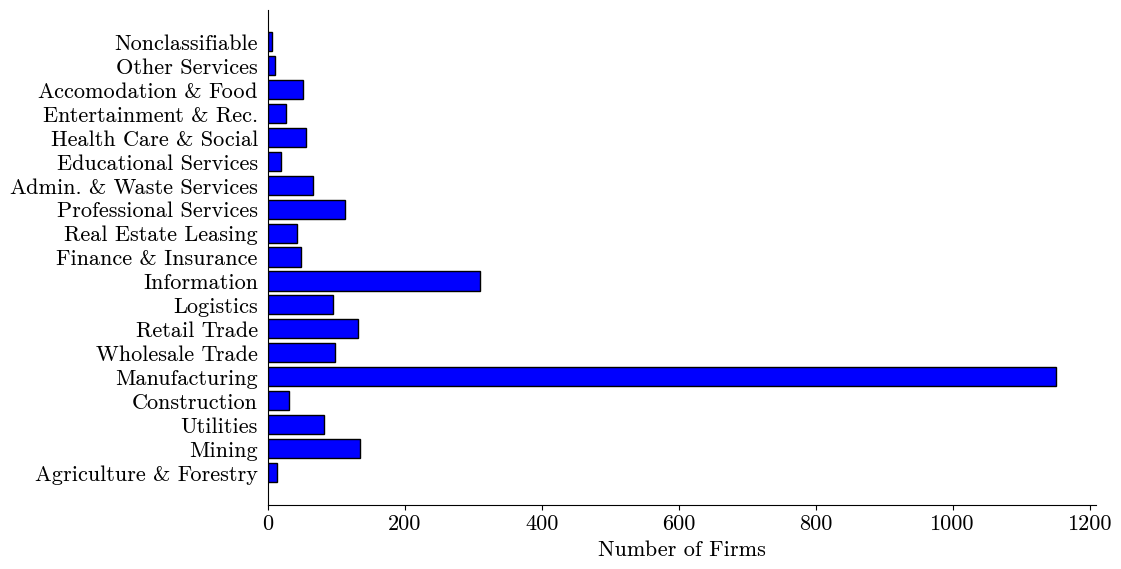

In [18]:
industries = {
    '11': 'Agriculture & Forestry',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Logistics',
    '49': 'Logistics',
    '51': 'Information',
    '52': 'Finance & Insurance',
    '53': 'Real Estate Leasing',
    '54': 'Professional Services',
    #'55': 'Management of Firms',
    '56': 'Admin. & Waste Services',
    '61': 'Educational Services',
    '62': 'Health Care & Social',
    '71': 'Entertainment & Rec.',
    '72': 'Accomodation & Food',
    '81': 'Other Services',
    '99': 'Nonclassifiable'
}

firms_industries = tdfs[['gvkey','naics2', 'beta_ul']].groupby('gvkey').first().groupby('naics2').count().sort_index(ascending=False)
quarters_industries = tdfs[['beta_ul','naics2']].groupby('naics2').count().sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(11.5, 5.5))
plt.subplots_adjust(left=0.23, right=0.95, top=1, bottom=0.1)

firm_count_dict = {}
for k in list(industries.keys()):
    if industries[k] not in list(firm_count_dict.keys()):
        firm_count_dict[industries[k]] = firms_industries.beta_ul.loc[k]
    else:
        firm_count_dict[industries[k]] += firms_industries.beta_ul.loc[k]


ax.barh(list(firm_count_dict.keys()), list(firm_count_dict.values()), color='blue', edgecolor='black')
#ax.set_yticks(list(firm_count_dict.keys()))
#ax.set_yticklabels(list(industries.values()))
ax.set_xlabel('Number of Firms')
#ax[1].barh(quarters_industries.index, quarters_industries.beta_ul, color='blue', edgecolor='black')
#ax[1].set_yticks(list(industries.keys()))
#ax[1].set_yticklabels(list(industries.values()))

plt.savefig(folder + '/slideshow_industries_representation.svg', transparent=True)
plt.show()


# FOR PAPER
# Times New Roman font (or XITS)

#matplotlib.rcParams['font.family'] = 'Times New Roman'
#matplotlib.rcParams['font.size'] = 11

#fig, ax = plt.subplots(figsize=(6.5, 3.5))
#plt.subplots_adjust(left=0.26, right=0.95, top=1, bottom=0.15)

#firm_count_dict = {}
#for k in list(industries.keys()):
#    if industries[k] not in list(firm_count_dict.keys()):
#        firm_count_dict[industries[k]] = firms_industries.beta_ul.loc[k]
#    else:
#        firm_count_dict[industries[k]] += firms_industries.beta_ul.loc[k]


#ax.barh(list(firm_count_dict.keys()), list(firm_count_dict.values()), color='blue', edgecolor='black')
##ax.set_yticks(list(firm_count_dict.keys()))
##ax.set_yticklabels(list(industries.values()))
#ax.set_xlabel('Number of Firms')
##ax[1].barh(quarters_industries.index, quarters_industries.beta_ul, color='blue', edgecolor='black')
##ax[1].set_yticks(list(industries.keys()))
##ax[1].set_yticklabels(list(industries.values()))

#plt.savefig(folder + '/For Paper/industries_representation.svg', transparent=True)
#plt.show()

matplotlib.rcParams['font.family'] = 'NewComputerModern10Book'
matplotlib.rcParams['font.size'] = 16

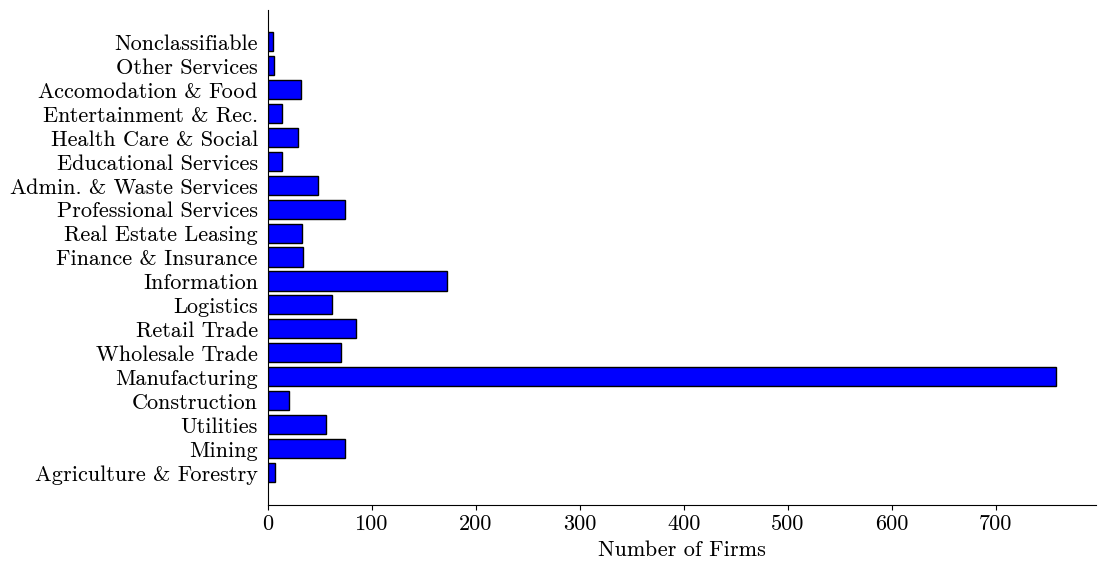

In [16]:
industries = {
    '11': 'Agriculture & Forestry',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Logistics',
    '49': 'Logistics',
    '51': 'Information',
    '52': 'Finance & Insurance',
    '53': 'Real Estate Leasing',
    '54': 'Professional Services',
    #'55': 'Management of Firms',
    '56': 'Admin. & Waste Services',
    '61': 'Educational Services',
    '62': 'Health Care & Social',
    '71': 'Entertainment & Rec.',
    '72': 'Accomodation & Food',
    '81': 'Other Services',
    '99': 'Nonclassifiable'
}

fig, ax = plt.subplots(figsize=(11.5, 5.5))
plt.subplots_adjust(left=0.23, right=0.95, top=1, bottom=0.1)

firms_industries = tdfs[tdfs.gvkey.isin(current_public_gvkeys)][['gvkey','naics2', 'beta_ul']].groupby('gvkey').first().groupby('naics2').count().sort_index(ascending=False)
quarters_industries = tdfs[['beta_ul','naics2']].groupby('naics2').count().sort_index(ascending=False)

firm_count_dict = {}
for k in list(industries.keys()):
    if industries[k] not in list(firm_count_dict.keys()):
        firm_count_dict[industries[k]] = firms_industries.beta_ul.loc[k]
    else:
        firm_count_dict[industries[k]] += firms_industries.beta_ul.loc[k]


ax.barh(list(firm_count_dict.keys()), list(firm_count_dict.values()), color='blue', edgecolor='black')
#ax.set_yticks(list(firm_count_dict.keys()))
#ax.set_yticklabels(list(industries.values()))
ax.set_xlabel('Number of Firms')
#ax[1].barh(quarters_industries.index, quarters_industries.beta_ul, color='blue', edgecolor='black')
#ax[1].set_yticks(list(industries.keys()))
#ax[1].set_yticklabels(list(industries.values()))

plt.savefig(folder + '/current_public_industries_representation.svg', transparent=True)
plt.show()

#### Market Cap

,Market_Cap
count,4.534900e+04
mean,1.484630e+04
std,6.457837e+04
min,2.500875e+01
25%,4.789603e+02
50%,2.214910e+03
75%,9.046415e+03
max,2.933331e+06


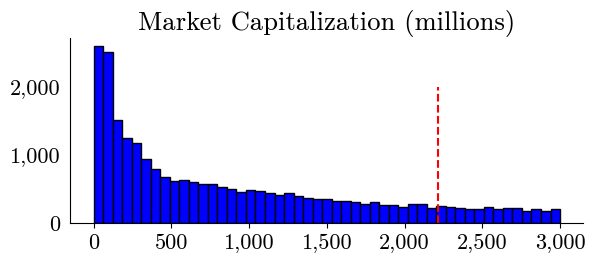

In [17]:
series = tdfs.Market_Cap

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/mkt_cap.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,3000,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=2000, color='red', ls='--')
plt.xticks(np.linspace(0,3000,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Capitalization (millions)')

plt.savefig(folder + '/mkt_cap.svg', transparent=True)
plt.show()

,Market_Cap
count,3.570500e+04
mean,1.785476e+04
std,7.232658e+04
min,2.500875e+01
25%,6.907934e+02
50%,2.897255e+03
75%,1.163018e+04
max,2.933331e+06


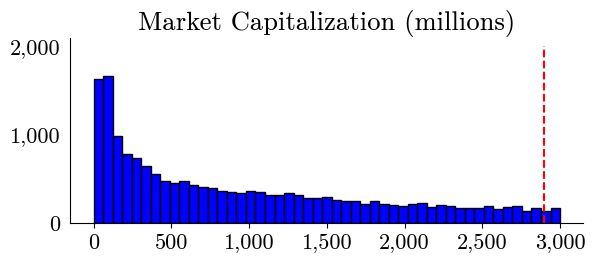

In [18]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].Market_Cap

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_mkt_cap.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,3000,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=2000, color='red', ls='--')
plt.xticks(np.linspace(0,3000,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Capitalization (millions)')

plt.savefig(folder + '/current_public_mkt_cap.svg', transparent=True)
plt.show()

NameError: name 'p_mktcap' is not defined

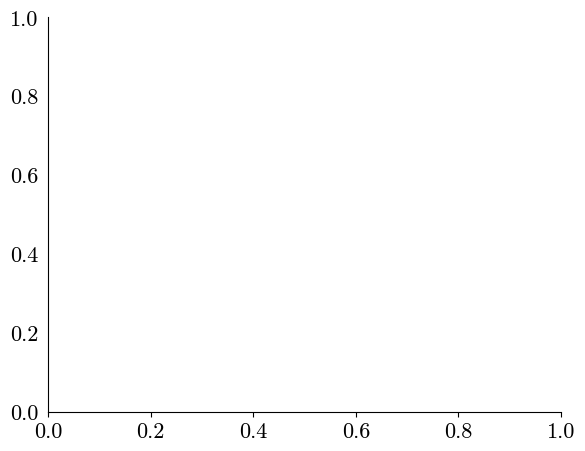

In [19]:
if folder == 'Filtered Histograms':
    fig, ax = plt.subplots(figsize=(6.75,5.33))
    plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
    ax.set_title(str(round(p_mktcap * 100)) + 'th Percentile Market Capitalization (millions)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    #ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax.plot(tdfs[['datadate','Market_Cap_' + str(round(p_mktcap * 100)) + 'p']].groupby('datadate').first(), color='blue')
    #ax.set_xticks([
    #    np.datetime64('1980-01-01'),
    #    np.datetime64('1990-01-01'),
    #    np.datetime64('2000-01-01'),
    #    np.datetime64('2010-01-01'),
    #    np.datetime64('2020-01-01'),
    #])
    plt.savefig('Filtered Histograms/MktCap_percentile.svg')
    plt.show()

In [20]:
print(len(tdfs[tdfs.datadate >= np.datetime64('2012-01-01')]))

tdfs[tdfs.datadate >= np.datetime64('2012-01-01')][['datacqtr', 'gvkey']].groupby('datacqtr').count().tail(60)

45349


,gvkey
datacqtr,
2012Q1,1016
2012Q2,1016
2012Q3,1015
2012Q4,1007
2013Q1,1018
2013Q2,1016
2013Q3,1020
2013Q4,1011
2014Q1,1045


#### Beta (Levered)

,beta
count,45349.000000
mean,1.163091
std,0.574078
min,-0.488619
25%,0.771362
50%,1.115729
75%,1.483540
max,20.050434


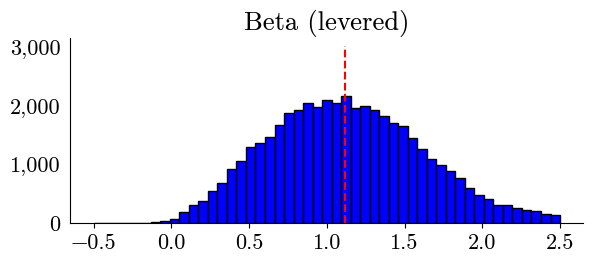

In [21]:
series = tdfs.beta

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/beta.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (levered)')

plt.savefig(folder + '/beta_levered.svg', transparent=True)
plt.show()

,beta
count,35705.000000
mean,1.147505
std,0.563438
min,-0.488619
25%,0.763561
50%,1.106196
75%,1.466483
max,20.050434


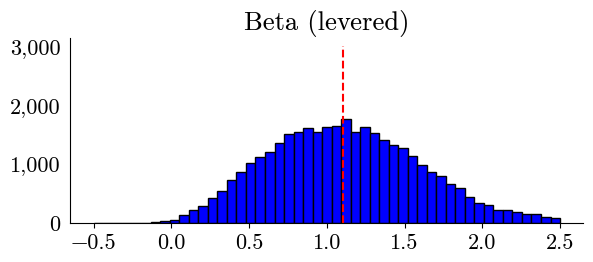

In [22]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].beta

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_beta.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (levered)')

plt.savefig(folder + '/current_public_beta_levered.svg', transparent=True)
plt.show()

#### Beta (Unlevered)

,beta_ul
count,45349.000000
mean,0.957317
std,0.440675
min,-0.081972
25%,0.627645
50%,0.938773
75%,1.261394
max,2.243196


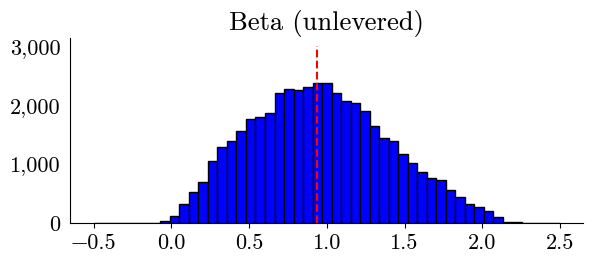

In [23]:
series = tdfs.beta_ul

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/beta_unlevered.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (unlevered)')

plt.savefig(folder + '/beta_unlevered.svg', transparent=True)
plt.show()

,beta_ul
count,35705.000000
mean,0.954227
std,0.435459
min,-0.081972
25%,0.627816
50%,0.934757
75%,1.252275
max,2.243196


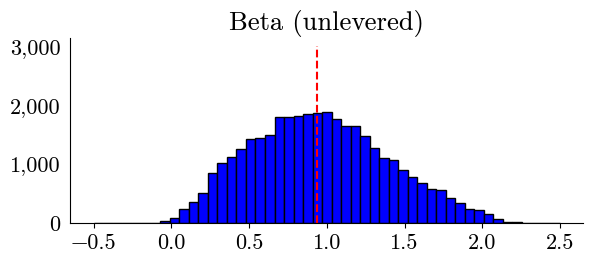

In [24]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].beta_ul

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_beta_unlevered.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (unlevered)')

plt.savefig(folder + '/current_public_beta_unlevered.svg', transparent=True)
plt.show()

#### Tax Rate

,Tax_Rate
count,45349.000000
mean,0.286975
std,0.069652
min,0.210000
25%,0.210000
50%,0.350000
75%,0.350000
max,0.350000


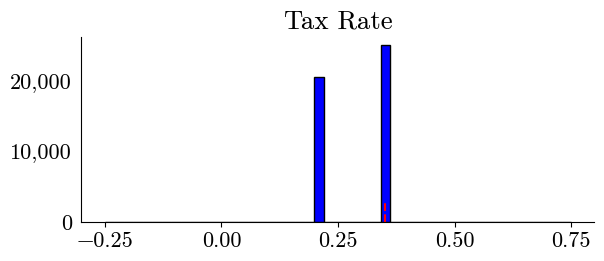

In [25]:
series = tdfs.Tax_Rate

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/tax_rate.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.25,0.75,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.25,.75,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tax Rate')

plt.savefig(folder + '/tax_rate.svg', transparent=True)
plt.show()

,Tax_Rate
count,35705.000000
mean,0.278771
std,0.069990
min,0.210000
25%,0.210000
50%,0.210000
75%,0.350000
max,0.350000


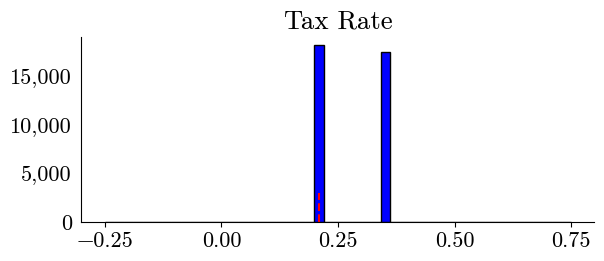

In [26]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].Tax_Rate

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_pubic_tax_rate.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.25,0.75,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.25,.75,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tax Rate')

plt.savefig(folder + '/current_public_tax_rate.svg', transparent=True)
plt.show()

#### Required Return

,RR
count,45349.000000
mean,0.076067
std,0.030810
min,0.007482
25%,0.053190
50%,0.074882
75%,0.097827
max,0.169323


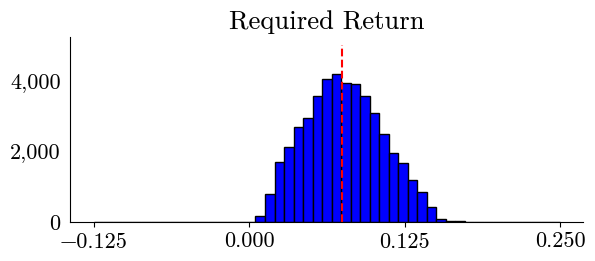

In [27]:
series = tdfs.RR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/required_return_annual.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.125,0.25,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.125,0.25,4))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Required Return')

plt.savefig(folder + '/required_return_annual.svg', transparent=True)
plt.show()

,RR
count,35705.000000
mean,0.076552
std,0.030657
min,0.007482
25%,0.053789
50%,0.075251
75%,0.098218
max,0.169323


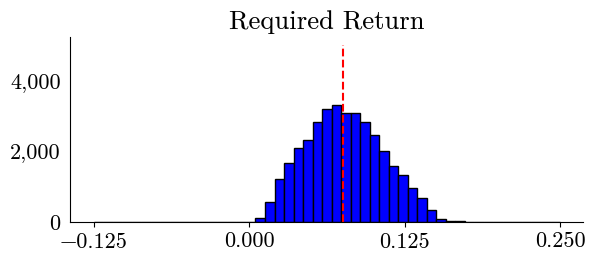

In [28]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].RR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_required_return_annual.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.125,0.25,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.125,0.25,4))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Required Return')

plt.savefig(folder + '/current_public_required_return_annual.svg', transparent=True)
plt.show()

#### Quarterly Required Return

,qRR
count,45349.000000
mean,0.018419
std,0.007282
min,0.001865
25%,0.013040
50%,0.018217
75%,0.023607
max,0.039881


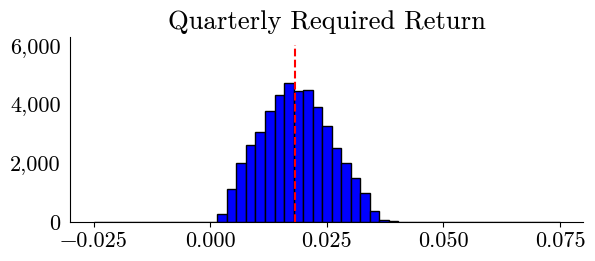

In [29]:
series = tdfs.qRR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/required_return_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.025,0.075,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=6000, color='red', ls='--')
plt.xticks(np.linspace(-0.025,0.075,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Quarterly Required Return')

plt.savefig(folder + '/required_return_quarterly.svg', transparent=True)
plt.show()

,qRR
count,35705.000000
mean,0.018535
std,0.007243
min,0.001865
25%,0.013184
50%,0.018304
75%,0.023699
max,0.039881


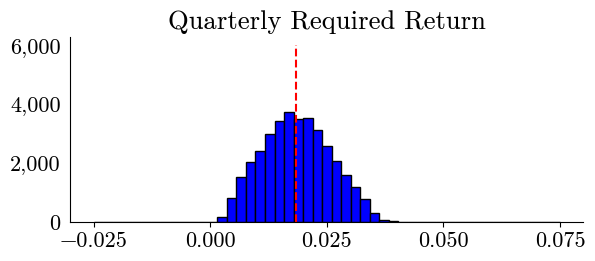

In [30]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].qRR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_required_return_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.025,0.075,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=6000, color='red', ls='--')
plt.xticks(np.linspace(-0.025,0.075,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Quarterly Required Return')

plt.savefig(folder + '/current_public_required_return_quarterly.svg', transparent=True)
plt.show()

#### Lerner

,lerner
count,45349.000000
mean,0.051181
std,0.170821
min,-0.624354
25%,-0.034183
50%,0.037037
75%,0.131045
max,0.946632


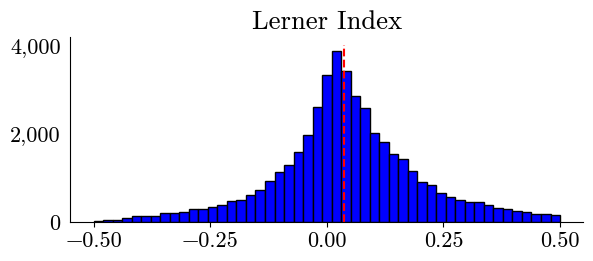

In [31]:
series = tdfs.lerner

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/lerner.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=4000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Lerner Index')

plt.savefig(folder + '/lerner.svg', transparent=True)
plt.show()

,lerner
count,35705.000000
mean,0.048299
std,0.166322
min,-0.624354
25%,-0.032281
50%,0.036841
75%,0.125543
max,0.890072


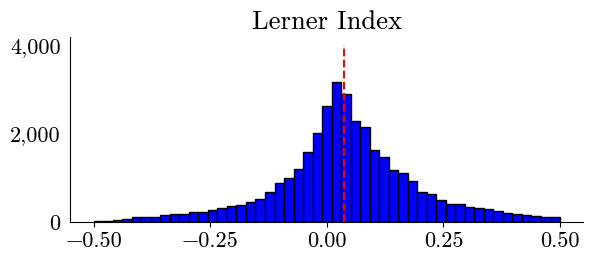

In [32]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].lerner

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_lerner.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=4000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Lerner Index')

plt.savefig(folder + '/current_public_lerner.svg', transparent=True)
plt.show()

#### Price-Cost Margin

,price_cost_margin
count,45349.000000
mean,0.180089
std,0.153721
min,-0.133475
25%,0.070665
50%,0.147556
75%,0.254531
max,0.841943


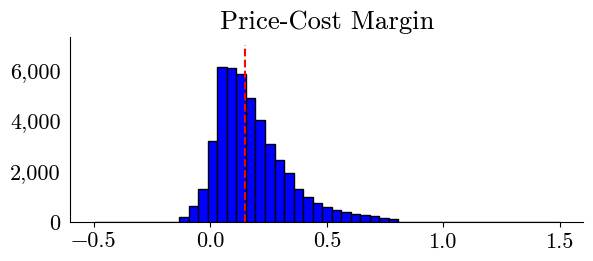

In [33]:
series = tdfs.price_cost_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/price_cost_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,1.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,1.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Price-Cost Margin')

plt.savefig(folder + '/price_cost_margin.svg', transparent=True)
plt.show()

,price_cost_margin
count,35705.000000
mean,0.178591
std,0.150124
min,-0.133475
25%,0.072034
50%,0.147555
75%,0.249974
max,0.841943


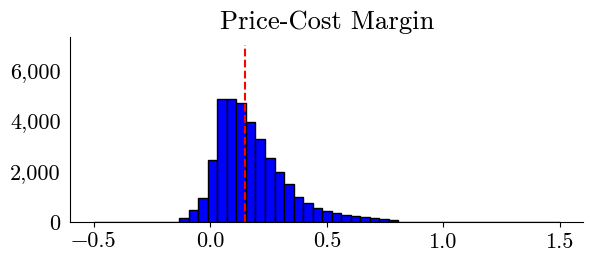

In [34]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].price_cost_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_price_cost_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,1.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,1.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Price-Cost Margin')

plt.savefig(folder + '/current_public_price_cost_margin.svg', transparent=True)
plt.show()

#### EBIT Margin

,EBIT_margin
count,45349.000000
mean,0.087261
std,0.122184
min,-1.498403
25%,0.038145
50%,0.090727
75%,0.154719
max,0.378714


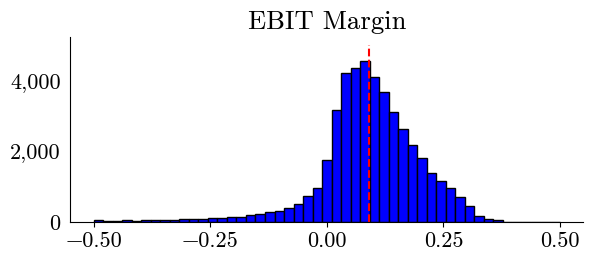

In [35]:
series = tdfs.EBIT_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/ebit_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('EBIT Margin')

plt.savefig(folder + '/ebit_margin.svg', transparent=True)
plt.show()

,EBIT_margin
count,35705.000000
mean,0.093702
std,0.119348
min,-1.498403
25%,0.043954
50%,0.096068
75%,0.159188
max,0.377256


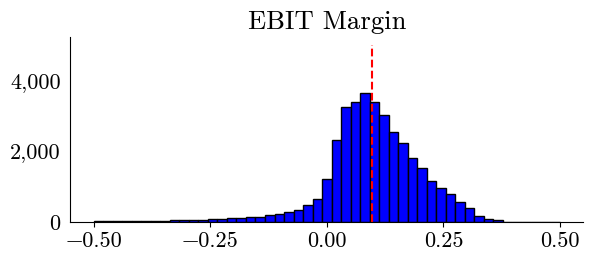

In [36]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].EBIT_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_ebit_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('EBIT Margin')

plt.savefig(folder + '/current_public_ebit_margin.svg', transparent=True)
plt.show()

#### ROIC

,ROIC
count,45349.000000
mean,0.023041
std,0.122475
min,-7.677027
25%,0.009636
50%,0.019928
75%,0.032925
max,11.746053


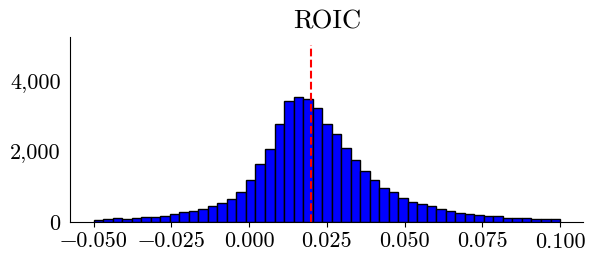

In [37]:
series = tdfs.ROIC

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.05,0.1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.05,0.1,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('ROIC')

plt.savefig(folder + '/roic_quarterly.svg', transparent=True)
plt.show()

,ROIC
count,35705.000000
mean,0.025436
std,0.098883
min,-3.421567
25%,0.011049
50%,0.021045
75%,0.034421
max,6.691300


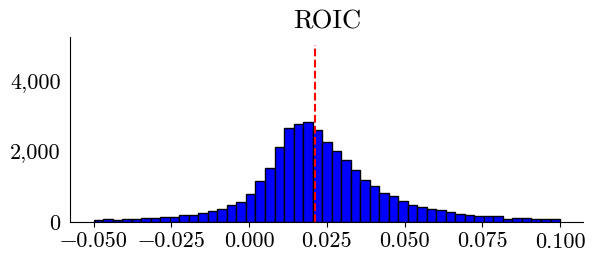

In [38]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].ROIC

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.05,0.1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.05,0.1,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('ROIC')

plt.savefig(folder + '/current_public_roic_quarterly.svg', transparent=True)
plt.show()

#### Marginal ROIC

,mroic
count,45149.000000
mean,0.061718
std,5.178633
min,-142.932091
25%,0.002193
50%,0.018005
75%,0.037038
max,734.103997


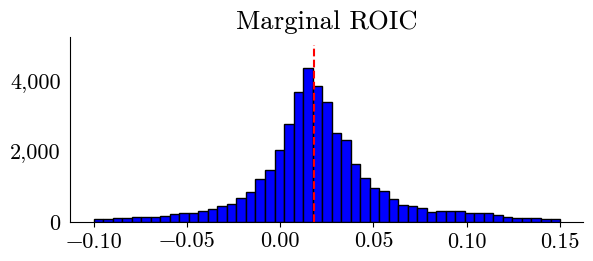

In [39]:
series = tdfs.mroic

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.1,0.15,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.1,0.15,6))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Marginal ROIC')

plt.savefig(folder + '/marginal_roic_quarterly.svg', transparent=True)
plt.show()

,mroic
count,35512.000000
mean,0.072467
std,5.808812
min,-142.932091
25%,0.003933
50%,0.019176
75%,0.037884
max,734.103997


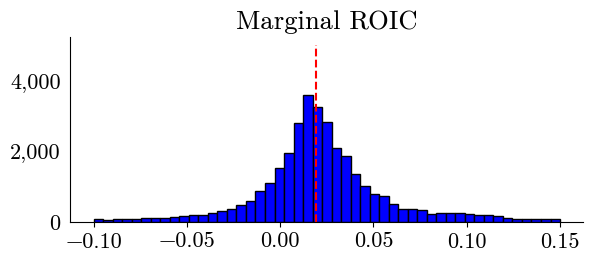

In [40]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].mroic

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.1,0.15,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.1,0.15,6))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Marginal ROIC')

plt.savefig(folder + '/current_public_marginal_roic_quarterly.svg', transparent=True)
plt.show()

#### Profits Autoregression Index (π) 

,ar_coef
count,45321.000000
mean,0.411489
std,18.291969
min,-1726.902461
25%,0.061377
50%,0.538014
75%,0.984043
max,1103.002451


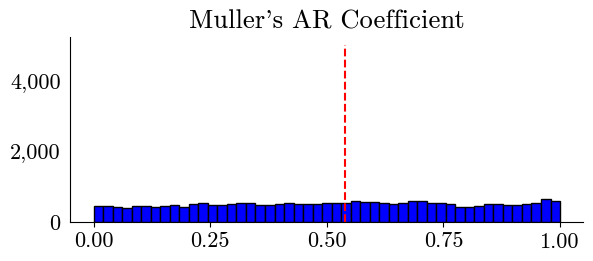

In [41]:
series = tdfs.ar_coef

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title("Muller’s AR Coefficient")

plt.savefig(folder + '/ar_coef_quarterly.svg', transparent=True)
plt.show()

,ar_coef
count,35681.000000
mean,0.394610
std,19.884077
min,-1726.902461
25%,0.067808
50%,0.558768
75%,1.003032
max,1103.002451


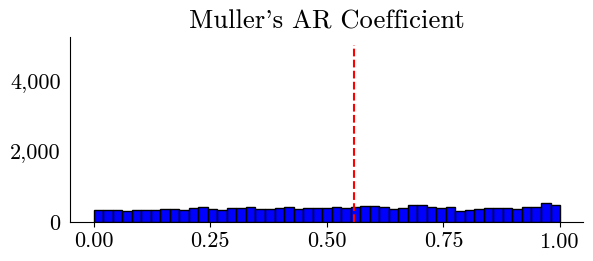

In [42]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].ar_coef

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title("Muller’s AR Coefficient")

plt.savefig(folder + '/current_public_ar_coef_quarterly.svg', transparent=True)
plt.show()

#### Tobin's q

,tobins_q
count,45349.000000
mean,1.667912
std,2.045962
min,-0.029100
25%,0.819274
50%,1.198640
75%,1.904621
max,225.260620


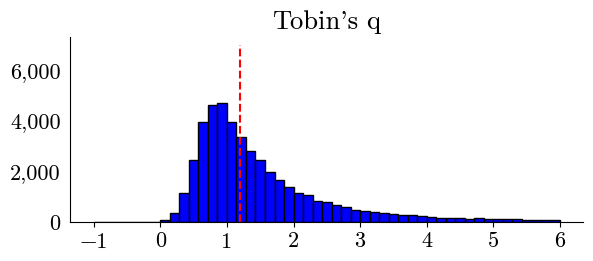

In [43]:
series = tdfs.tobins_q

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/tobins_q.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-1,6,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-1,6,8))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tobin’s q')

plt.savefig(folder + '/tobins_q.svg', transparent=True)
plt.show()

,tobins_q
count,35705.000000
mean,1.735071
std,2.205172
min,-0.029100
25%,0.845897
50%,1.240091
75%,1.975252
max,225.260620


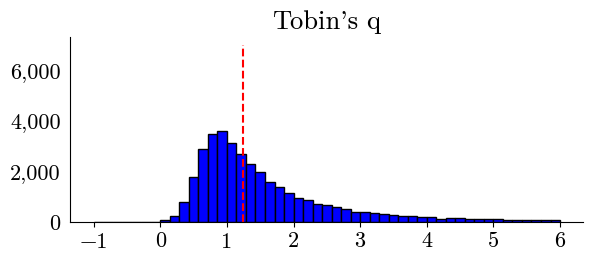

In [44]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].tobins_q

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_tobins_q.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-1,6,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-1,6,8))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tobin’s q')

plt.savefig(folder + '/current_public_tobins_q.svg', transparent=True)
plt.show()

#### Market Share

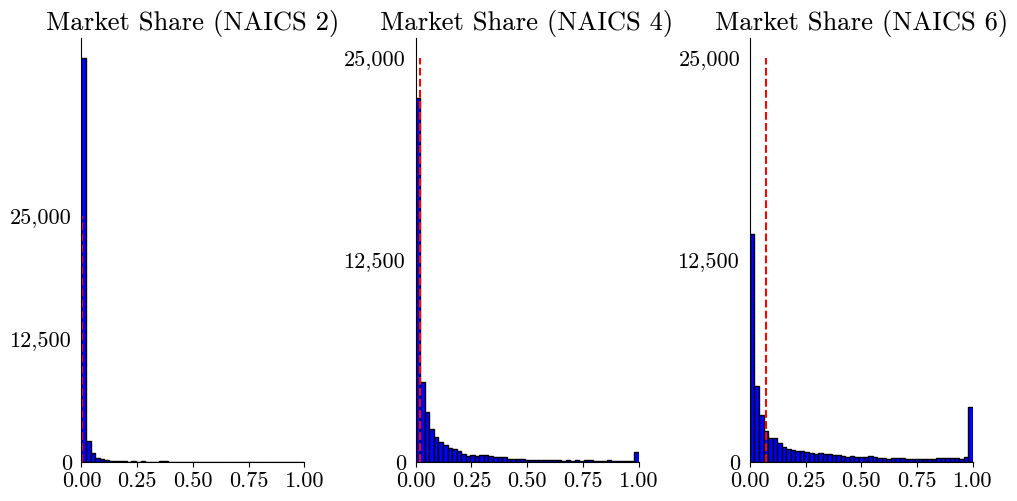

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(2, 7, 2):
    series = tdfs['mktshare' + str(i)]
    #print((i-1)//3, (i-1)%3)
    #display(series.describe())
    ax[i//2 - 1].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[i//2 - 1].vlines(series.median(), ymin=0, ymax=25_000, color='red', ls='--')
    ax[i//2 - 1].set_xticks(np.linspace(0,1,5))
    ax[i//2 - 1].set_yticks(np.linspace(0,25_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[i//2 - 1].set_xlim(0, 1)
    ax[i//2 - 1].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[i//2 - 1].set_title('Market Share (NAICS '+str(i)+')')
    
plt.savefig(folder + '/market_share.svg', transparent=True)
plt.show()

In [46]:
tdfs.mktshare4.describe()

count    45349.000000
mean         0.102206
std          0.191302
min          0.000001
25%          0.004173
50%          0.020786
75%          0.100936
max          1.000000
Name: mktshare4, dtype: float64

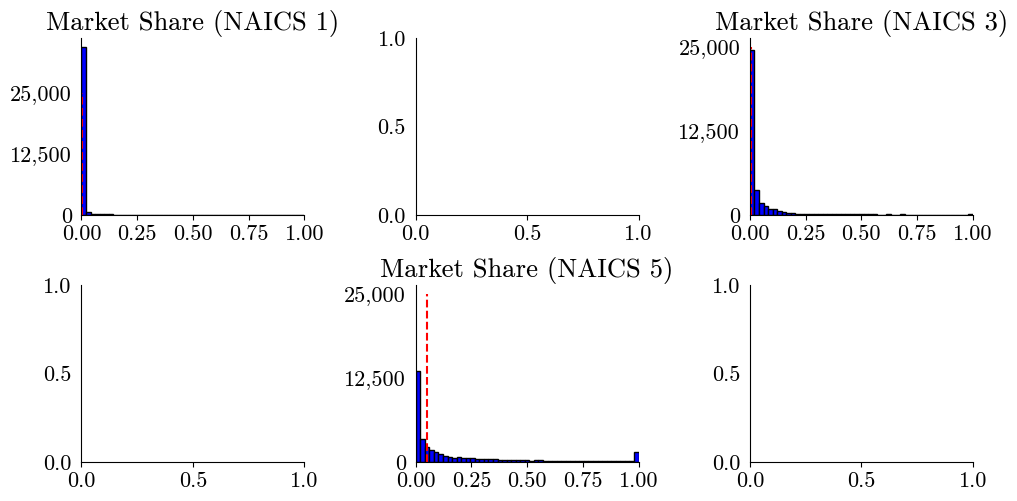

In [47]:
fig, ax = plt.subplots(2, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(1, 7, 2):
    series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)]['mktshare' + str(i)]
    #print((i-1)//3, (i-1)%3)
    #display(series.describe())
    ax[(i-1)//3, (i-1)%3].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[(i-1)//3, (i-1)%3].vlines(series.median(), ymin=0, ymax=25_000, color='red', ls='--')
    ax[(i-1)//3, (i-1)%3].set_xticks(np.linspace(0,1,5))
    ax[(i-1)//3, (i-1)%3].set_yticks(np.linspace(0,25_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[(i-1)//3, (i-1)%3].set_xlim(0, 1)
    ax[(i-1)//3, (i-1)%3].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[(i-1)//3, (i-1)%3].set_title('Market Share (NAICS '+str(i)+')')
    
plt.savefig(folder + '/current_public_market_share.svg', transparent=True)
plt.show()

#### Market Share 4

,mktshare4
count,45349.000000
mean,0.102206
std,0.191302
min,0.000001
25%,0.004173
50%,0.020786
75%,0.100936
max,1.000000


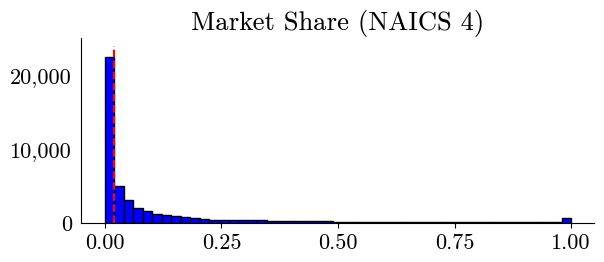

In [21]:
series = tdfs.mktshare4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/mktshare4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=24000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Share (NAICS 4)')

plt.savefig(folder + '/mktshare4.svg', transparent=True)
plt.show()

,mktshare4
count,35705.000000
mean,0.109537
std,0.192355
min,0.000001
25%,0.005443
50%,0.025132
75%,0.119403
max,1.000000


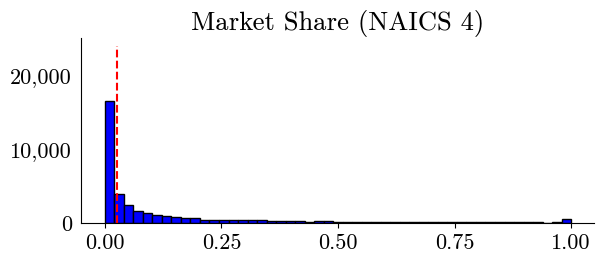

In [49]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].mktshare4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_mktshare4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=24000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Share (NAICS 4)')

plt.savefig(folder + '/current_public_mktshare4.svg', transparent=True)
plt.show()

,mktshare_gsubind
count,45349.000000
mean,0.054539
std,0.106382
min,0.000001
25%,0.003690
50%,0.015745
75%,0.054527
max,1.000000


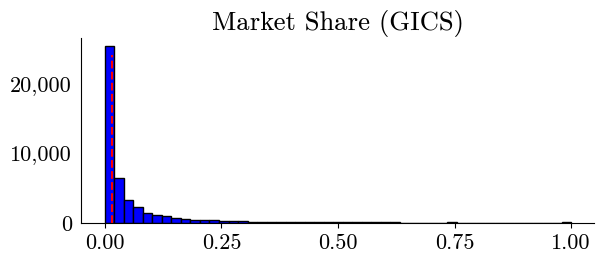

In [22]:
series = tdfs.mktshare_gsubind

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/mktshare_gsubind.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=24000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Share (GICS)')

plt.savefig(folder + '/mktshare_gsubind.svg', transparent=True)
plt.show()

#### Hirshman-Herfindahl Index

In [79]:
for i in range(2, 7, 2):
    print(i, int(i/2)-1)

2 1
4 2
6 3


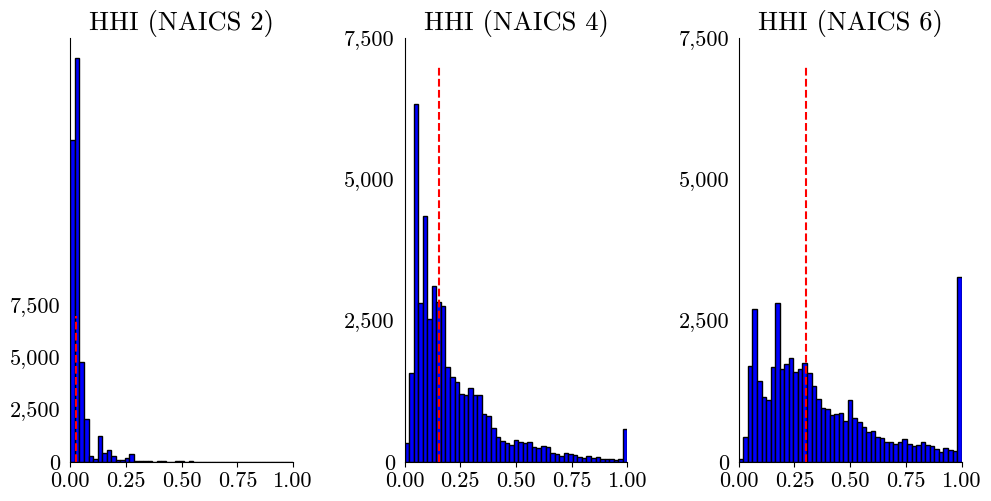

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(2, 7, 2):
    series = tdfs['hhi' + str(i)]
    #print('\nHHI', 1)
    #display(series.describe())
    ax[int(i/2)-1].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[int(i/2)-1].vlines(series.median(), ymin=0, ymax=7_000, color='red', ls='--')
    ax[int(i/2)-1].set_xticks(np.linspace(0,1,5))
    ax[int(i/2)-1].set_yticks(np.linspace(0,7_500,4))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[int(i/2)-1].set_xlim(0, 1)
    ax[int(i/2)-1].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[int(i/2)-1].set_title('HHI (NAICS '+str(i)+')')
    
plt.savefig(folder + '/hhi.svg', transparent=True)
plt.show()

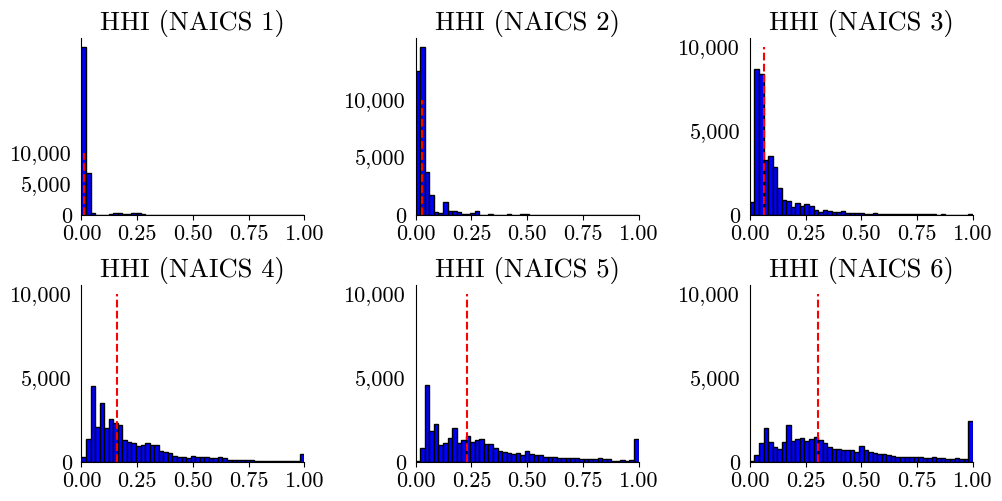

In [81]:
fig, ax = plt.subplots(2, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(1, 7, 1):
    series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)]['hhi' + str(i)]
    #print('\nHHI', 1)
    #display(series.describe())
    ax[(i-1)//3, (i-1)%3].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[(i-1)//3, (i-1)%3].vlines(series.median(), ymin=0, ymax=10_000, color='red', ls='--')
    ax[(i-1)//3, (i-1)%3].set_xticks(np.linspace(0,1,5))
    ax[(i-1)//3, (i-1)%3].set_yticks(np.linspace(0,10_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[(i-1)//3, (i-1)%3].set_xlim(0, 1)
    ax[(i-1)//3, (i-1)%3].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[(i-1)//3, (i-1)%3].set_title('HHI (NAICS '+str(i)+')')
    
plt.savefig(folder + '/current_public_hhi.svg', transparent=True)
plt.show()

#### HHI4

,hhi4
count,45349.000000
mean,0.217665
std,0.194744
min,0.011704
25%,0.082501
50%,0.155426
75%,0.294070
max,1.000000


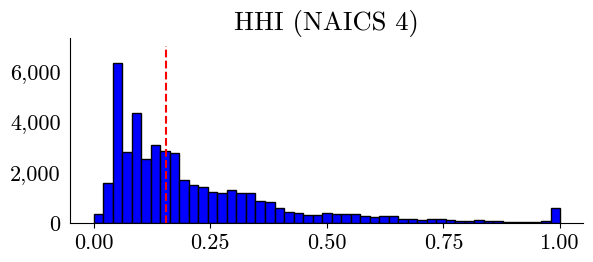

In [23]:
series = tdfs.hhi4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/hhi4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('HHI (NAICS 4)')

plt.savefig(folder + '/hhi4.svg', transparent=True)
plt.show()

,hhi4
count,35705.000000
mean,0.219771
std,0.193016
min,0.011704
25%,0.084403
50%,0.158620
75%,0.296934
max,1.000000


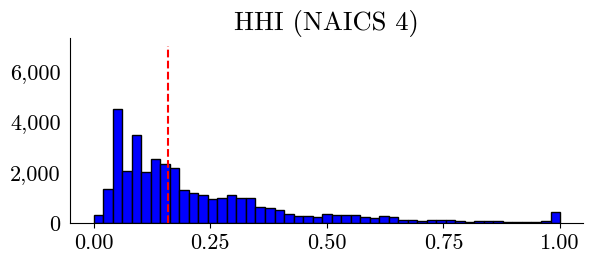

In [83]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].hhi4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_hhi4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('HHI (NAICS 4)')

plt.savefig(folder + '/current_public_hhi4.svg', transparent=True)
plt.show()

,hhi_gsubind
count,45349.000000
mean,0.150216
std,0.113249
min,0.027932
25%,0.078744
50%,0.115393
75%,0.182016
max,1.000000


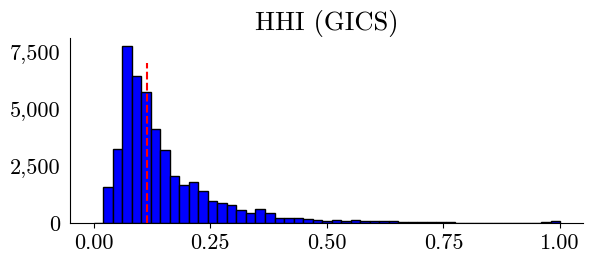

In [24]:
series = tdfs.hhi_gsubind

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/hhi_gsubind.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('HHI (GICS)')

plt.savefig(folder + '/hhi_gsubind.svg', transparent=True)
plt.show()

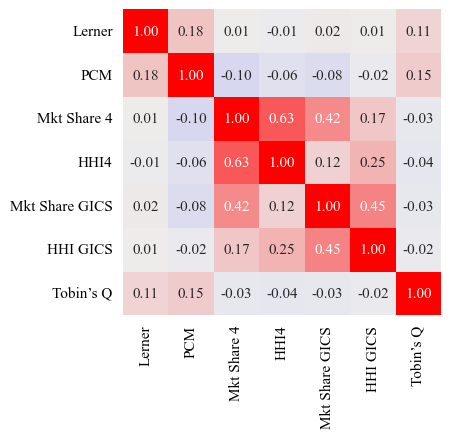

,Sum of Correlations
lerner,1.322979
price_cost_margin,1.071461
mktshare4,2.093457
hhi4,1.895346
mktshare_gsubind,1.902887
hhi_gsubind,1.835878
tobins_q,1.149213


In [87]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#0000FF', '#EEEEEE', '#FF0000']
th = [0, 0.5, 1]


matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['xtick.bottom'] = False


cdict = NonLinCdict(th, hc)
cm = matplotlib.colors.LinearSegmentedColormap('test', cdict)

data_correlation = tdfs[['lerner', 'price_cost_margin', 'mktshare4', 'hhi4', 'mktshare_gsubind', 'hhi_gsubind', 'tobins_q']].corr() 

fig, ax = plt.subplots(figsize=(6.5, 4.5))
plt.subplots_adjust(left=0.305, right=0.795, top=0.98, bottom=0.30)

ax = sns.heatmap(data_correlation, vmin=-1, vmax=1, cmap=cm, annot=True, fmt='.2f', cbar=False)
ax.set_xticklabels(['Lerner','PCM','Mkt Share 4', 'HHI4', 'Mkt Share GICS', 'HHI GICS', 'Tobin’s Q'])
ax.set_yticklabels(['Lerner','PCM','Mkt Share 4', 'HHI4', 'Mkt Share GICS', 'HHI GICS', 'Tobin’s Q'])
plt.savefig(folder + '/For Paper/correlation_among_measures.svg', transparent=True)
plt.show()
display(pd.DataFrame(data_correlation.sum(), columns=['Sum of Correlations']))


matplotlib.rcParams['font.family'] = 'NewComputerModern10Book'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['xtick.bottom'] = True

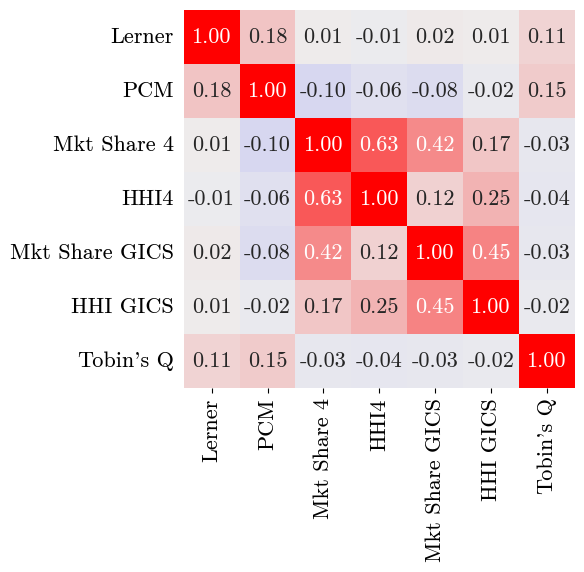

,Sum of Correlations
lerner,1.322979
price_cost_margin,1.071461
mktshare4,2.093457
hhi4,1.895346
mktshare_gsubind,1.902887
hhi_gsubind,1.835878
tobins_q,1.149213


In [21]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#0000FF', '#EEEEEE', '#FF0000']
th = [0, 0.5, 1]


cdict = NonLinCdict(th, hc)
cm = matplotlib.colors.LinearSegmentedColormap('test', cdict)

data_correlation = tdfs[['lerner', 'price_cost_margin', 'mktshare4', 'hhi4', 'mktshare_gsubind', 'hhi_gsubind', 'tobins_q']].corr() 

fig, ax = plt.subplots(figsize=(11.5, 5.65))
plt.subplots_adjust(left=0.33, right=0.67, top=0.98, bottom=0.31)

ax = sns.heatmap(data_correlation, vmin=-1, vmax=1, cmap=cm, annot=True, fmt='.2f', cbar=False)
ax.set_xticklabels(['Lerner','PCM','Mkt Share 4', 'HHI4', 'Mkt Share GICS', 'HHI GICS', 'Tobin’s Q'])
ax.set_yticklabels(['Lerner','PCM','Mkt Share 4', 'HHI4', 'Mkt Share GICS', 'HHI GICS', 'Tobin’s Q'])
plt.savefig(folder + '/correlation_among_measures.svg', transparent=True)
plt.show()
display(pd.DataFrame(data_correlation.sum(), columns=['Sum of Correlations']))


## Regressions

In [90]:
regfolder = 'Filtered Analysis' if folder == 'Filtered Histograms' else 'Unfiltered Analysis'
print(regfolder)

Filtered Analysis


In [91]:
simple_mod = smf.rlm('beta_ul ~ lerner', data=tdfs[(tdfs['lerner_na'] == 0) & (tdfs.datadate >= np.datetime64('2012-01-01'))]).fit()

with open(regfolder + "/simple_mod.txt", "w") as text_file:
    text_file.write(str(simple_mod.summary()))

display(simple_mod.summary())
del(simple_mod)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45347
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:07                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9577      0.002    416.153      0.000       0.953       0.962
lerner        -0.2175      0.013    -16.858      0.000      -0.243      -0.192
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [92]:
simple_mod1 = smf.rlm('beta_ul ~ lerner + Market_Cap', data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod1.txt", "w") as text_file:
    text_file.write(str(simple_mod1.summary()))

display(simple_mod1.summary())
del(simple_mod1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45346
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:07                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9609      0.002    409.306      0.000       0.956       0.966
lerner        -0.2130      0.013    -16.497      0.000      -0.238      -0.188
Market_Cap -2.163e-07   3.41e-08     -6.336      0.000   -2.83e-07   -1.49e-07
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [93]:
#hreg_abdoh_varela_mod = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + np.log(atq) + I((atq - dlttq) / Market_Cap)',
#                                data=tdfs)

hreg_abdoh_varela_mod = smf.rlm('beta_ul ~ hhi4 + Market_Cap', data=tdfs).fit()

with open(regfolder + "/hreg_abdoh_varela_mod.txt", "w") as text_file:
    text_file.write(str(hreg_abdoh_varela_mod.summary()))

display(hreg_abdoh_varela_mod.summary())
del(hreg_abdoh_varela_mod)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45346
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:08                                         
No. Iterations:                    26                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9669      0.003    288.049      0.000       0.960       0.973
hhi4          -0.0744      0.011     -6.555      0.000      -0.097      -0.052
Market_Cap -2.562e-07   3.42e-08     -7.483      0.000   -3.23e-07   -1.89e-07
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [94]:
simple_mod2 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq)', data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod2.txt", "w") as text_file:
    text_file.write(str(simple_mod2.summary()))

display(simple_mod2.summary())
del(simple_mod2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45345
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:08                                         
No. Iterations:                    35                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8980      0.006    143.403      0.000       0.886       0.910
lerner           -0.2190      0.013    -16.996      0.000      -0.244      -0.194
Market_Cap    -3.255e-07   3.49e-08     -9.315      0.000   -3.94e-07   -2.57e-07
np.log(prccq)     0.0190      0.002     10.677      0.000       0.016       0.023
=================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [95]:
simple_mod3 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + C(cyear)', 
                      data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod3_lerner.txt", "w") as text_file:
    text_file.write(str(simple_mod3.summary()))

display(simple_mod3.summary())
del(simple_mod3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45335
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:09                                         
No. Iterations:                    21                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0079      0.009    110.922      0.000       0.990       1.026
C(cyear)[T.2013]     0.0112      0.010      1.090      0.276      -0.009       0.031
C(cyear)[T.2014]    -0.0013      0.010     -0.126      0.900      -0.021       0.019
C(cyear)[T.2015]    -0.0648      0.010     -6.355      0.000      -0.085      -0.045
C(cyear)[T.2016]    -0.1315      0.010    -12.857      0.000      -0.151      -0.111
C(cyear)[T.2017]    -0.1902      0.010    -18.577      0.000      -0.210      -0.170
C(cyear)[T.2018]    -0.2654      0.010    -25.882      0.000      -0.286      -0.245
C(cyear)[T.2019]    -0.2495      0.010    -24.199      0.000      -0.270      -0.229
C(cyear)[T.2020]    -0.1770      0.010    -17.052      0.000      -0.197      -0.157
C(cyear)[T.2021]    -0.0716      0.010     -6.906      0.000      -0.092      -0.051
C(cyear)[T.2022]    -0.1801      0.010    -17.435      0.000      -0.200      -0.160
lerner              -0.2668      0.013    -20.899      0.000      -0.292      -0.242
Market_Cap       -2.803e-07   3.45e-08     -8.122      0.000   -3.48e-07   -2.13e-07
np.log(prccq)        0.0233      0.002     13.192      0.000       0.020       0.027
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [96]:
simple_mod3 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + C(cyear)', 
                      data=tdfs[tdfs['price_cost_margin_na'] == 0]).fit()

with open(regfolder + "/simple_mod3_pcm.txt", "w") as text_file:
    text_file.write(str(simple_mod3.summary()))

display(simple_mod3.summary())
del(simple_mod3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45335
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:10                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9777      0.010    102.802      0.000       0.959       0.996
C(cyear)[T.2013]      0.0184      0.010      1.774      0.076      -0.002       0.039
C(cyear)[T.2014]      0.0051      0.010      0.498      0.619      -0.015       0.025
C(cyear)[T.2015]     -0.0561      0.010     -5.461      0.000      -0.076      -0.036
C(cyear)[T.2016]     -0.1196      0.010    -11.621      0.000      -0.140      -0.099
C(cyear)[T.2017]     -0.1761      0.010    -17.095      0.000      -0.196      -0.156
C(cyear)[T.2018]     -0.2513      0.010    -24.348      0.000      -0.272      -0.231
C(cyear)[T.2019]     -0.2355      0.010    -22.692      0.000      -0.256      -0.215
C(cyear)[T.2020]     -0.1606      0.010    -15.389      0.000      -0.181      -0.140
C(cyear)[T.2021]     -0.0582      0.010     -5.573      0.000      -0.079      -0.038
C(cyear)[T.2022]     -0.1669      0.010    -16.055      0.000      -0.187      -0.147
price_cost_margin     0.0722      0.014      5.073      0.000       0.044       0.100
Market_Cap        -3.268e-07   3.48e-08     -9.391      0.000   -3.95e-07   -2.59e-07
np.log(prccq)         0.0214      0.002     12.043      0.000       0.018       0.025
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [97]:
simple_mod4 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod4_lerner.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:15                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6424      0.030     21.390      0.000       0.584       0.701
naics2[T.21]         0.4039      0.031     12.913      0.000       0.343       0.465
naics2[T.22]        -0.2310      0.031     -7.509      0.000      -0.291      -0.171
naics2[T.23]         0.4534      0.034     13.392      0.000       0.387       0.520
naics2[T.31]         0.1092      0.030      3.632      0.000       0.050       0.168
naics2[T.32]         0.3417      0.029     11.593      0.000       0.284       0.399
naics2[T.33]         0.4714      0.029     16.199      0.000       0.414       0.528
naics2[T.42]         0.2665      0.030      8.836      0.000       0.207       0.326
naics2[T.44]         0.2833      0.031      9.100      0.000       0.222       0.344
naics2[T.45]         0.2485      0.031      8.105      0.000       0.188       0.309
naics2[T.48]         0.2291      0.031      7.512      0.000       0.169       0.289
naics2[T.49]         0.4145      0.058      7.088      0.000       0.300       0.529
naics2[T.51]         0.2593      0.030      8.777      0.000       0.201       0.317
naics2[T.52]         0.2782      0.032      8.645      0.000       0.215       0.341
naics2[T.53]         0.2489      0.033      7.577      0.000       0.185       0.313
naics2[T.54]         0.3303      0.030     10.893      0.000       0.271       0.390
naics2[T.56]         0.2708      0.031      8.696      0.000       0.210       0.332
naics2[T.61]         0.3601      0.038      9.482      0.000       0.286       0.435
naics2[T.62]         0.1129      0.031      3.592      0.000       0.051       0.174
naics2[T.71]         0.2038      0.037      5.582      0.000       0.132       0.275
naics2[T.72]         0.2156      0.032      6.816      0.000       0.154       0.278
naics2[T.81]         0.1269      0.041      3.097      0.002       0.047       0.207
naics2[T.99]         0.1422      0.057      2.511      0.012       0.031       0.253
C(cyear)[T.2013]     0.0057      0.009      0.607      0.544      -0.013       0.024
C(cyear)[T.2014]    -0.0047      0.009     -0.505      0.614      -0.023       0.013
C(cyear)[T.2015]    -0.0661      0.009     -7.137      0.000      -0.084      -0.048
C(cyear)[T.2016]    -0.1348      0.009    -14.508      0.000      -0.153      -0.117
C(cyear)[T.2017]    -0.1942      0.009    -20.859      0.000      -0.212      -0.176
C(cyear)[T.2018]    -0.2635      0.009    -28.261      0.000      -0.282      -0.245
C(cyear)[T.2019]    -0.2453      0.009    -26.169      0.000      -0.264      -0.227
C(cyear)[T.2020]    -0.1773      0.009    -18.797      0.000      -0.196      -0.159
C(cyear)[T.2021]    -0.0785      0.009     -8.331      0.000      -0.097      -0.060
C(cyear)[T.2022]    -0.1756      0.009    -18.705      0.000      -0.194      -0.157
lerner              -0.

In [98]:
simple_mod4 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['price_cost_margin_na'] == 0]).fit()

with open(regfolder + "/simple_mod4_pcm.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:20                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6051      0.030     19.843      0.000       0.545       0.665
naics2[T.21]          0.4226      0.031     13.423      0.000       0.361       0.484
naics2[T.22]         -0.2224      0.031     -7.172      0.000      -0.283      -0.162
naics2[T.23]          0.4857      0.034     14.201      0.000       0.419       0.553
naics2[T.31]          0.1272      0.030      4.191      0.000       0.068       0.187
naics2[T.32]          0.3605      0.030     12.133      0.000       0.302       0.419
naics2[T.33]          0.4916      0.029     16.751      0.000       0.434       0.549
naics2[T.42]          0.2969      0.031      9.728      0.000       0.237       0.357
naics2[T.44]          0.3038      0.031      9.657      0.000       0.242       0.365
naics2[T.45]          0.2586      0.031      8.360      0.000       0.198       0.319
naics2[T.48]          0.2499      0.031      8.124      0.000       0.190       0.310
naics2[T.49]          0.4435      0.059      7.526      0.000       0.328       0.559
naics2[T.51]          0.2723      0.030      9.146      0.000       0.214       0.331
naics2[T.52]          0.2987      0.032      9.209      0.000       0.235       0.362
naics2[T.53]          0.2641      0.033      7.982      0.000       0.199       0.329
naics2[T.54]          0.3475      0.031     11.362      0.000       0.288       0.407
naics2[T.56]          0.2861      0.031      9.105      0.000       0.225       0.348
naics2[T.61]          0.3751      0.038      9.810      0.000       0.300       0.450
naics2[T.62]          0.1428      0.032      4.503      0.000       0.081       0.205
naics2[T.71]          0.1969      0.037      5.358      0.000       0.125       0.269
naics2[T.72]          0.2273      0.032      7.129      0.000       0.165       0.290
naics2[T.81]          0.1389      0.041      3.360      0.001       0.058       0.220
naics2[T.99]          0.1632      0.057      2.862      0.004       0.051       0.275
C(cyear)[T.2013]      0.0113      0.009      1.201      0.230      -0.007       0.030
C(cyear)[T.2014]     -0.0003      0.009     -0.034      0.973      -0.019       0.018
C(cyear)[T.2015]     -0.0598      0.009     -6.415      0.000      -0.078      -0.042
C(cyear)[T.2016]     -0.1253      0.009    -13.415      0.000      -0.144      -0.107
C(cyear)[T.2017]     -0.1828      0.009    -19.545      0.000      -0.201      -0.164
C(cyear)[T.2018]     -0.2528      0.009    -26.982      0.000      -0.271      -0.234
C(cyear)[T.2019]     -0.2346      0.009    -24.911      0.000      -0.253      -0.216
C(cyear)[T.2020]     -0.1643      0.009    -17.342      0.000      -0.183      -0.146
C(cyear)[T.2021]     -0.0681      0.009     -7.192      0.000      -0.087      -0.050
C(cyear)[T.2022]     -0.1652      0.009    -17.506      0.000      -0.184

In [99]:
simple_mod4 = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_hhi.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:24                                         
No. Iterations:                    36                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5527      0.032     17.392      0.000       0.490       0.615
naics2[T.21]         0.4780      0.033     14.682      0.000       0.414       0.542
naics2[T.22]        -0.1671      0.032     -5.191      0.000      -0.230      -0.104
naics2[T.23]         0.5049      0.034     14.700      0.000       0.438       0.572
naics2[T.31]         0.1585      0.031      5.146      0.000       0.098       0.219
naics2[T.32]         0.4043      0.031     13.211      0.000       0.344       0.464
naics2[T.33]         0.5363      0.030     17.709      0.000       0.477       0.596
naics2[T.42]         0.3265      0.031     10.544      0.000       0.266       0.387
naics2[T.44]         0.3341      0.032     10.480      0.000       0.272       0.397
naics2[T.45]         0.2858      0.031      9.144      0.000       0.225       0.347
naics2[T.48]         0.2928      0.032      9.281      0.000       0.231       0.355
naics2[T.49]         0.4626      0.059      7.844      0.000       0.347       0.578
naics2[T.51]         0.3167      0.031     10.341      0.000       0.257       0.377
naics2[T.52]         0.3447      0.033     10.332      0.000       0.279       0.410
naics2[T.53]         0.3129      0.034      9.217      0.000       0.246       0.379
naics2[T.54]         0.3891      0.031     12.411      0.000       0.328       0.451
naics2[T.56]         0.3213      0.032     10.044      0.000       0.259       0.384
naics2[T.61]         0.4079      0.039     10.574      0.000       0.332       0.484
naics2[T.62]         0.1650      0.032      5.163      0.000       0.102       0.228
naics2[T.71]         0.2377      0.037      6.378      0.000       0.165       0.311
naics2[T.72]         0.2769      0.033      8.428      0.000       0.213       0.341
naics2[T.81]         0.1421      0.041      3.446      0.001       0.061       0.223
naics2[T.99]         0.2043      0.057      3.560      0.000       0.092       0.317
C(cyear)[T.2013]     0.0111      0.009      1.182      0.237      -0.007       0.030
C(cyear)[T.2014]    -0.0009      0.009     -0.101      0.920      -0.019       0.017
C(cyear)[T.2015]    -0.0604      0.009     -6.486      0.000      -0.079      -0.042
C(cyear)[T.2016]    -0.1260      0.009    -13.504      0.000      -0.144      -0.108
C(cyear)[T.2017]    -0.1839      0.009    -19.672      0.000      -0.202      -0.166
C(cyear)[T.2018]    -0.2538      0.009    -27.102      0.000      -0.272      -0.235
C(cyear)[T.2019]    -0.2355      0.009    -25.026      0.000      -0.254      -0.217
C(cyear)[T.2020]    -0.1645      0.009    -17.380      0.000      -0.183      -0.146
C(cyear)[T.2021]    -0.0676      0.009     -7.143      0.000      -0.086      -0.049
C(cyear)[T.2022]    -0.1653      0.009    -17.538      0.000      -0.184      -0.147
hhi4                 0.

In [100]:
simple_mod4 = smf.rlm('beta_ul ~ I(mroic - qRR) + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mroic.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45149
Model:                            RLM   Df Residuals:                    45112
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:28                                         
No. Iterations:                    38                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6195      0.030     20.468      0.000       0.560       0.679
naics2[T.21]         0.4210      0.032     13.350      0.000       0.359       0.483
naics2[T.22]        -0.2278      0.031     -7.343      0.000      -0.289      -0.167
naics2[T.23]         0.4718      0.034     13.819      0.000       0.405       0.539
naics2[T.31]         0.1303      0.030      4.293      0.000       0.071       0.190
naics2[T.32]         0.3531      0.030     11.883      0.000       0.295       0.411
naics2[T.33]         0.4839      0.029     16.493      0.000       0.426       0.541
naics2[T.42]         0.2835      0.030      9.323      0.000       0.224       0.343
naics2[T.44]         0.2926      0.031      9.320      0.000       0.231       0.354
naics2[T.45]         0.2491      0.031      8.045      0.000       0.188       0.310
naics2[T.48]         0.2423      0.031      7.879      0.000       0.182       0.303
naics2[T.49]         0.4315      0.059      7.318      0.000       0.316       0.547
naics2[T.51]         0.2665      0.030      8.944      0.000       0.208       0.325
naics2[T.52]         0.2903      0.032      8.947      0.000       0.227       0.354
naics2[T.53]         0.2595      0.033      7.834      0.000       0.195       0.324
naics2[T.54]         0.3407      0.031     11.141      0.000       0.281       0.401
naics2[T.56]         0.2777      0.031      8.847      0.000       0.216       0.339
naics2[T.61]         0.3718      0.038      9.709      0.000       0.297       0.447
naics2[T.62]         0.1360      0.032      4.279      0.000       0.074       0.198
naics2[T.71]         0.1946      0.037      5.289      0.000       0.123       0.267
naics2[T.72]         0.2212      0.032      6.934      0.000       0.159       0.284
naics2[T.81]         0.1281      0.041      3.100      0.002       0.047       0.209
naics2[T.99]         0.1568      0.057      2.746      0.006       0.045       0.269
C(cyear)[T.2013]     0.0115      0.009      1.218      0.223      -0.007       0.030
C(cyear)[T.2014]    -0.0009      0.009     -0.098      0.922      -0.019       0.017
C(cyear)[T.2015]    -0.0600      0.009     -6.417      0.000      -0.078      -0.042
C(cyear)[T.2016]    -0.1250      0.009    -13.333      0.000      -0.143      -0.107
C(cyear)[T.2017]    -0.1830      0.009    -19.489      0.000      -0.201      -0.165
C(cyear)[T.2018]    -0.2536      0.009    -26.963      0.000      -0.272      -0.235
C(cyear)[T.2019]    -0.2345      0.009    -24.800      0.000      -0.253      -0.216
C(cyear)[T.2020]    -0.1637      0.010    -17.213      0.000      -0.182      -0.145
C(cyear)[T.2021]    -0.0668      0.010     -7.035      0.000      -0.085      -0.048
C(cyear)[T.2022]    -0.1639      0.009    -17.309      0.000      -0.182      -0.145
I(mroic - qRR)      -0.

In [101]:
simple_mod4 = smf.rlm('beta_ul ~ ar_coef + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[(tdfs.ar_coef < 1) & (tdfs.ar_coef > 0)]).fit()

with open(regfolder + "/simple_mod4_ar.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                24422
Model:                            RLM   Df Residuals:                    24385
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:29                                         
No. Iterations:                    21                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6485      0.034     18.917      0.000       0.581       0.716
naics2[T.21]         0.4018      0.036     11.249      0.000       0.332       0.472
naics2[T.22]        -0.1697      0.037     -4.552      0.000      -0.243      -0.097
naics2[T.23]         0.5154      0.038     13.405      0.000       0.440       0.591
naics2[T.31]         0.1507      0.035      4.337      0.000       0.083       0.219
naics2[T.32]         0.3563      0.033     10.717      0.000       0.291       0.422
naics2[T.33]         0.4925      0.033     15.120      0.000       0.429       0.556
naics2[T.42]         0.2889      0.034      8.430      0.000       0.222       0.356
naics2[T.44]         0.2535      0.036      6.957      0.000       0.182       0.325
naics2[T.45]         0.2872      0.037      7.850      0.000       0.215       0.359
naics2[T.48]         0.2447      0.035      7.031      0.000       0.176       0.313
naics2[T.49]         0.4135      0.079      5.246      0.000       0.259       0.568
naics2[T.51]         0.2471      0.033      7.417      0.000       0.182       0.312
naics2[T.52]         0.3502      0.037      9.358      0.000       0.277       0.424
naics2[T.53]         0.2568      0.040      6.373      0.000       0.178       0.336
naics2[T.54]         0.3416      0.035      9.764      0.000       0.273       0.410
naics2[T.56]         0.2648      0.036      7.421      0.000       0.195       0.335
naics2[T.61]         0.3981      0.048      8.220      0.000       0.303       0.493
naics2[T.62]         0.0965      0.037      2.615      0.009       0.024       0.169
naics2[T.71]         0.2121      0.046      4.639      0.000       0.123       0.302
naics2[T.72]         0.2758      0.037      7.542      0.000       0.204       0.347
naics2[T.81]         0.1784      0.051      3.491      0.000       0.078       0.279
naics2[T.99]         0.2098      0.078      2.693      0.007       0.057       0.362
C(cyear)[T.2013]     0.0013      0.013      0.101      0.919      -0.024       0.026
C(cyear)[T.2014]    -0.0103      0.013     -0.815      0.415      -0.035       0.015
C(cyear)[T.2015]    -0.0777      0.013     -5.996      0.000      -0.103      -0.052
C(cyear)[T.2016]    -0.1449      0.013    -11.220      0.000      -0.170      -0.120
C(cyear)[T.2017]    -0.2106      0.013    -16.307      0.000      -0.236      -0.185
C(cyear)[T.2018]    -0.2906      0.013    -22.470      0.000      -0.316      -0.265
C(cyear)[T.2019]    -0.2814      0.013    -21.726      0.000      -0.307      -0.256
C(cyear)[T.2020]    -0.2013      0.013    -15.478      0.000      -0.227      -0.176
C(cyear)[T.2021]    -0.1092      0.013     -8.540      0.000      -0.134      -0.084
C(cyear)[T.2022]    -0.1976      0.013    -15.531      0.000      -0.223      -0.173
ar_coef              0.

In [102]:
simple_mod4 = smf.rlm('beta_ul ~ tobins_q + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_tobinsq.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:34                                         
No. Iterations:                    45                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6185      0.030     20.465      0.000       0.559       0.678
naics2[T.21]         0.4215      0.031     13.385      0.000       0.360       0.483
naics2[T.22]        -0.2277      0.031     -7.349      0.000      -0.288      -0.167
naics2[T.23]         0.4742      0.034     13.916      0.000       0.407       0.541
naics2[T.31]         0.1199      0.030      3.958      0.000       0.061       0.179
naics2[T.32]         0.3544      0.030     11.940      0.000       0.296       0.413
naics2[T.33]         0.4845      0.029     16.535      0.000       0.427       0.542
naics2[T.42]         0.2844      0.030      9.367      0.000       0.225       0.344
naics2[T.44]         0.2934      0.031      9.357      0.000       0.232       0.355
naics2[T.45]         0.2512      0.031      8.136      0.000       0.191       0.312
naics2[T.48]         0.2430      0.031      7.911      0.000       0.183       0.303
naics2[T.49]         0.4332      0.059      7.357      0.000       0.318       0.549
naics2[T.51]         0.2683      0.030      9.014      0.000       0.210       0.327
naics2[T.52]         0.2911      0.032      8.984      0.000       0.228       0.355
naics2[T.53]         0.2604      0.033      7.870      0.000       0.196       0.325
naics2[T.54]         0.3418      0.031     11.191      0.000       0.282       0.402
naics2[T.56]         0.2790      0.031      8.897      0.000       0.218       0.340
naics2[T.61]         0.3722      0.038      9.732      0.000       0.297       0.447
naics2[T.62]         0.1338      0.032      4.231      0.000       0.072       0.196
naics2[T.71]         0.1956      0.037      5.322      0.000       0.124       0.268
naics2[T.72]         0.2232      0.032      7.003      0.000       0.161       0.286
naics2[T.81]         0.1286      0.041      3.117      0.002       0.048       0.209
naics2[T.99]         0.1567      0.057      2.747      0.006       0.045       0.268
C(cyear)[T.2013]     0.0113      0.009      1.200      0.230      -0.007       0.030
C(cyear)[T.2014]    -0.0004      0.009     -0.047      0.963      -0.019       0.018
C(cyear)[T.2015]    -0.0598      0.009     -6.407      0.000      -0.078      -0.041
C(cyear)[T.2016]    -0.1250      0.009    -13.382      0.000      -0.143      -0.107
C(cyear)[T.2017]    -0.1822      0.009    -19.472      0.000      -0.201      -0.164
C(cyear)[T.2018]    -0.2520      0.009    -26.886      0.000      -0.270      -0.234
C(cyear)[T.2019]    -0.2340      0.009    -24.831      0.000      -0.252      -0.216
C(cyear)[T.2020]    -0.1634      0.009    -17.243      0.000      -0.182      -0.145
C(cyear)[T.2021]    -0.0657      0.009     -6.930      0.000      -0.084      -0.047
C(cyear)[T.2022]    -0.1636      0.009    -17.343      0.000      -0.182      -0.145
tobins_q            -0.

In [103]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mktshare.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:38                                         
No. Iterations:                    45                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5854      0.031     19.021      0.000       0.525       0.646
naics2[T.21]         0.4547      0.032     14.179      0.000       0.392       0.518
naics2[T.22]        -0.1896      0.032     -5.980      0.000      -0.252      -0.127
naics2[T.23]         0.4899      0.034     14.331      0.000       0.423       0.557
naics2[T.31]         0.1482      0.031      4.822      0.000       0.088       0.208
naics2[T.32]         0.3857      0.030     12.750      0.000       0.326       0.445
naics2[T.33]         0.5171      0.030     17.279      0.000       0.458       0.576
naics2[T.42]         0.3114      0.031     10.120      0.000       0.251       0.372
naics2[T.44]         0.3167      0.032     10.022      0.000       0.255       0.379
naics2[T.45]         0.2748      0.031      8.815      0.000       0.214       0.336
naics2[T.48]         0.2716      0.031      8.725      0.000       0.211       0.333
naics2[T.49]         0.4484      0.059      7.610      0.000       0.333       0.564
naics2[T.51]         0.3013      0.030      9.919      0.000       0.242       0.361
naics2[T.52]         0.3251      0.033      9.851      0.000       0.260       0.390
naics2[T.53]         0.2909      0.034      8.674      0.000       0.225       0.357
naics2[T.54]         0.3736      0.031     12.007      0.000       0.313       0.435
naics2[T.56]         0.3042      0.032      9.595      0.000       0.242       0.366
naics2[T.61]         0.3884      0.038     10.129      0.000       0.313       0.464
naics2[T.62]         0.1524      0.032      4.789      0.000       0.090       0.215
naics2[T.71]         0.2180      0.037      5.894      0.000       0.145       0.290
naics2[T.72]         0.2551      0.032      7.873      0.000       0.192       0.319
naics2[T.81]         0.1370      0.041      3.321      0.001       0.056       0.218
naics2[T.99]         0.1923      0.057      3.354      0.001       0.080       0.305
C(cyear)[T.2013]     0.0112      0.009      1.192      0.233      -0.007       0.030
C(cyear)[T.2014]    -0.0004      0.009     -0.048      0.962      -0.019       0.018
C(cyear)[T.2015]    -0.0599      0.009     -6.427      0.000      -0.078      -0.042
C(cyear)[T.2016]    -0.1252      0.009    -13.405      0.000      -0.143      -0.107
C(cyear)[T.2017]    -0.1821      0.009    -19.470      0.000      -0.200      -0.164
C(cyear)[T.2018]    -0.2519      0.009    -26.893      0.000      -0.270      -0.234
C(cyear)[T.2019]    -0.2338      0.009    -24.826      0.000      -0.252      -0.215
C(cyear)[T.2020]    -0.1631      0.009    -17.223      0.000      -0.182      -0.145
C(cyear)[T.2021]    -0.0652      0.009     -6.882      0.000      -0.084      -0.047
C(cyear)[T.2022]    -0.1631      0.009    -17.292      0.000      -0.182      -0.145
mktshare4            0.

In [104]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mktshare_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:41                                         
No. Iterations:                    32                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6232      0.030     20.602      0.000       0.564       0.682
naics2[T.21]         0.4192      0.032     13.305      0.000       0.357       0.481
naics2[T.22]        -0.2312      0.031     -7.451      0.000      -0.292      -0.170
naics2[T.23]         0.4716      0.034     13.830      0.000       0.405       0.538
naics2[T.31]         0.1172      0.030      3.867      0.000       0.058       0.177
naics2[T.32]         0.3516      0.030     11.841      0.000       0.293       0.410
naics2[T.33]         0.4814      0.029     16.416      0.000       0.424       0.539
naics2[T.42]         0.2830      0.030      9.317      0.000       0.223       0.343
naics2[T.44]         0.2928      0.031      9.339      0.000       0.231       0.354
naics2[T.45]         0.2490      0.031      8.064      0.000       0.188       0.310
naics2[T.48]         0.2403      0.031      7.821      0.000       0.180       0.301
naics2[T.49]         0.4361      0.059      7.402      0.000       0.321       0.552
naics2[T.51]         0.2642      0.030      8.871      0.000       0.206       0.323
naics2[T.52]         0.2892      0.032      8.926      0.000       0.226       0.353
naics2[T.53]         0.2610      0.033      7.888      0.000       0.196       0.326
naics2[T.54]         0.3374      0.031     11.037      0.000       0.277       0.397
naics2[T.56]         0.2758      0.031      8.795      0.000       0.214       0.337
naics2[T.61]         0.3691      0.038      9.647      0.000       0.294       0.444
naics2[T.62]         0.1306      0.032      4.125      0.000       0.069       0.193
naics2[T.71]         0.1919      0.037      5.218      0.000       0.120       0.264
naics2[T.72]         0.2175      0.032      6.819      0.000       0.155       0.280
naics2[T.81]         0.1270      0.041      3.078      0.002       0.046       0.208
naics2[T.99]         0.1557      0.057      2.731      0.006       0.044       0.268
C(cyear)[T.2013]     0.0110      0.009      1.168      0.243      -0.007       0.029
C(cyear)[T.2014]    -0.0007      0.009     -0.076      0.940      -0.019       0.018
C(cyear)[T.2015]    -0.0601      0.009     -6.442      0.000      -0.078      -0.042
C(cyear)[T.2016]    -0.1253      0.009    -13.412      0.000      -0.144      -0.107
C(cyear)[T.2017]    -0.1827      0.009    -19.529      0.000      -0.201      -0.164
C(cyear)[T.2018]    -0.2525      0.009    -26.949      0.000      -0.271      -0.234
C(cyear)[T.2019]    -0.2344      0.009    -24.881      0.000      -0.253      -0.216
C(cyear)[T.2020]    -0.1638      0.009    -17.288      0.000      -0.182      -0.145
C(cyear)[T.2021]    -0.0671      0.009     -7.087      0.000      -0.086      -0.049
C(cyear)[T.2022]    -0.1641      0.009    -17.399      0.000      -0.183      -0.146
mktshare_gsubind    -0.

In [105]:
simple_mod4 = smf.rlm('beta_ul ~ hhi_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_hhi_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45312
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:45                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6366      0.031     20.605      0.000       0.576       0.697
naics2[T.21]         0.4113      0.032     12.974      0.000       0.349       0.473
naics2[T.22]        -0.2392      0.031     -7.643      0.000      -0.301      -0.178
naics2[T.23]         0.4619      0.034     13.428      0.000       0.395       0.529
naics2[T.31]         0.1133      0.030      3.732      0.000       0.054       0.173
naics2[T.32]         0.3456      0.030     11.584      0.000       0.287       0.404
naics2[T.33]         0.4739      0.030     16.038      0.000       0.416       0.532
naics2[T.42]         0.2764      0.031      9.053      0.000       0.217       0.336
naics2[T.44]         0.2863      0.031      9.101      0.000       0.225       0.348
naics2[T.45]         0.2431      0.031      7.838      0.000       0.182       0.304
naics2[T.48]         0.2328      0.031      7.522      0.000       0.172       0.293
naics2[T.49]         0.4276      0.059      7.254      0.000       0.312       0.543
naics2[T.51]         0.2580      0.030      8.615      0.000       0.199       0.317
naics2[T.52]         0.2834      0.033      8.713      0.000       0.220       0.347
naics2[T.53]         0.2564      0.033      7.740      0.000       0.191       0.321
naics2[T.54]         0.3309      0.031     10.761      0.000       0.271       0.391
naics2[T.56]         0.2692      0.032      8.538      0.000       0.207       0.331
naics2[T.61]         0.3604      0.039      9.360      0.000       0.285       0.436
naics2[T.62]         0.1290      0.032      4.072      0.000       0.067       0.191
naics2[T.71]         0.1842      0.037      4.983      0.000       0.112       0.257
naics2[T.72]         0.2093      0.032      6.506      0.000       0.146       0.272
naics2[T.81]         0.1189      0.041      2.871      0.004       0.038       0.200
naics2[T.99]         0.1498      0.057      2.622      0.009       0.038       0.262
C(cyear)[T.2013]     0.0110      0.009      1.172      0.241      -0.007       0.030
C(cyear)[T.2014]    -0.0008      0.009     -0.081      0.935      -0.019       0.018
C(cyear)[T.2015]    -0.0602      0.009     -6.456      0.000      -0.079      -0.042
C(cyear)[T.2016]    -0.1253      0.009    -13.403      0.000      -0.144      -0.107
C(cyear)[T.2017]    -0.1823      0.009    -19.478      0.000      -0.201      -0.164
C(cyear)[T.2018]    -0.2523      0.009    -26.906      0.000      -0.271      -0.234
C(cyear)[T.2019]    -0.2341      0.009    -24.839      0.000      -0.253      -0.216
C(cyear)[T.2020]    -0.1635      0.009    -17.241      0.000      -0.182      -0.145
C(cyear)[T.2021]    -0.0664      0.009     -7.010      0.000      -0.085      -0.048
C(cyear)[T.2022]    -0.1635      0.009    -17.324      0.000      -0.182      -0.145
hhi_gsubind         -0.

In [106]:
simple_mod_i1 = smf.rlm('beta_ul ~ price_cost_margin * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs[tdfs['price_cost_margin_na'] == 0]).fit()

with open(regfolder + "/simple_mod_i1_pcm.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:50                                         
No. Iterations:                    50                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7042      0.030     23.364      0.000       0.645       0.763
naics2[T.21]                  0.4089      0.032     12.969      0.000       0.347       0.471
naics2[T.22]                 -0.2170      0.031     -6.985      0.000      -0.278      -0.156
naics2[T.23]                  0.4759      0.034     13.890      0.000       0.409       0.543
naics2[T.31]                  0.1296      0.030      4.264      0.000       0.070       0.189
naics2[T.32]                  0.3704      0.030     12.440      0.000       0.312       0.429
naics2[T.33]                  0.4936      0.029     16.786      0.000       0.436       0.551
naics2[T.42]                  0.3090      0.031     10.104      0.000       0.249       0.369
naics2[T.44]                  0.3199      0.032     10.147      0.000       0.258       0.382
naics2[T.45]                  0.2713      0.031      8.751      0.000       0.211       0.332
naics2[T.48]                  0.2498      0.031      8.104      0.000       0.189       0.310
naics2[T.49]                  0.5057      0.059      8.558      0.000       0.390       0.621
naics2[T.51]                  0.2595      0.030      8.699      0.000       0.201       0.318
naics2[T.52]                  0.3249      0.033      9.998      0.000       0.261       0.389
naics2[T.53]                  0.2701      0.033      8.146      0.000       0.205       0.335
naics2[T.54]                  0.3453      0.031     11.270      0.000       0.285       0.405
naics2[T.56]                  0.2708      0.031      8.603      0.000       0.209       0.333
naics2[T.61]                  0.3790      0.038      9.893      0.000       0.304       0.454
naics2[T.62]                  0.1566      0.032      4.927      0.000       0.094       0.219
naics2[T.71]                  0.1728      0.037      4.696      0.000       0.101       0.245
naics2[T.72]                  0.2175      0.032      6.808      0.000       0.155       0.280
naics2[T.81]                  0.1272      0.041      3.071      0.002       0.046       0.208
naics2[T.99]                  0.2057      0.057      3.593      0.000       0.093       0.318
C(cyear)[T.2013]              0.0158      0.009      1.675      0.094      -0.003       0.034
C(cyear)[T.2014]              0.0072      0.009      0.769      0.442      -0.011       0.025
C(cyear)[T.2015]             -0.0549      0.009     -5.878      0.000      -0.073      -0.037
C(cyear)[T.2016]             -0.1202      0.009    -12.857      0.000      -0.139      -0.102
C(cyear)[T.2017]             -0.1736      0.009    -18.561      0.000      -0.192      -0.155
C(cyear)[T.2018]             -0.2434      0.009    -25.975      0.000      -0.262      -0.225
C(cyear)[T.2019]             -0.2270      0.009    -24.089      0.000      

In [107]:
simple_mod_i1 = smf.rlm('beta_ul ~ lerner * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod_i1_lerner.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:02:55                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7420      0.030     24.954      0.000       0.684       0.800
naics2[T.21]         0.3911      0.031     12.461      0.000       0.330       0.453
naics2[T.22]        -0.2234      0.031     -7.234      0.000      -0.284      -0.163
naics2[T.23]         0.4474      0.034     13.169      0.000       0.381       0.514
naics2[T.31]         0.1151      0.030      3.813      0.000       0.056       0.174
naics2[T.32]         0.3556      0.030     12.018      0.000       0.298       0.414
naics2[T.33]         0.4768      0.029     16.324      0.000       0.420       0.534
naics2[T.42]         0.2841      0.030      9.378      0.000       0.225       0.343
naics2[T.44]         0.3047      0.031      9.744      0.000       0.243       0.366
naics2[T.45]         0.2653      0.031      8.614      0.000       0.205       0.326
naics2[T.48]         0.2317      0.031      7.566      0.000       0.172       0.292
naics2[T.49]         0.4850      0.059      8.255      0.000       0.370       0.600
naics2[T.51]         0.2488      0.030      8.391      0.000       0.191       0.307
naics2[T.52]         0.3091      0.032      9.567      0.000       0.246       0.372
naics2[T.53]         0.2585      0.033      7.840      0.000       0.194       0.323
naics2[T.54]         0.3314      0.030     10.889      0.000       0.272       0.391
naics2[T.56]         0.2579      0.031      8.253      0.000       0.197       0.319
naics2[T.61]         0.3667      0.038      9.620      0.000       0.292       0.441
naics2[T.62]         0.1316      0.032      4.171      0.000       0.070       0.193
naics2[T.71]         0.1800      0.037      4.917      0.000       0.108       0.252
naics2[T.72]         0.2083      0.032      6.560      0.000       0.146       0.271
naics2[T.81]         0.1181      0.041      2.872      0.004       0.038       0.199
naics2[T.99]         0.1795      0.057      3.157      0.002       0.068       0.291
C(cyear)[T.2013]     0.0108      0.009      1.151      0.250      -0.008       0.029
C(cyear)[T.2014]     0.0037      0.009      0.399      0.690      -0.014       0.022
C(cyear)[T.2015]    -0.0601      0.009     -6.469      0.000      -0.078      -0.042
C(cyear)[T.2016]    -0.1283      0.009    -13.771      0.000      -0.147      -0.110
C(cyear)[T.2017]    -0.1830      0.009    -19.624      0.000      -0.201      -0.165
C(cyear)[T.2018]    -0.2523      0.009    -27.008      0.000      -0.271      -0.234
C(cyear)[T.2019]    -0.2363      0.009    -25.158      0.000      -0.255      -0.218
C(cyear)[T.2020]    -0.1701      0.009    -17.984      0.000      -0.189      -0.152
C(cyear)[T.2021]    -0.0643      0.009     -6.830      0.000      -0.083      -0.046
C(cyear)[T.2022]    -0.1614      0.009    -17.178      0.000      -0.180      -0.143
lerner              -0.

In [108]:
simple_mod_i1 = smf.rlm('beta_ul ~ hhi4 * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_hhi4.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:00                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6732      0.031     21.434      0.000       0.612       0.735
naics2[T.21]         0.4461      0.033     13.671      0.000       0.382       0.510
naics2[T.22]        -0.1793      0.032     -5.553      0.000      -0.243      -0.116
naics2[T.23]         0.4867      0.034     14.137      0.000       0.419       0.554
naics2[T.31]         0.1500      0.031      4.855      0.000       0.089       0.211
naics2[T.32]         0.4019      0.031     13.097      0.000       0.342       0.462
naics2[T.33]         0.5234      0.030     17.229      0.000       0.464       0.583
naics2[T.42]         0.3280      0.031     10.555      0.000       0.267       0.389
naics2[T.44]         0.3373      0.032     10.536      0.000       0.275       0.400
naics2[T.45]         0.2880      0.031      9.177      0.000       0.226       0.350
naics2[T.48]         0.2778      0.032      8.778      0.000       0.216       0.340
naics2[T.49]         0.5050      0.059      8.506      0.000       0.389       0.621
naics2[T.51]         0.2893      0.031      9.425      0.000       0.229       0.349
naics2[T.52]         0.3621      0.033     10.826      0.000       0.297       0.428
naics2[T.53]         0.3028      0.034      8.890      0.000       0.236       0.370
naics2[T.54]         0.3728      0.031     11.856      0.000       0.311       0.434
naics2[T.56]         0.2932      0.032      9.141      0.000       0.230       0.356
naics2[T.61]         0.4012      0.039     10.374      0.000       0.325       0.477
naics2[T.62]         0.1627      0.032      5.061      0.000       0.100       0.226
naics2[T.71]         0.1989      0.037      5.327      0.000       0.126       0.272
naics2[T.72]         0.2500      0.033      7.583      0.000       0.185       0.315
naics2[T.81]         0.1281      0.041      3.100      0.002       0.047       0.209
naics2[T.99]         0.2252      0.058      3.914      0.000       0.112       0.338
C(cyear)[T.2013]     0.0159      0.009      1.691      0.091      -0.003       0.034
C(cyear)[T.2014]     0.0071      0.009      0.766      0.443      -0.011       0.025
C(cyear)[T.2015]    -0.0551      0.009     -5.907      0.000      -0.073      -0.037
C(cyear)[T.2016]    -0.1204      0.009    -12.888      0.000      -0.139      -0.102
C(cyear)[T.2017]    -0.1738      0.009    -18.591      0.000      -0.192      -0.156
C(cyear)[T.2018]    -0.2435      0.009    -25.997      0.000      -0.262      -0.225
C(cyear)[T.2019]    -0.2272      0.009    -24.118      0.000      -0.246      -0.209
C(cyear)[T.2020]    -0.1585      0.009    -16.719      0.000      -0.177      -0.140
C(cyear)[T.2021]    -0.0547      0.009     -5.793      0.000      -0.073      -0.036
C(cyear)[T.2022]    -0.1517      0.009    -16.104      0.000      -0.170      -0.133
hhi4                 0.

In [109]:
simple_mod_i1 = smf.rlm('beta_ul ~ mktshare4 * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_mktshare.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:03                                         
No. Iterations:                    34                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6522      0.031     21.343      0.000       0.592       0.712
naics2[T.21]          0.4665      0.032     14.534      0.000       0.404       0.529
naics2[T.22]         -0.1562      0.032     -4.929      0.000      -0.218      -0.094
naics2[T.23]          0.4939      0.034     14.445      0.000       0.427       0.561
naics2[T.31]          0.1736      0.031      5.647      0.000       0.113       0.234
naics2[T.32]          0.4231      0.030     13.982      0.000       0.364       0.482
naics2[T.33]          0.5453      0.030     18.208      0.000       0.487       0.604
naics2[T.42]          0.3484      0.031     11.302      0.000       0.288       0.409
naics2[T.44]          0.3514      0.032     11.104      0.000       0.289       0.413
naics2[T.45]          0.3085      0.031      9.870      0.000       0.247       0.370
naics2[T.48]          0.2938      0.031      9.435      0.000       0.233       0.355
naics2[T.49]          0.5190      0.059      8.791      0.000       0.403       0.635
naics2[T.51]          0.3148      0.030     10.355      0.000       0.255       0.374
naics2[T.52]          0.3845      0.033     11.649      0.000       0.320       0.449
naics2[T.53]          0.3196      0.034      9.534      0.000       0.254       0.385
naics2[T.54]          0.3963      0.031     12.730      0.000       0.335       0.457
naics2[T.56]          0.3098      0.032      9.768      0.000       0.248       0.372
naics2[T.61]          0.4044      0.038     10.548      0.000       0.329       0.480
naics2[T.62]          0.1764      0.032      5.531      0.000       0.114       0.239
naics2[T.71]          0.2109      0.037      5.703      0.000       0.138       0.283
naics2[T.72]          0.2704      0.032      8.342      0.000       0.207       0.334
naics2[T.81]          0.1346      0.041      3.264      0.001       0.054       0.215
naics2[T.99]          0.2597      0.057      4.525      0.000       0.147       0.372
C(cyear)[T.2013]      0.0157      0.009      1.667      0.095      -0.003       0.034
C(cyear)[T.2014]      0.0066      0.009      0.714      0.475      -0.012       0.025
C(cyear)[T.2015]     -0.0556      0.009     -5.976      0.000      -0.074      -0.037
C(cyear)[T.2016]     -0.1209      0.009    -12.956      0.000      -0.139      -0.103
C(cyear)[T.2017]     -0.1735      0.009    -18.591      0.000      -0.192      -0.155
C(cyear)[T.2018]     -0.2430      0.009    -25.994      0.000      -0.261      -0.225
C(cyear)[T.2019]     -0.2265      0.009    -24.090      0.000      -0.245      -0.208
C(cyear)[T.2020]     -0.1580      0.009    -16.699      0.000      -0.177      -0.139
C(cyear)[T.2021]     -0.0531      0.009     -5.638      0.000      -0.072      -0.035
C(cyear)[T.2022]     -0.1504      0.009    -15.990      0.000      -0.169

In [110]:
simple_mod_i1 = smf.rlm('beta_ul ~ mktshare_gsubind * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_mktshare_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:07                                         
No. Iterations:                    50                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7083      0.030     23.697      0.000       0.650       0.767
naics2[T.21]                 0.4128      0.032     13.099      0.000       0.351       0.475
naics2[T.22]                -0.2121      0.031     -6.832      0.000      -0.273      -0.151
naics2[T.23]                 0.4732      0.034     13.866      0.000       0.406       0.540
naics2[T.31]                 0.1277      0.030      4.213      0.000       0.068       0.187
naics2[T.32]                 0.3740      0.030     12.579      0.000       0.316       0.432
naics2[T.33]                 0.4945      0.029     16.845      0.000       0.437       0.552
naics2[T.42]                 0.3063      0.030     10.069      0.000       0.247       0.366
naics2[T.44]                 0.3142      0.031     10.011      0.000       0.253       0.376
naics2[T.45]                 0.2668      0.031      8.618      0.000       0.206       0.327
naics2[T.48]                 0.2505      0.031      8.145      0.000       0.190       0.311
naics2[T.49]                 0.5028      0.059      8.520      0.000       0.387       0.618
naics2[T.51]                 0.2616      0.030      8.781      0.000       0.203       0.320
naics2[T.52]                 0.3257      0.032     10.039      0.000       0.262       0.389
naics2[T.53]                 0.2645      0.033      7.988      0.000       0.200       0.329
naics2[T.54]                 0.3465      0.031     11.328      0.000       0.287       0.406
naics2[T.56]                 0.2685      0.031      8.556      0.000       0.207       0.330
naics2[T.61]                 0.3815      0.038      9.964      0.000       0.306       0.457
naics2[T.62]                 0.1556      0.032      4.907      0.000       0.093       0.218
naics2[T.71]                 0.1769      0.037      4.808      0.000       0.105       0.249
naics2[T.72]                 0.2198      0.032      6.886      0.000       0.157       0.282
naics2[T.81]                 0.1211      0.041      2.933      0.003       0.040       0.202
naics2[T.99]                 0.2065      0.057      3.616      0.000       0.095       0.318
C(cyear)[T.2013]             0.0161      0.009      1.714      0.087      -0.002       0.035
C(cyear)[T.2014]             0.0073      0.009      0.782      0.435      -0.011       0.026
C(cyear)[T.2015]            -0.0553      0.009     -5.927      0.000      -0.074      -0.037
C(cyear)[T.2016]            -0.1204      0.009    -12.892      0.000      -0.139      -0.102
C(cyear)[T.2017]            -0.1732      0.009    -18.540      0.000      -0.192      -0.155
C(cyear)[T.2018]            -0.2430      0.009    -25.960      0.000      -0.261      -0.225
C(cyear)[T.2019]            -0.2265      0.009    -24.060      0.000      -0.245      -0.208
C(cyear)[T.202

In [111]:
simple_mod_i1 = smf.rlm('beta_ul ~ hhi_gsubind * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_hhi_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:12                                         
No. Iterations:                    50                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7421      0.031     24.327      0.000       0.682       0.802
naics2[T.21]            0.3943      0.032     12.426      0.000       0.332       0.457
naics2[T.22]           -0.2376      0.031     -7.580      0.000      -0.299      -0.176
naics2[T.23]            0.4491      0.034     13.036      0.000       0.382       0.517
naics2[T.31]            0.1152      0.030      3.788      0.000       0.056       0.175
naics2[T.32]            0.3569      0.030     11.941      0.000       0.298       0.415
naics2[T.33]            0.4741      0.030     16.017      0.000       0.416       0.532
naics2[T.42]            0.2883      0.031      9.419      0.000       0.228       0.348
naics2[T.44]            0.3002      0.032      9.517      0.000       0.238       0.362
naics2[T.45]            0.2472      0.031      7.930      0.000       0.186       0.308
naics2[T.48]            0.2305      0.031      7.437      0.000       0.170       0.291
naics2[T.49]            0.4943      0.059      8.365      0.000       0.379       0.610
naics2[T.51]            0.2427      0.030      8.093      0.000       0.184       0.301
naics2[T.52]            0.3091      0.033      9.481      0.000       0.245       0.373
naics2[T.53]            0.2623      0.033      7.908      0.000       0.197       0.327
naics2[T.54]            0.3259      0.031     10.580      0.000       0.266       0.386
naics2[T.56]            0.2516      0.032      7.968      0.000       0.190       0.313
naics2[T.61]            0.3588      0.039      9.300      0.000       0.283       0.434
naics2[T.62]            0.1414      0.032      4.453      0.000       0.079       0.204
naics2[T.71]            0.1555      0.037      4.202      0.000       0.083       0.228
naics2[T.72]            0.1945      0.032      6.032      0.000       0.131       0.258
naics2[T.81]            0.1045      0.041      2.520      0.012       0.023       0.186
naics2[T.99]            0.1875      0.057      3.276      0.001       0.075       0.300
C(cyear)[T.2013]        0.0158      0.009      1.679      0.093      -0.003       0.034
C(cyear)[T.2014]        0.0070      0.009      0.753      0.451      -0.011       0.025
C(cyear)[T.2015]       -0.0554      0.009     -5.936      0.000      -0.074      -0.037
C(cyear)[T.2016]       -0.1203      0.009    -12.865      0.000      -0.139      -0.102
C(cyear)[T.2017]       -0.1730      0.009    -18.490      0.000      -0.191      -0.155
C(cyear)[T.2018]       -0.2427      0.009    -25.901      0.000      -0.261      -0.224
C(cyear)[T.2019]       -0.2265      0.009    -24.026      0.000      -0.245      -0.208
C(cyear)[T.2020]       -0.1581      0.009    -16.667      0.000      -0.177      -0.140
C(cyear)[T.2021]       -0.0545      0.009     -5.768      0.000      -0.073      -0.036
C(c

In [112]:
simple_mod_i1 = smf.rlm('beta_ul ~ tobins_q * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_tobinsq.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45311
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:16                                         
No. Iterations:                    42                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7162      0.030     23.996      0.000       0.658       0.775
naics2[T.21]         0.4095      0.032     12.993      0.000       0.348       0.471
naics2[T.22]        -0.2174      0.031     -7.007      0.000      -0.278      -0.157
naics2[T.23]         0.4663      0.034     13.668      0.000       0.399       0.533
naics2[T.31]         0.1239      0.030      4.084      0.000       0.064       0.183
naics2[T.32]         0.3694      0.030     12.422      0.000       0.311       0.428
naics2[T.33]         0.4890      0.029     16.665      0.000       0.431       0.547
naics2[T.42]         0.2996      0.030      9.846      0.000       0.240       0.359
naics2[T.44]         0.3037      0.031      9.661      0.000       0.242       0.365
naics2[T.45]         0.2579      0.031      8.326      0.000       0.197       0.319
naics2[T.48]         0.2435      0.031      7.917      0.000       0.183       0.304
naics2[T.49]         0.4896      0.059      8.291      0.000       0.374       0.605
naics2[T.51]         0.2601      0.030      8.728      0.000       0.202       0.318
naics2[T.52]         0.3205      0.032      9.875      0.000       0.257       0.384
naics2[T.53]         0.2685      0.033      8.104      0.000       0.204       0.333
naics2[T.54]         0.3393      0.031     11.093      0.000       0.279       0.399
naics2[T.56]         0.2642      0.031      8.417      0.000       0.203       0.326
naics2[T.61]         0.3766      0.038      9.834      0.000       0.302       0.452
naics2[T.62]         0.1488      0.032      4.696      0.000       0.087       0.211
naics2[T.71]         0.1709      0.037      4.646      0.000       0.099       0.243
naics2[T.72]         0.2107      0.032      6.604      0.000       0.148       0.273
naics2[T.81]         0.1182      0.041      2.860      0.004       0.037       0.199
naics2[T.99]         0.2027      0.057      3.548      0.000       0.091       0.315
C(cyear)[T.2013]     0.0160      0.009      1.696      0.090      -0.002       0.034
C(cyear)[T.2014]     0.0074      0.009      0.789      0.430      -0.011       0.026
C(cyear)[T.2015]    -0.0547      0.009     -5.861      0.000      -0.073      -0.036
C(cyear)[T.2016]    -0.1195      0.009    -12.784      0.000      -0.138      -0.101
C(cyear)[T.2017]    -0.1725      0.009    -18.435      0.000      -0.191      -0.154
C(cyear)[T.2018]    -0.2423      0.009    -25.845      0.000      -0.261      -0.224
C(cyear)[T.2019]    -0.2258      0.009    -23.953      0.000      -0.244      -0.207
C(cyear)[T.2020]    -0.1570      0.009    -16.554      0.000      -0.176      -0.138
C(cyear)[T.2021]    -0.0541      0.009     -5.714      0.000      -0.073      -0.036
C(cyear)[T.2022]    -0.1506      0.009    -15.968      0.000      -0.169      -0.132
tobins_q             0.

In [113]:
alpha_mod_i1 = smf.rlm('alpha ~ lerner + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

#with open(regfolder + "/alpha_mod1_lerner.txt", "w") as text_file:
#    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45314
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:20                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0041      0.001      4.577      0.000       0.002       0.006
naics2[T.21]        -0.0095      0.001    -10.000      0.000      -0.011      -0.008
naics2[T.22]         0.0049      0.001      5.317      0.000       0.003       0.007
naics2[T.23]        -0.0028      0.001     -2.762      0.006      -0.005      -0.001
naics2[T.31]         0.0037      0.001      4.072      0.000       0.002       0.005
naics2[T.32]         0.0011      0.001      1.230      0.219      -0.001       0.003
naics2[T.33]     -8.932e-05      0.001     -0.101      0.919      -0.002       0.002
naics2[T.42]      -9.45e-05      0.001     -0.104      0.918      -0.002       0.002
naics2[T.44]         0.0014      0.001      1.516      0.130      -0.000       0.003
naics2[T.45]         0.0006      0.001      0.673      0.501      -0.001       0.002
naics2[T.48]         0.0001      0.001      0.148      0.882      -0.002       0.002
naics2[T.49]        -0.0039      0.002     -2.181      0.029      -0.007      -0.000
naics2[T.51]         0.0024      0.001      2.692      0.007       0.001       0.004
naics2[T.52]         0.0041      0.001      4.166      0.000       0.002       0.006
naics2[T.53]         0.0020      0.001      2.039      0.041    7.82e-05       0.004
naics2[T.54]         0.0031      0.001      3.401      0.001       0.001       0.005
naics2[T.56]         0.0030      0.001      3.172      0.002       0.001       0.005
naics2[T.61]         0.0009      0.001      0.781      0.435      -0.001       0.003
naics2[T.62]         0.0045      0.001      4.776      0.000       0.003       0.006
naics2[T.71]         0.0042      0.001      3.798      0.000       0.002       0.006
naics2[T.72]         0.0041      0.001      4.259      0.000       0.002       0.006
naics2[T.81]        -0.0012      0.001     -0.963      0.336      -0.004       0.001
naics2[T.99]        -0.0122      0.002     -7.132      0.000      -0.016      -0.009
C(cyear)[T.2013]    -0.0008      0.000     -2.719      0.007      -0.001      -0.000
C(cyear)[T.2014]    -0.0044      0.000    -15.864      0.000      -0.005      -0.004
C(cyear)[T.2015]    -0.0059      0.000    -20.985      0.000      -0.006      -0.005
C(cyear)[T.2016]    -0.0054      0.000    -19.147      0.000      -0.006      -0.005
C(cyear)[T.2017]    -0.0040      0.000    -14.080      0.000      -0.005      -0.003
C(cyear)[T.2018]    -0.0051      0.000    -18.119      0.000      -0.006      -0.005
C(cyear)[T.2019]    -0.0066      0.000    -23.108      0.000      -0.007      -0.006
C(cyear)[T.2020]    -0.0081      0.000    -28.423      0.000      -0.009      -0.008
C(cyear)[T.2021]    -0.0071      0.000    -24.894      0.000      -0.008      -0.007
C(cyear)[T.2022]    -0.0063      0.000    -22.250      0.000      -0.007      -0.006
lerner               0.

In [114]:
alpha_mod_i1 = smf.rlm('alpha ~ price_cost_margin + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_pcm.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45314
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:23                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0034      0.001      3.696      0.000       0.002       0.005
naics2[T.21]         -0.0099      0.001    -10.418      0.000      -0.012      -0.008
naics2[T.22]          0.0055      0.001      5.864      0.000       0.004       0.007
naics2[T.23]         -0.0023      0.001     -2.233      0.026      -0.004      -0.000
naics2[T.31]          0.0042      0.001      4.609      0.000       0.002       0.006
naics2[T.32]          0.0015      0.001      1.677      0.094      -0.000       0.003
naics2[T.33]          0.0003      0.001      0.342      0.732      -0.001       0.002
naics2[T.42]          0.0006      0.001      0.702      0.483      -0.001       0.002
naics2[T.44]          0.0023      0.001      2.427      0.015       0.000       0.004
naics2[T.45]          0.0014      0.001      1.452      0.146      -0.000       0.003
naics2[T.48]          0.0006      0.001      0.643      0.521      -0.001       0.002
naics2[T.49]         -0.0031      0.002     -1.752      0.080      -0.007       0.000
naics2[T.51]          0.0027      0.001      3.029      0.002       0.001       0.004
naics2[T.52]          0.0045      0.001      4.632      0.000       0.003       0.006
naics2[T.53]          0.0022      0.001      2.159      0.031       0.000       0.004
naics2[T.54]          0.0037      0.001      4.009      0.000       0.002       0.006
naics2[T.56]          0.0038      0.001      3.953      0.000       0.002       0.006
naics2[T.61]          0.0006      0.001      0.545      0.586      -0.002       0.003
naics2[T.62]          0.0050      0.001      5.183      0.000       0.003       0.007
naics2[T.71]          0.0049      0.001      4.421      0.000       0.003       0.007
naics2[T.72]          0.0045      0.001      4.666      0.000       0.003       0.006
naics2[T.81]        1.72e-05      0.001      0.014      0.989      -0.002       0.002
naics2[T.99]         -0.0120      0.002     -6.955      0.000      -0.015      -0.009
C(cyear)[T.2013]     -0.0009      0.000     -3.287      0.001      -0.001      -0.000
C(cyear)[T.2014]     -0.0046      0.000    -16.157      0.000      -0.005      -0.004
C(cyear)[T.2015]     -0.0061      0.000    -21.607      0.000      -0.007      -0.006
C(cyear)[T.2016]     -0.0057      0.000    -20.321      0.000      -0.006      -0.005
C(cyear)[T.2017]     -0.0044      0.000    -15.522      0.000      -0.005      -0.004
C(cyear)[T.2018]     -0.0055      0.000    -19.461      0.000      -0.006      -0.005
C(cyear)[T.2019]     -0.0069      0.000    -24.374      0.000      -0.008      -0.006
C(cyear)[T.2020]     -0.0087      0.000    -30.298      0.000      -0.009      -0.008
C(cyear)[T.2021]     -0.0076      0.000    -26.706      0.000      -0.008      -0.007
C(cyear)[T.2022]     -0.0069      0.000    -24.056      0.000      -0.007

In [115]:
alpha_mod_i1 = smf.rlm('alpha ~ hhi4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_hhi4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45314
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:27                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0077      0.001      8.154      0.000       0.006       0.010
naics2[T.21]        -0.0123      0.001    -12.500      0.000      -0.014      -0.010
naics2[T.22]         0.0025      0.001      2.540      0.011       0.001       0.004
naics2[T.23]        -0.0048      0.001     -4.640      0.000      -0.007      -0.003
naics2[T.31]         0.0017      0.001      1.854      0.064   -9.93e-05       0.004
naics2[T.32]        -0.0013      0.001     -1.354      0.176      -0.003       0.001
naics2[T.33]        -0.0026      0.001     -2.826      0.005      -0.004      -0.001
naics2[T.42]        -0.0024      0.001     -2.591      0.010      -0.004      -0.001
naics2[T.44]        -0.0006      0.001     -0.602      0.547      -0.002       0.001
naics2[T.45]        -0.0010      0.001     -1.052      0.293      -0.003       0.001
naics2[T.48]        -0.0023      0.001     -2.406      0.016      -0.004      -0.000
naics2[T.49]        -0.0057      0.002     -3.164      0.002      -0.009      -0.002
naics2[T.51]         0.0001      0.001      0.134      0.894      -0.002       0.002
naics2[T.52]         0.0015      0.001      1.511      0.131      -0.000       0.004
naics2[T.53]        -0.0004      0.001     -0.431      0.666      -0.002       0.002
naics2[T.54]         0.0009      0.001      0.958      0.338      -0.001       0.003
naics2[T.56]         0.0010      0.001      1.041      0.298      -0.001       0.003
naics2[T.61]        -0.0015      0.001     -1.267      0.205      -0.004       0.001
naics2[T.62]         0.0026      0.001      2.706      0.007       0.001       0.005
naics2[T.71]         0.0028      0.001      2.504      0.012       0.001       0.005
naics2[T.72]         0.0016      0.001      1.654      0.098      -0.000       0.004
naics2[T.81]        -0.0018      0.001     -1.412      0.158      -0.004       0.001
naics2[T.99]        -0.0145      0.002     -8.333      0.000      -0.018      -0.011
C(cyear)[T.2013]    -0.0010      0.000     -3.350      0.001      -0.002      -0.000
C(cyear)[T.2014]    -0.0046      0.000    -16.219      0.000      -0.005      -0.004
C(cyear)[T.2015]    -0.0061      0.000    -21.638      0.000      -0.007      -0.006
C(cyear)[T.2016]    -0.0057      0.000    -20.250      0.000      -0.006      -0.005
C(cyear)[T.2017]    -0.0043      0.000    -15.260      0.000      -0.005      -0.004
C(cyear)[T.2018]    -0.0054      0.000    -19.172      0.000      -0.006      -0.005
C(cyear)[T.2019]    -0.0069      0.000    -24.248      0.000      -0.007      -0.006
C(cyear)[T.2020]    -0.0086      0.000    -29.939      0.000      -0.009      -0.008
C(cyear)[T.2021]    -0.0075      0.000    -26.098      0.000      -0.008      -0.007
C(cyear)[T.2022]    -0.0067      0.000    -23.451      0.000      -0.007      -0.006
hhi4                -0.

In [116]:
alpha_mod_i1 = smf.rlm('alpha ~ mktshare4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_mktshare4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45314
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:31                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0082      0.001      8.853      0.000       0.006       0.010
naics2[T.21]        -0.0129      0.001    -13.273      0.000      -0.015      -0.011
naics2[T.22]         0.0019      0.001      1.945      0.052   -1.45e-05       0.004
naics2[T.23]        -0.0048      0.001     -4.661      0.000      -0.007      -0.003
naics2[T.31]         0.0010      0.001      1.046      0.296      -0.001       0.003
naics2[T.32]        -0.0018      0.001     -1.987      0.047      -0.004   -2.46e-05
naics2[T.33]        -0.0032      0.001     -3.579      0.000      -0.005      -0.001
naics2[T.42]        -0.0030      0.001     -3.178      0.001      -0.005      -0.001
naics2[T.44]        -0.0008      0.001     -0.793      0.428      -0.003       0.001
naics2[T.45]        -0.0016      0.001     -1.669      0.095      -0.003       0.000
naics2[T.48]        -0.0026      0.001     -2.723      0.006      -0.004      -0.001
naics2[T.49]        -0.0054      0.002     -3.026      0.002      -0.009      -0.002
naics2[T.51]        -0.0007      0.001     -0.756      0.450      -0.002       0.001
naics2[T.52]         0.0009      0.001      0.937      0.349      -0.001       0.003
naics2[T.53]        -0.0008      0.001     -0.783      0.434      -0.003       0.001
naics2[T.54]         0.0002      0.001      0.192      0.847      -0.002       0.002
naics2[T.56]         0.0006      0.001      0.659      0.510      -0.001       0.003
naics2[T.61]        -0.0014      0.001     -1.217      0.223      -0.004       0.001
naics2[T.62]         0.0025      0.001      2.549      0.011       0.001       0.004
naics2[T.71]         0.0026      0.001      2.347      0.019       0.000       0.005
naics2[T.72]         0.0011      0.001      1.171      0.242      -0.001       0.003
naics2[T.81]        -0.0017      0.001     -1.374      0.170      -0.004       0.001
naics2[T.99]        -0.0154      0.002     -8.849      0.000      -0.019      -0.012
C(cyear)[T.2013]    -0.0009      0.000     -3.268      0.001      -0.001      -0.000
C(cyear)[T.2014]    -0.0046      0.000    -16.130      0.000      -0.005      -0.004
C(cyear)[T.2015]    -0.0061      0.000    -21.564      0.000      -0.007      -0.006
C(cyear)[T.2016]    -0.0057      0.000    -20.242      0.000      -0.006      -0.005
C(cyear)[T.2017]    -0.0043      0.000    -15.337      0.000      -0.005      -0.004
C(cyear)[T.2018]    -0.0055      0.000    -19.216      0.000      -0.006      -0.005
C(cyear)[T.2019]    -0.0069      0.000    -24.293      0.000      -0.007      -0.006
C(cyear)[T.2020]    -0.0086      0.000    -30.033      0.000      -0.009      -0.008
C(cyear)[T.2021]    -0.0075      0.000    -26.314      0.000      -0.008      -0.007
C(cyear)[T.2022]    -0.0067      0.000    -23.583      0.000      -0.007      -0.006
mktshare4           -0.

In [117]:
alpha_mod_i1 = smf.rlm('alpha ~ tobins_q + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_tobinsq.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45314
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:36                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0016      0.001      1.961      0.050    5.41e-07       0.003
naics2[T.21]        -0.0097      0.001    -11.430      0.000      -0.011      -0.008
naics2[T.22]         0.0063      0.001      7.584      0.000       0.005       0.008
naics2[T.23]        -0.0026      0.001     -2.808      0.005      -0.004      -0.001
naics2[T.31]         0.0007      0.001      0.885      0.376      -0.001       0.002
naics2[T.32]        -0.0014      0.001     -1.750      0.080      -0.003       0.000
naics2[T.33]        -0.0017      0.001     -2.126      0.033      -0.003      -0.000
naics2[T.42]        -0.0005      0.001     -0.640      0.522      -0.002       0.001
naics2[T.44]         0.0005      0.001      0.564      0.573      -0.001       0.002
naics2[T.45]        -0.0009      0.001     -1.076      0.282      -0.003       0.001
naics2[T.48]        -0.0007      0.001     -0.876      0.381      -0.002       0.001
naics2[T.49]        -0.0050      0.002     -3.129      0.002      -0.008      -0.002
naics2[T.51]       2.08e-05      0.001      0.026      0.979      -0.002       0.002
naics2[T.52]         0.0022      0.001      2.484      0.013       0.000       0.004
naics2[T.53]        -0.0003      0.001     -0.363      0.716      -0.002       0.001
naics2[T.54]     -9.334e-05      0.001     -0.113      0.910      -0.002       0.002
naics2[T.56]         0.0011      0.001      1.333      0.182      -0.001       0.003
naics2[T.61]        -0.0005      0.001     -0.494      0.621      -0.003       0.002
naics2[T.62]         0.0029      0.001      3.433      0.001       0.001       0.005
naics2[T.71]         0.0041      0.001      4.152      0.000       0.002       0.006
naics2[T.72]         0.0001      0.001      0.120      0.905      -0.002       0.002
naics2[T.81]        -0.0024      0.001     -2.157      0.031      -0.005      -0.000
naics2[T.99]        -0.0099      0.002     -6.409      0.000      -0.013      -0.007
C(cyear)[T.2013]    -0.0016      0.000     -6.212      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0056      0.000    -22.165      0.000      -0.006      -0.005
C(cyear)[T.2015]    -0.0071      0.000    -28.182      0.000      -0.008      -0.007
C(cyear)[T.2016]    -0.0066      0.000    -26.183      0.000      -0.007      -0.006
C(cyear)[T.2017]    -0.0057      0.000    -22.491      0.000      -0.006      -0.005
C(cyear)[T.2018]    -0.0069      0.000    -27.354      0.000      -0.007      -0.006
C(cyear)[T.2019]    -0.0082      0.000    -32.098      0.000      -0.009      -0.008
C(cyear)[T.2020]    -0.0095      0.000    -37.186      0.000      -0.010      -0.009
C(cyear)[T.2021]    -0.0097      0.000    -37.948      0.000      -0.010      -0.009
C(cyear)[T.2022]    -0.0077      0.000    -30.395      0.000      -0.008      -0.007
tobins_q             0.

In [118]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ lerner + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_lerner.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13626
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:38                                         
No. Iterations:                    42                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0028      0.002     -1.551      0.121      -0.006       0.001
naics2[T.21]        -0.0074      0.002     -3.655      0.000      -0.011      -0.003
naics2[T.22]         0.0085      0.002      4.557      0.000       0.005       0.012
naics2[T.23]         0.0026      0.002      1.307      0.191      -0.001       0.007
naics2[T.31]         0.0015      0.002      0.831      0.406      -0.002       0.005
naics2[T.32]         0.0015      0.002      0.830      0.407      -0.002       0.005
naics2[T.33]         0.0032      0.002      1.771      0.077      -0.000       0.007
naics2[T.42]         0.0003      0.002      0.189      0.850      -0.003       0.004
naics2[T.44]         0.0030      0.002      1.588      0.112      -0.001       0.007
naics2[T.45]         0.0007      0.002      0.402      0.688      -0.003       0.004
naics2[T.48]         0.0017      0.002      0.918      0.359      -0.002       0.005
naics2[T.49]        -0.0010      0.003     -0.304      0.761      -0.007       0.005
naics2[T.51]         0.0048      0.002      2.632      0.008       0.001       0.008
naics2[T.52]         0.0099      0.002      5.161      0.000       0.006       0.014
naics2[T.53]         0.0025      0.002      1.252      0.210      -0.001       0.006
naics2[T.54]         0.0070      0.002      3.760      0.000       0.003       0.011
naics2[T.56]         0.0038      0.002      1.993      0.046     6.2e-05       0.007
naics2[T.61]        -0.0006      0.002     -0.255      0.799      -0.005       0.004
naics2[T.62]         0.0057      0.002      3.001      0.003       0.002       0.009
naics2[T.71]         0.0146      0.002      6.570      0.000       0.010       0.019
naics2[T.72]         0.0046      0.002      2.465      0.014       0.001       0.008
naics2[T.81]         0.0018      0.002      0.822      0.411      -0.003       0.006
naics2[T.99]     -1.704e-17   5.08e-17     -0.336      0.737   -1.17e-16    8.25e-17
C(cyear)[T.2013]    -0.0012      0.000     -3.716      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0018      0.000     -5.412      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0035      0.000    -10.711      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0024      0.000     -7.191      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0009      0.000     -2.739      0.006      -0.002      -0.000
C(cyear)[T.2018]          0          0        nan        nan           0           0
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
lerner               0.

In [119]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ price_cost_margin + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_pcm.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13626
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:40                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0035      0.002     -1.931      0.053      -0.007    5.21e-05
naics2[T.21]         -0.0078      0.002     -3.866      0.000      -0.012      -0.004
naics2[T.22]          0.0083      0.002      4.420      0.000       0.005       0.012
naics2[T.23]          0.0027      0.002      1.357      0.175      -0.001       0.007
naics2[T.31]          0.0015      0.002      0.790      0.429      -0.002       0.005
naics2[T.32]          0.0014      0.002      0.764      0.445      -0.002       0.005
naics2[T.33]          0.0031      0.002      1.712      0.087      -0.000       0.007
naics2[T.42]          0.0007      0.002      0.356      0.722      -0.003       0.004
naics2[T.44]          0.0033      0.002      1.780      0.075      -0.000       0.007
naics2[T.45]          0.0008      0.002      0.446      0.656      -0.003       0.004
naics2[T.48]          0.0018      0.002      0.987      0.323      -0.002       0.005
naics2[T.49]         -0.0008      0.003     -0.256      0.798      -0.007       0.005
naics2[T.51]          0.0045      0.002      2.447      0.014       0.001       0.008
naics2[T.52]          0.0099      0.002      5.174      0.000       0.006       0.014
naics2[T.53]          0.0022      0.002      1.141      0.254      -0.002       0.006
naics2[T.54]          0.0070      0.002      3.757      0.000       0.003       0.011
naics2[T.56]          0.0038      0.002      2.029      0.042       0.000       0.008
naics2[T.61]         -0.0015      0.002     -0.654      0.513      -0.006       0.003
naics2[T.62]          0.0057      0.002      3.029      0.002       0.002       0.009
naics2[T.71]          0.0145      0.002      6.519      0.000       0.010       0.019
naics2[T.72]          0.0046      0.002      2.433      0.015       0.001       0.008
naics2[T.81]          0.0027      0.002      1.186      0.235      -0.002       0.007
naics2[T.99]       7.547e-16   1.61e-16      4.676      0.000    4.38e-16    1.07e-15
C(cyear)[T.2013]     -0.0012      0.000     -3.795      0.000      -0.002      -0.001
C(cyear)[T.2014]     -0.0018      0.000     -5.520      0.000      -0.002      -0.001
C(cyear)[T.2015]     -0.0036      0.000    -11.035      0.000      -0.004      -0.003
C(cyear)[T.2016]     -0.0026      0.000     -7.758      0.000      -0.003      -0.002
C(cyear)[T.2017]     -0.0012      0.000     -3.362      0.001      -0.002      -0.000
C(cyear)[T.2018]           0          0        nan        nan           0           0
C(cyear)[T.2019]           0          0        nan        nan           0           0
C(cyear)[T.2020]           0          0        nan        nan           0           0
C(cyear)[T.2021]           0          0        nan        nan           0           0
C(cyear)[T.2022]           0          0        nan        nan           0

In [120]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ hhi4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_hhi4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13626
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:42                                         
No. Iterations:                    31                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0014      0.002      0.752      0.452      -0.002       0.005
naics2[T.21]        -0.0106      0.002     -5.150      0.000      -0.015      -0.007
naics2[T.22]         0.0051      0.002      2.664      0.008       0.001       0.009
naics2[T.23]         0.0008      0.002      0.414      0.679      -0.003       0.005
naics2[T.31]        -0.0008      0.002     -0.427      0.670      -0.004       0.003
naics2[T.32]        -0.0013      0.002     -0.714      0.475      -0.005       0.002
naics2[T.33]      9.137e-05      0.002      0.050      0.960      -0.004       0.004
naics2[T.42]        -0.0022      0.002     -1.161      0.246      -0.006       0.001
naics2[T.44]         0.0003      0.002      0.184      0.854      -0.003       0.004
naics2[T.45]        -0.0011      0.002     -0.584      0.559      -0.005       0.003
naics2[T.48]        -0.0012      0.002     -0.625      0.532      -0.005       0.003
naics2[T.49]        -0.0031      0.003     -0.957      0.338      -0.009       0.003
naics2[T.51]         0.0020      0.002      1.097      0.273      -0.002       0.006
naics2[T.52]         0.0068      0.002      3.482      0.000       0.003       0.011
naics2[T.53]        -0.0006      0.002     -0.304      0.761      -0.005       0.003
naics2[T.54]         0.0043      0.002      2.274      0.023       0.001       0.008
naics2[T.56]         0.0014      0.002      0.728      0.466      -0.002       0.005
naics2[T.61]        -0.0031      0.002     -1.345      0.179      -0.008       0.001
naics2[T.62]         0.0040      0.002      2.098      0.036       0.000       0.008
naics2[T.71]         0.0119      0.002      5.267      0.000       0.007       0.016
naics2[T.72]         0.0015      0.002      0.773      0.440      -0.002       0.005
naics2[T.81]         0.0022      0.002      0.993      0.321      -0.002       0.007
naics2[T.99]     -2.121e-14   4.11e-17   -515.546      0.000   -2.13e-14   -2.11e-14
C(cyear)[T.2013]    -0.0013      0.000     -3.937      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0018      0.000     -5.623      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0036      0.000    -11.021      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0026      0.000     -7.827      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0012      0.000     -3.478      0.001      -0.002      -0.001
C(cyear)[T.2018]          0          0        nan        nan           0           0
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
hhi4                -0.

In [121]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ mktshare4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_mktshare4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13626
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:43                                         
No. Iterations:                    41                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0014      0.002      0.777      0.437      -0.002       0.005
naics2[T.21]        -0.0108      0.002     -5.268      0.000      -0.015      -0.007
naics2[T.22]         0.0047      0.002      2.477      0.013       0.001       0.008
naics2[T.23]         0.0009      0.002      0.453      0.651      -0.003       0.005
naics2[T.31]        -0.0017      0.002     -0.892      0.372      -0.005       0.002
naics2[T.32]        -0.0018      0.002     -0.997      0.319      -0.005       0.002
naics2[T.33]        -0.0003      0.002     -0.186      0.852      -0.004       0.003
naics2[T.42]        -0.0028      0.002     -1.530      0.126      -0.006       0.001
naics2[T.44]         0.0001      0.002      0.077      0.938      -0.004       0.004
naics2[T.45]        -0.0019      0.002     -1.015      0.310      -0.006       0.002
naics2[T.48]        -0.0014      0.002     -0.747      0.455      -0.005       0.002
naics2[T.49]        -0.0031      0.003     -0.952      0.341      -0.009       0.003
naics2[T.51]         0.0012      0.002      0.662      0.508      -0.002       0.005
naics2[T.52]         0.0064      0.002      3.265      0.001       0.003       0.010
naics2[T.53]        -0.0007      0.002     -0.334      0.738      -0.005       0.003
naics2[T.54]         0.0037      0.002      1.949      0.051   -2.03e-05       0.007
naics2[T.56]         0.0011      0.002      0.579      0.562      -0.003       0.005
naics2[T.61]        -0.0028      0.002     -1.253      0.210      -0.007       0.002
naics2[T.62]         0.0037      0.002      1.960      0.050    7.08e-07       0.007
naics2[T.71]         0.0118      0.002      5.249      0.000       0.007       0.016
naics2[T.72]         0.0012      0.002      0.620      0.535      -0.003       0.005
naics2[T.81]         0.0016      0.002      0.696      0.487      -0.003       0.006
naics2[T.99]     -9.356e-17   8.91e-17     -1.051      0.293   -2.68e-16     8.1e-17
C(cyear)[T.2013]    -0.0013      0.000     -3.900      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0018      0.000     -5.618      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0036      0.000    -11.069      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0026      0.000     -7.762      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0012      0.000     -3.443      0.001      -0.002      -0.001
C(cyear)[T.2018]          0          0        nan        nan           0           0
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
mktshare4           -0.

In [122]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ tobins_q + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_tobinsq.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13626
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:44                                         
No. Iterations:                    28                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0032      0.002     -1.808      0.071      -0.007       0.000
naics2[T.21]        -0.0081      0.002     -4.018      0.000      -0.012      -0.004
naics2[T.22]         0.0086      0.002      4.641      0.000       0.005       0.012
naics2[T.23]         0.0020      0.002      1.026      0.305      -0.002       0.006
naics2[T.31]      6.784e-05      0.002      0.037      0.970      -0.004       0.004
naics2[T.32]         0.0003      0.002      0.179      0.858      -0.003       0.004
naics2[T.33]         0.0023      0.002      1.286      0.199      -0.001       0.006
naics2[T.42]        -0.0006      0.002     -0.338      0.736      -0.004       0.003
naics2[T.44]         0.0020      0.002      1.092      0.275      -0.002       0.006
naics2[T.45]        -0.0005      0.002     -0.274      0.784      -0.004       0.003
naics2[T.48]         0.0008      0.002      0.415      0.678      -0.003       0.004
naics2[T.49]        -0.0020      0.003     -0.639      0.523      -0.008       0.004
naics2[T.51]         0.0038      0.002      2.112      0.035       0.000       0.007
naics2[T.52]         0.0091      0.002      4.766      0.000       0.005       0.013
naics2[T.53]         0.0014      0.002      0.738      0.460      -0.002       0.005
naics2[T.54]         0.0055      0.002      3.008      0.003       0.002       0.009
naics2[T.56]         0.0029      0.002      1.528      0.126      -0.001       0.007
naics2[T.61]        -0.0014      0.002     -0.633      0.527      -0.006       0.003
naics2[T.62]         0.0048      0.002      2.534      0.011       0.001       0.008
naics2[T.71]         0.0146      0.002      6.594      0.000       0.010       0.019
naics2[T.72]         0.0025      0.002      1.316      0.188      -0.001       0.006
naics2[T.81]         0.0017      0.002      0.763      0.446      -0.003       0.006
naics2[T.99]      1.205e-16   2.48e-17      4.862      0.000    7.19e-17    1.69e-16
C(cyear)[T.2013]    -0.0015      0.000     -4.669      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0021      0.000     -6.682      0.000      -0.003      -0.002
C(cyear)[T.2015]    -0.0040      0.000    -12.180      0.000      -0.005      -0.003
C(cyear)[T.2016]    -0.0029      0.000     -8.805      0.000      -0.004      -0.002
C(cyear)[T.2017]    -0.0016      0.000     -4.796      0.000      -0.002      -0.001
C(cyear)[T.2018]          0          0        nan        nan           0           0
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
tobins_q             0.

In [123]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ EBIT_margin + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_ebitmargin.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13626
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:46                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0023      0.002     -1.250      0.211      -0.006       0.001
naics2[T.21]        -0.0080      0.002     -3.936      0.000      -0.012      -0.004
naics2[T.22]         0.0076      0.002      4.026      0.000       0.004       0.011
naics2[T.23]         0.0020      0.002      0.990      0.322      -0.002       0.006
naics2[T.31]         0.0007      0.002      0.392      0.695      -0.003       0.004
naics2[T.32]         0.0008      0.002      0.463      0.643      -0.003       0.004
naics2[T.33]         0.0025      0.002      1.393      0.164      -0.001       0.006
naics2[T.42]        -0.0003      0.002     -0.137      0.891      -0.004       0.003
naics2[T.44]         0.0024      0.002      1.309      0.191      -0.001       0.006
naics2[T.45]         0.0004      0.002      0.222      0.825      -0.003       0.004
naics2[T.48]         0.0011      0.002      0.613      0.540      -0.002       0.005
naics2[T.49]        -0.0016      0.003     -0.513      0.608      -0.008       0.005
naics2[T.51]         0.0041      0.002      2.235      0.025       0.001       0.008
naics2[T.52]         0.0091      0.002      4.722      0.000       0.005       0.013
naics2[T.53]         0.0015      0.002      0.759      0.448      -0.002       0.005
naics2[T.54]         0.0064      0.002      3.451      0.001       0.003       0.010
naics2[T.56]         0.0032      0.002      1.689      0.091      -0.001       0.007
naics2[T.61]        -0.0016      0.002     -0.724      0.469      -0.006       0.003
naics2[T.62]         0.0049      0.002      2.595      0.009       0.001       0.009
naics2[T.71]         0.0141      0.002      6.340      0.000       0.010       0.019
naics2[T.72]         0.0040      0.002      2.103      0.035       0.000       0.008
naics2[T.81]         0.0015      0.002      0.677      0.498      -0.003       0.006
naics2[T.99]      1.656e-16   7.22e-16      0.229      0.819   -1.25e-15    1.58e-15
C(cyear)[T.2013]    -0.0013      0.000     -3.888      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0018      0.000     -5.570      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0036      0.000    -10.992      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0026      0.000     -7.673      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0012      0.000     -3.389      0.001      -0.002      -0.000
C(cyear)[T.2018]          0          0        nan        nan           0           0
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
EBIT_margin          0.

In [124]:
metric = 'lerner'
metric_ar_mod = smf.rlm(metric + '_5yf ~ ' + metric, data=tdfs).fit()
metric_ar_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             lerner_5yf   No. Observations:                13655
Model:                            RLM   Df Residuals:                    13653
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:46                                         
No. Iterations:                    25                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0150      0.001     15.935      0.000       0.013       0.017
lerner         0.2493      0.006     44.813      0.000       0.238       0.260
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Robustness Checks

### Without Manufacturing

In [125]:
simple_mod4 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_lerner_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:48                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6148      0.030     20.500      0.000       0.556       0.674
naics2[T.21]         0.4067      0.030     13.423      0.000       0.347       0.466
naics2[T.22]        -0.2405      0.030     -8.073      0.000      -0.299      -0.182
naics2[T.23]         0.4483      0.033     13.672      0.000       0.384       0.513
naics2[T.42]         0.2613      0.029      8.945      0.000       0.204       0.319
naics2[T.44]         0.2747      0.030      9.112      0.000       0.216       0.334
naics2[T.45]         0.2462      0.030      8.293      0.000       0.188       0.304
naics2[T.48]         0.2245      0.030      7.599      0.000       0.167       0.282
naics2[T.49]         0.3888      0.057      6.862      0.000       0.278       0.500
naics2[T.51]         0.2575      0.029      8.996      0.000       0.201       0.314
naics2[T.52]         0.2641      0.031      8.476      0.000       0.203       0.325
naics2[T.53]         0.2377      0.032      7.470      0.000       0.175       0.300
naics2[T.54]         0.3245      0.029     11.053      0.000       0.267       0.382
naics2[T.56]         0.2682      0.030      8.896      0.000       0.209       0.327
naics2[T.61]         0.3495      0.037      9.503      0.000       0.277       0.422
naics2[T.62]         0.1013      0.030      3.329      0.001       0.042       0.161
naics2[T.71]         0.2125      0.035      6.011      0.000       0.143       0.282
naics2[T.72]         0.2128      0.031      6.949      0.000       0.153       0.273
naics2[T.81]         0.1272      0.040      3.207      0.001       0.049       0.205
naics2[T.99]         0.1308      0.055      2.385      0.017       0.023       0.238
C(cyear)[T.2013]    -0.0064      0.013     -0.506      0.613      -0.031       0.018
C(cyear)[T.2014]    -0.0242      0.012     -1.944      0.052      -0.049       0.000
C(cyear)[T.2015]    -0.0824      0.012     -6.605      0.000      -0.107      -0.058
C(cyear)[T.2016]    -0.1541      0.012    -12.347      0.000      -0.179      -0.130
C(cyear)[T.2017]    -0.1906      0.012    -15.315      0.000      -0.215      -0.166
C(cyear)[T.2018]    -0.2633      0.012    -21.178      0.000      -0.288      -0.239
C(cyear)[T.2019]    -0.2691      0.012    -21.581      0.000      -0.294      -0.245
C(cyear)[T.2020]    -0.1932      0.013    -15.300      0.000      -0.218      -0.168
C(cyear)[T.2021]    -0.0722      0.013     -5.719      0.000      -0.097      -0.047
C(cyear)[T.2022]    -0.1667      0.013    -13.276      0.000      -0.191      -0.142
lerner              -0.2898      0.016    -18.116      0.000      -0.321      -0.258
Market_Cap       -2.662e-07   4.73e-08     -5.633      0.000   -3.59e-07   -1.74e-07
np.log(prccq)        0.0426      0.002     19.648      0.000       0.038       0.047
Current_Ratio        0.

In [126]:
simple_mod4 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_pcm_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:51                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5691      0.031     18.526      0.000       0.509       0.629
naics2[T.21]          0.4293      0.031     14.063      0.000       0.369       0.489
naics2[T.22]         -0.2303      0.030     -7.656      0.000      -0.289      -0.171
naics2[T.23]          0.4880      0.033     14.666      0.000       0.423       0.553
naics2[T.42]          0.2985      0.030     10.044      0.000       0.240       0.357
naics2[T.44]          0.2994      0.031      9.786      0.000       0.239       0.359
naics2[T.45]          0.2584      0.030      8.604      0.000       0.200       0.317
naics2[T.48]          0.2495      0.030      8.354      0.000       0.191       0.308
naics2[T.49]          0.4210      0.057      7.360      0.000       0.309       0.533
naics2[T.51]          0.2730      0.029      9.444      0.000       0.216       0.330
naics2[T.52]          0.2884      0.031      9.163      0.000       0.227       0.350
naics2[T.53]          0.2563      0.032      7.986      0.000       0.193       0.319
naics2[T.54]          0.3451      0.030     11.624      0.000       0.287       0.403
naics2[T.56]          0.2879      0.031      9.428      0.000       0.228       0.348
naics2[T.61]          0.3683      0.037      9.935      0.000       0.296       0.441
naics2[T.62]          0.1376      0.031      4.465      0.000       0.077       0.198
naics2[T.71]          0.2045      0.036      5.738      0.000       0.135       0.274
naics2[T.72]          0.2273      0.031      7.344      0.000       0.167       0.288
naics2[T.81]          0.1419      0.040      3.537      0.000       0.063       0.221
naics2[T.99]          0.1548      0.055      2.800      0.005       0.046       0.263
C(cyear)[T.2013]      0.0014      0.013      0.107      0.914      -0.023       0.026
C(cyear)[T.2014]     -0.0191      0.013     -1.520      0.128      -0.044       0.006
C(cyear)[T.2015]     -0.0761      0.013     -6.054      0.000      -0.101      -0.051
C(cyear)[T.2016]     -0.1449      0.013    -11.531      0.000      -0.170      -0.120
C(cyear)[T.2017]     -0.1801      0.013    -14.378      0.000      -0.205      -0.156
C(cyear)[T.2018]     -0.2525      0.013    -20.183      0.000      -0.277      -0.228
C(cyear)[T.2019]     -0.2595      0.013    -20.673      0.000      -0.284      -0.235
C(cyear)[T.2020]     -0.1796      0.013    -14.136      0.000      -0.205      -0.155
C(cyear)[T.2021]     -0.0616      0.013     -4.847      0.000      -0.087      -0.037
C(cyear)[T.2022]     -0.1553      0.013    -12.282      0.000      -0.180      -0.131
price_cost_margin     0.0636      0.018      3.585      0.000       0.029       0.098
Market_Cap        -2.792e-07   4.76e-08     -5.863      0.000   -3.73e-07   -1.86e-07
np.log(prccq)         0.0407      0.002     18.631      0.000       0.036

In [127]:
simple_mod4 = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_hhi_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:53                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6197      0.033     18.950      0.000       0.556       0.684
naics2[T.21]         0.3990      0.032     12.320      0.000       0.336       0.462
naics2[T.22]        -0.2659      0.032     -8.271      0.000      -0.329      -0.203
naics2[T.23]         0.4591      0.034     13.680      0.000       0.393       0.525
naics2[T.42]         0.2620      0.031      8.588      0.000       0.202       0.322
naics2[T.44]         0.2660      0.031      8.482      0.000       0.205       0.327
naics2[T.45]         0.2310      0.031      7.539      0.000       0.171       0.291
naics2[T.48]         0.2160      0.031      6.914      0.000       0.155       0.277
naics2[T.49]         0.3946      0.057      6.872      0.000       0.282       0.507
naics2[T.51]         0.2419      0.030      7.963      0.000       0.182       0.301
naics2[T.52]         0.2522      0.033      7.615      0.000       0.187       0.317
naics2[T.53]         0.2245      0.034      6.679      0.000       0.159       0.290
naics2[T.54]         0.3125      0.031     10.068      0.000       0.252       0.373
naics2[T.56]         0.2563      0.032      8.130      0.000       0.195       0.318
naics2[T.61]         0.3470      0.038      9.197      0.000       0.273       0.421
naics2[T.62]         0.1106      0.031      3.538      0.000       0.049       0.172
naics2[T.71]         0.1807      0.037      4.939      0.000       0.109       0.252
naics2[T.72]         0.1923      0.033      5.894      0.000       0.128       0.256
naics2[T.81]         0.1225      0.040      3.058      0.002       0.044       0.201
naics2[T.99]         0.1251      0.056      2.234      0.025       0.015       0.235
C(cyear)[T.2013]     0.0013      0.013      0.106      0.916      -0.024       0.026
C(cyear)[T.2014]    -0.0183      0.013     -1.456      0.145      -0.043       0.006
C(cyear)[T.2015]    -0.0752      0.013     -5.982      0.000      -0.100      -0.051
C(cyear)[T.2016]    -0.1436      0.013    -11.419      0.000      -0.168      -0.119
C(cyear)[T.2017]    -0.1788      0.013    -14.259      0.000      -0.203      -0.154
C(cyear)[T.2018]    -0.2511      0.013    -20.050      0.000      -0.276      -0.227
C(cyear)[T.2019]    -0.2581      0.013    -20.549      0.000      -0.283      -0.234
C(cyear)[T.2020]    -0.1781      0.013    -14.012      0.000      -0.203      -0.153
C(cyear)[T.2021]    -0.0586      0.013     -4.613      0.000      -0.084      -0.034
C(cyear)[T.2022]    -0.1524      0.013    -12.047      0.000      -0.177      -0.128
hhi4                -0.0393      0.015     -2.588      0.010      -0.069      -0.010
Market_Cap       -2.755e-07   4.77e-08     -5.781      0.000   -3.69e-07   -1.82e-07
np.log(prccq)        0.0402      0.002     18.412      0.000       0.036       0.044
Current_Ratio        0.

In [128]:
simple_mod4 = smf.rlm('beta_ul ~ I(mroic - qRR) + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_mroic_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23665
Model:                            RLM   Df Residuals:                    23631
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:56                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5876      0.030     19.439      0.000       0.528       0.647
naics2[T.21]         0.4272      0.031     13.980      0.000       0.367       0.487
naics2[T.22]        -0.2362      0.030     -7.860      0.000      -0.295      -0.177
naics2[T.23]         0.4713      0.033     14.247      0.000       0.406       0.536
naics2[T.42]         0.2822      0.029      9.578      0.000       0.224       0.340
naics2[T.44]         0.2862      0.030      9.410      0.000       0.227       0.346
naics2[T.45]         0.2473      0.030      8.244      0.000       0.189       0.306
naics2[T.48]         0.2404      0.030      8.070      0.000       0.182       0.299
naics2[T.49]         0.4087      0.057      7.149      0.000       0.297       0.521
naics2[T.51]         0.2662      0.029      9.218      0.000       0.210       0.323
naics2[T.52]         0.2790      0.031      8.876      0.000       0.217       0.341
naics2[T.53]         0.2508      0.032      7.814      0.000       0.188       0.314
naics2[T.54]         0.3371      0.030     11.381      0.000       0.279       0.395
naics2[T.56]         0.2774      0.030      9.119      0.000       0.218       0.337
naics2[T.61]         0.3643      0.037      9.818      0.000       0.292       0.437
naics2[T.62]         0.1294      0.031      4.204      0.000       0.069       0.190
naics2[T.71]         0.2015      0.036      5.649      0.000       0.132       0.271
naics2[T.72]         0.2199      0.031      7.115      0.000       0.159       0.280
naics2[T.81]         0.1288      0.040      3.219      0.001       0.050       0.207
naics2[T.99]         0.1482      0.055      2.679      0.007       0.040       0.257
C(cyear)[T.2013]     0.0015      0.013      0.118      0.906      -0.023       0.026
C(cyear)[T.2014]    -0.0196      0.013     -1.556      0.120      -0.044       0.005
C(cyear)[T.2015]    -0.0760      0.013     -6.029      0.000      -0.101      -0.051
C(cyear)[T.2016]    -0.1434      0.013    -11.376      0.000      -0.168      -0.119
C(cyear)[T.2017]    -0.1787      0.013    -14.219      0.000      -0.203      -0.154
C(cyear)[T.2018]    -0.2521      0.013    -20.090      0.000      -0.277      -0.228
C(cyear)[T.2019]    -0.2578      0.013    -20.472      0.000      -0.282      -0.233
C(cyear)[T.2020]    -0.1775      0.013    -13.931      0.000      -0.203      -0.153
C(cyear)[T.2021]    -0.0586      0.013     -4.600      0.000      -0.084      -0.034
C(cyear)[T.2022]    -0.1515      0.013    -11.948      0.000      -0.176      -0.127
I(mroic - qRR)      -0.0007      0.000     -1.777      0.076      -0.001    6.96e-05
Market_Cap       -2.737e-07   4.78e-08     -5.729      0.000   -3.67e-07    -1.8e-07
np.log(prccq)        0.0404      0.002     18.476      0.000       0.036       0.045
Current_Ratio        0.

In [129]:
simple_mod4 = smf.rlm('beta_ul ~ tobins_q + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_tobinsq_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:03:58                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5877      0.030     19.465      0.000       0.529       0.647
naics2[T.21]         0.4271      0.031     13.988      0.000       0.367       0.487
naics2[T.22]        -0.2352      0.030     -7.829      0.000      -0.294      -0.176
naics2[T.23]         0.4744      0.033     14.359      0.000       0.410       0.539
naics2[T.42]         0.2832      0.029      9.621      0.000       0.225       0.341
naics2[T.44]         0.2862      0.030      9.418      0.000       0.227       0.346
naics2[T.45]         0.2476      0.030      8.271      0.000       0.189       0.306
naics2[T.48]         0.2407      0.030      8.087      0.000       0.182       0.299
naics2[T.49]         0.4095      0.057      7.169      0.000       0.298       0.521
naics2[T.51]         0.2650      0.029      9.180      0.000       0.208       0.322
naics2[T.52]         0.2787      0.031      8.874      0.000       0.217       0.340
naics2[T.53]         0.2500      0.032      7.796      0.000       0.187       0.313
naics2[T.54]         0.3348      0.030     11.306      0.000       0.277       0.393
naics2[T.56]         0.2765      0.030      9.097      0.000       0.217       0.336
naics2[T.61]         0.3645      0.037      9.833      0.000       0.292       0.437
naics2[T.62]         0.1258      0.031      4.102      0.000       0.066       0.186
naics2[T.71]         0.2008      0.036      5.634      0.000       0.131       0.271
naics2[T.72]         0.2178      0.031      7.049      0.000       0.157       0.278
naics2[T.81]         0.1286      0.040      3.217      0.001       0.050       0.207
naics2[T.99]         0.1499      0.055      2.711      0.007       0.042       0.258
C(cyear)[T.2013]     0.0010      0.013      0.081      0.936      -0.024       0.026
C(cyear)[T.2014]    -0.0190      0.013     -1.510      0.131      -0.044       0.006
C(cyear)[T.2015]    -0.0760      0.013     -6.049      0.000      -0.101      -0.051
C(cyear)[T.2016]    -0.1445      0.013    -11.494      0.000      -0.169      -0.120
C(cyear)[T.2017]    -0.1796      0.013    -14.334      0.000      -0.204      -0.155
C(cyear)[T.2018]    -0.2522      0.013    -20.148      0.000      -0.277      -0.228
C(cyear)[T.2019]    -0.2589      0.013    -20.619      0.000      -0.284      -0.234
C(cyear)[T.2020]    -0.1786      0.013    -14.054      0.000      -0.204      -0.154
C(cyear)[T.2021]    -0.0601      0.013     -4.730      0.000      -0.085      -0.035
C(cyear)[T.2022]    -0.1532      0.013    -12.119      0.000      -0.178      -0.128
tobins_q             0.0021      0.001      1.706      0.088      -0.000       0.005
Market_Cap       -2.796e-07   4.77e-08     -5.867      0.000   -3.73e-07   -1.86e-07
np.log(prccq)        0.0397      0.002     17.904      0.000       0.035       0.044
Current_Ratio        0.

In [130]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_mktshare_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:01                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6018      0.031     19.472      0.000       0.541       0.662
naics2[T.21]         0.4126      0.031     13.161      0.000       0.351       0.474
naics2[T.22]        -0.2530      0.031     -8.143      0.000      -0.314      -0.192
naics2[T.23]         0.4672      0.033     14.070      0.000       0.402       0.532
naics2[T.42]         0.2712      0.030      9.034      0.000       0.212       0.330
naics2[T.44]         0.2758      0.031      8.964      0.000       0.216       0.336
naics2[T.45]         0.2377      0.030      7.827      0.000       0.178       0.297
naics2[T.48]         0.2280      0.030      7.511      0.000       0.169       0.288
naics2[T.49]         0.4027      0.057      7.038      0.000       0.291       0.515
naics2[T.51]         0.2515      0.030      8.453      0.000       0.193       0.310
naics2[T.52]         0.2637      0.032      8.165      0.000       0.200       0.327
naics2[T.53]         0.2370      0.033      7.240      0.000       0.173       0.301
naics2[T.54]         0.3219      0.030     10.579      0.000       0.262       0.382
naics2[T.56]         0.2661      0.031      8.613      0.000       0.206       0.327
naics2[T.61]         0.3574      0.037      9.597      0.000       0.284       0.430
naics2[T.62]         0.1178      0.031      3.808      0.000       0.057       0.178
naics2[T.71]         0.1917      0.036      5.329      0.000       0.121       0.262
naics2[T.72]         0.2048      0.032      6.469      0.000       0.143       0.267
naics2[T.81]         0.1252      0.040      3.131      0.002       0.047       0.204
naics2[T.99]         0.1329      0.056      2.383      0.017       0.024       0.242
C(cyear)[T.2013]     0.0012      0.013      0.094      0.925      -0.024       0.026
C(cyear)[T.2014]    -0.0187      0.013     -1.493      0.136      -0.043       0.006
C(cyear)[T.2015]    -0.0758      0.013     -6.029      0.000      -0.100      -0.051
C(cyear)[T.2016]    -0.1444      0.013    -11.481      0.000      -0.169      -0.120
C(cyear)[T.2017]    -0.1797      0.013    -14.342      0.000      -0.204      -0.155
C(cyear)[T.2018]    -0.2521      0.013    -20.141      0.000      -0.277      -0.228
C(cyear)[T.2019]    -0.2590      0.013    -20.626      0.000      -0.284      -0.234
C(cyear)[T.2020]    -0.1789      0.013    -14.074      0.000      -0.204      -0.154
C(cyear)[T.2021]    -0.0600      0.013     -4.723      0.000      -0.085      -0.035
C(cyear)[T.2022]    -0.1538      0.013    -12.162      0.000      -0.179      -0.129
mktshare4           -0.0281      0.014     -2.026      0.043      -0.055      -0.001
Market_Cap       -2.643e-07   4.81e-08     -5.499      0.000   -3.58e-07    -1.7e-07
np.log(prccq)        0.0412      0.002     18.564      0.000       0.037       0.046
Current_Ratio        0.

In [131]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_mktshare_gsubind_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:03                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6009      0.030     19.879      0.000       0.542       0.660
naics2[T.21]         0.4201      0.031     13.752      0.000       0.360       0.480
naics2[T.22]        -0.2517      0.030     -8.362      0.000      -0.311      -0.193
naics2[T.23]         0.4634      0.033     14.016      0.000       0.399       0.528
naics2[T.42]         0.2779      0.029      9.439      0.000       0.220       0.336
naics2[T.44]         0.2846      0.030      9.368      0.000       0.225       0.344
naics2[T.45]         0.2423      0.030      8.093      0.000       0.184       0.301
naics2[T.48]         0.2314      0.030      7.767      0.000       0.173       0.290
naics2[T.49]         0.4191      0.057      7.332      0.000       0.307       0.531
naics2[T.51]         0.2557      0.029      8.849      0.000       0.199       0.312
naics2[T.52]         0.2728      0.031      8.681      0.000       0.211       0.334
naics2[T.53]         0.2556      0.032      7.965      0.000       0.193       0.318
naics2[T.54]         0.3247      0.030     10.953      0.000       0.267       0.383
naics2[T.56]         0.2698      0.030      8.873      0.000       0.210       0.329
naics2[T.61]         0.3531      0.037      9.517      0.000       0.280       0.426
naics2[T.62]         0.1152      0.031      3.753      0.000       0.055       0.175
naics2[T.71]         0.1912      0.036      5.361      0.000       0.121       0.261
naics2[T.72]         0.2049      0.031      6.624      0.000       0.144       0.266
naics2[T.81]         0.1239      0.040      3.099      0.002       0.046       0.202
naics2[T.99]         0.1412      0.055      2.554      0.011       0.033       0.249
C(cyear)[T.2013]     0.0005      0.013      0.037      0.971      -0.024       0.025
C(cyear)[T.2014]    -0.0197      0.013     -1.572      0.116      -0.044       0.005
C(cyear)[T.2015]    -0.0768      0.013     -6.109      0.000      -0.101      -0.052
C(cyear)[T.2016]    -0.1457      0.013    -11.590      0.000      -0.170      -0.121
C(cyear)[T.2017]    -0.1808      0.013    -14.433      0.000      -0.205      -0.156
C(cyear)[T.2018]    -0.2523      0.013    -20.168      0.000      -0.277      -0.228
C(cyear)[T.2019]    -0.2593      0.013    -20.657      0.000      -0.284      -0.235
C(cyear)[T.2020]    -0.1796      0.013    -14.133      0.000      -0.204      -0.155
C(cyear)[T.2021]    -0.0620      0.013     -4.882      0.000      -0.087      -0.037
C(cyear)[T.2022]    -0.1550      0.013    -12.262      0.000      -0.180      -0.130
mktshare_gsubind    -0.1575      0.028     -5.667      0.000      -0.212      -0.103
Market_Cap       -1.677e-07   5.14e-08     -3.266      0.001   -2.68e-07   -6.71e-08
np.log(prccq)        0.0424      0.002     19.163      0.000       0.038       0.047
Current_Ratio        0.

In [132]:
simple_mod4 = smf.rlm('beta_ul ~ hhi_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33']) == False]).fit()

with open(regfolder + "/simple_mod4_hhi_gsubind_NO_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                23754
Model:                            RLM   Df Residuals:                    23720
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:06                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6329      0.031     20.204      0.000       0.572       0.694
naics2[T.21]         0.4012      0.031     12.991      0.000       0.341       0.462
naics2[T.22]        -0.2685      0.031     -8.782      0.000      -0.328      -0.209
naics2[T.23]         0.4410      0.034     13.134      0.000       0.375       0.507
naics2[T.42]         0.2616      0.030      8.811      0.000       0.203       0.320
naics2[T.44]         0.2684      0.031      8.784      0.000       0.208       0.328
naics2[T.45]         0.2286      0.030      7.582      0.000       0.170       0.288
naics2[T.48]         0.2140      0.030      7.098      0.000       0.155       0.273
naics2[T.49]         0.3929      0.057      6.874      0.000       0.281       0.505
naics2[T.51]         0.2421      0.029      8.299      0.000       0.185       0.299
naics2[T.52]         0.2591      0.032      8.197      0.000       0.197       0.321
naics2[T.53]         0.2419      0.032      7.536      0.000       0.179       0.305
naics2[T.54]         0.3110      0.030     10.386      0.000       0.252       0.370
naics2[T.56]         0.2546      0.031      8.301      0.000       0.194       0.315
naics2[T.61]         0.3334      0.037      8.892      0.000       0.260       0.407
naics2[T.62]         0.1144      0.031      3.723      0.000       0.054       0.175
naics2[T.71]         0.1739      0.036      4.833      0.000       0.103       0.244
naics2[T.72]         0.1877      0.031      5.973      0.000       0.126       0.249
naics2[T.81]         0.1038      0.040      2.581      0.010       0.025       0.183
naics2[T.99]         0.1269      0.055      2.291      0.022       0.018       0.235
C(cyear)[T.2013]     0.0013      0.013      0.102      0.919      -0.024       0.026
C(cyear)[T.2014]    -0.0194      0.013     -1.545      0.122      -0.044       0.005
C(cyear)[T.2015]    -0.0768      0.013     -6.114      0.000      -0.101      -0.052
C(cyear)[T.2016]    -0.1451      0.013    -11.545      0.000      -0.170      -0.120
C(cyear)[T.2017]    -0.1797      0.013    -14.351      0.000      -0.204      -0.155
C(cyear)[T.2018]    -0.2519      0.013    -20.136      0.000      -0.276      -0.227
C(cyear)[T.2019]    -0.2584      0.013    -20.595      0.000      -0.283      -0.234
C(cyear)[T.2020]    -0.1782      0.013    -14.028      0.000      -0.203      -0.153
C(cyear)[T.2021]    -0.0594      0.013     -4.676      0.000      -0.084      -0.034
C(cyear)[T.2022]    -0.1526      0.013    -12.076      0.000      -0.177      -0.128
hhi_gsubind         -0.1312      0.025     -5.244      0.000      -0.180      -0.082
Market_Cap       -2.419e-07   4.81e-08     -5.033      0.000   -3.36e-07   -1.48e-07
np.log(prccq)        0.0398      0.002     18.241      0.000       0.036       0.044
Current_Ratio        0.

### Only Manufacturing

In [133]:
simple_mod4 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_lerner_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:07                                         
No. Iterations:                    43                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7934      0.016     50.898      0.000       0.763       0.824
naics2[T.32]         0.2322      0.010     22.147      0.000       0.212       0.253
naics2[T.33]         0.3587      0.009     38.363      0.000       0.340       0.377
C(cyear)[T.2013]     0.0209      0.014      1.510      0.131      -0.006       0.048
C(cyear)[T.2014]     0.0177      0.014      1.292      0.196      -0.009       0.045
C(cyear)[T.2015]    -0.0481      0.014     -3.512      0.000      -0.075      -0.021
C(cyear)[T.2016]    -0.1134      0.014     -8.238      0.000      -0.140      -0.086
C(cyear)[T.2017]    -0.1964      0.014    -14.167      0.000      -0.224      -0.169
C(cyear)[T.2018]    -0.2631      0.014    -18.884      0.000      -0.290      -0.236
C(cyear)[T.2019]    -0.2147      0.014    -15.291      0.000      -0.242      -0.187
C(cyear)[T.2020]    -0.1577      0.014    -11.238      0.000      -0.185      -0.130
C(cyear)[T.2021]    -0.0828      0.014     -5.910      0.000      -0.110      -0.055
C(cyear)[T.2022]    -0.1866      0.014    -13.343      0.000      -0.214      -0.159
lerner              -0.1880      0.017    -11.119      0.000      -0.221      -0.155
Market_Cap       -3.461e-07   4.28e-08     -8.096      0.000    -4.3e-07   -2.62e-07
np.log(prccq)        0.0151      0.002      6.106      0.000       0.010       0.020
Current_Ratio        0.0142      0.001      9.823      0.000       0.011       0.017
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [134]:
simple_mod4 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_pcm_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:08                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7786      0.016     49.371      0.000       0.748       0.810
naics2[T.32]          0.2330      0.011     22.109      0.000       0.212       0.254
naics2[T.33]          0.3604      0.009     38.404      0.000       0.342       0.379
C(cyear)[T.2013]      0.0246      0.014      1.774      0.076      -0.003       0.052
C(cyear)[T.2014]      0.0212      0.014      1.545      0.122      -0.006       0.048
C(cyear)[T.2015]     -0.0423      0.014     -3.078      0.002      -0.069      -0.015
C(cyear)[T.2016]     -0.1045      0.014     -7.579      0.000      -0.132      -0.077
C(cyear)[T.2017]     -0.1852      0.014    -13.349      0.000      -0.212      -0.158
C(cyear)[T.2018]     -0.2531      0.014    -18.146      0.000      -0.280      -0.226
C(cyear)[T.2019]     -0.2044      0.014    -14.538      0.000      -0.232      -0.177
C(cyear)[T.2020]     -0.1464      0.014    -10.429      0.000      -0.174      -0.119
C(cyear)[T.2021]     -0.0735      0.014     -5.239      0.000      -0.101      -0.046
C(cyear)[T.2022]     -0.1777      0.014    -12.684      0.000      -0.205      -0.150
price_cost_margin     0.0506      0.021      2.455      0.014       0.010       0.091
Market_Cap        -4.139e-07   4.29e-08     -9.641      0.000   -4.98e-07    -3.3e-07
np.log(prccq)         0.0129      0.002      5.224      0.000       0.008       0.018
Current_Ratio         0.0126      0.001      8.499      0.000       0.010       0.015
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [135]:
simple_mod4 = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_hhi_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:09                                         
No. Iterations:                    38                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6967      0.017     40.923      0.000       0.663       0.730
naics2[T.32]         0.2667      0.011     24.642      0.000       0.245       0.288
naics2[T.33]         0.3983      0.010     40.609      0.000       0.379       0.418
C(cyear)[T.2013]     0.0248      0.014      1.793      0.073      -0.002       0.052
C(cyear)[T.2014]     0.0204      0.014      1.495      0.135      -0.006       0.047
C(cyear)[T.2015]    -0.0429      0.014     -3.141      0.002      -0.070      -0.016
C(cyear)[T.2016]    -0.1059      0.014     -7.722      0.000      -0.133      -0.079
C(cyear)[T.2017]    -0.1897      0.014    -13.738      0.000      -0.217      -0.163
C(cyear)[T.2018]    -0.2572      0.014    -18.532      0.000      -0.284      -0.230
C(cyear)[T.2019]    -0.2096      0.014    -14.985      0.000      -0.237      -0.182
C(cyear)[T.2020]    -0.1488      0.014    -10.657      0.000      -0.176      -0.121
C(cyear)[T.2021]    -0.0756      0.014     -5.419      0.000      -0.103      -0.048
C(cyear)[T.2022]    -0.1813      0.014    -13.010      0.000      -0.209      -0.154
hhi4                 0.2281      0.018     12.430      0.000       0.192       0.264
Market_Cap       -3.671e-07   4.26e-08     -8.615      0.000   -4.51e-07   -2.84e-07
np.log(prccq)        0.0163      0.002      6.596      0.000       0.011       0.021
Current_Ratio        0.0148      0.001     10.300      0.000       0.012       0.018
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [136]:
simple_mod4 = smf.rlm('beta_ul ~ I(mroic - qRR) + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_mroic_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21484
Model:                            RLM   Df Residuals:                    21467
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:10                                         
No. Iterations:                    37                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7940      0.016     50.470      0.000       0.763       0.825
naics2[T.32]         0.2229      0.011     20.903      0.000       0.202       0.244
naics2[T.33]         0.3503      0.010     36.769      0.000       0.332       0.369
C(cyear)[T.2013]     0.0251      0.014      1.804      0.071      -0.002       0.052
C(cyear)[T.2014]     0.0208      0.014      1.511      0.131      -0.006       0.048
C(cyear)[T.2015]    -0.0426      0.014     -3.090      0.002      -0.070      -0.016
C(cyear)[T.2016]    -0.1053      0.014     -7.605      0.000      -0.132      -0.078
C(cyear)[T.2017]    -0.1869      0.014    -13.411      0.000      -0.214      -0.160
C(cyear)[T.2018]    -0.2551      0.014    -18.198      0.000      -0.283      -0.228
C(cyear)[T.2019]    -0.2055      0.014    -14.551      0.000      -0.233      -0.178
C(cyear)[T.2020]    -0.1469      0.014    -10.420      0.000      -0.175      -0.119
C(cyear)[T.2021]    -0.0738      0.014     -5.238      0.000      -0.101      -0.046
C(cyear)[T.2022]    -0.1782      0.014    -12.669      0.000      -0.206      -0.151
I(mroic - qRR)       0.0032      0.002      1.711      0.087      -0.000       0.007
Market_Cap       -3.688e-07   4.32e-08     -8.528      0.000   -4.54e-07   -2.84e-07
np.log(prccq)        0.0137      0.002      5.515      0.000       0.009       0.019
Current_Ratio        0.0131      0.001      9.068      0.000       0.010       0.016
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [137]:
simple_mod4 = smf.rlm('beta_ul ~ tobins_q + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_tobinsq_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:11                                         
No. Iterations:                    36                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7817      0.016     49.984      0.000       0.751       0.812
naics2[T.32]         0.2334      0.011     22.155      0.000       0.213       0.254
naics2[T.33]         0.3590      0.009     38.183      0.000       0.341       0.377
C(cyear)[T.2013]     0.0255      0.014      1.833      0.067      -0.002       0.053
C(cyear)[T.2014]     0.0214      0.014      1.555      0.120      -0.006       0.048
C(cyear)[T.2015]    -0.0410      0.014     -2.983      0.003      -0.068      -0.014
C(cyear)[T.2016]    -0.1035      0.014     -7.499      0.000      -0.131      -0.076
C(cyear)[T.2017]    -0.1830      0.014    -13.169      0.000      -0.210      -0.156
C(cyear)[T.2018]    -0.2506      0.014    -17.929      0.000      -0.278      -0.223
C(cyear)[T.2019]    -0.2021      0.014    -14.351      0.000      -0.230      -0.175
C(cyear)[T.2020]    -0.1435      0.014    -10.206      0.000      -0.171      -0.116
C(cyear)[T.2021]    -0.0671      0.014     -4.759      0.000      -0.095      -0.039
C(cyear)[T.2022]    -0.1748      0.014    -12.459      0.000      -0.202      -0.147
tobins_q            -0.0075      0.002     -4.407      0.000      -0.011      -0.004
Market_Cap       -3.994e-07    4.3e-08     -9.296      0.000   -4.84e-07   -3.15e-07
np.log(prccq)        0.0166      0.003      6.426      0.000       0.012       0.022
Current_Ratio        0.0144      0.001      9.870      0.000       0.012       0.017
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [138]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_mktshare_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:12                                         
No. Iterations:                    33                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7587      0.016     48.262      0.000       0.728       0.789
naics2[T.32]         0.2447      0.011     23.227      0.000       0.224       0.265
naics2[T.33]         0.3760      0.009     39.745      0.000       0.357       0.395
C(cyear)[T.2013]     0.0252      0.014      1.819      0.069      -0.002       0.052
C(cyear)[T.2014]     0.0214      0.014      1.565      0.118      -0.005       0.048
C(cyear)[T.2015]    -0.0425      0.014     -3.100      0.002      -0.069      -0.016
C(cyear)[T.2016]    -0.1046      0.014     -7.612      0.000      -0.132      -0.078
C(cyear)[T.2017]    -0.1844      0.014    -13.325      0.000      -0.211      -0.157
C(cyear)[T.2018]    -0.2520      0.014    -18.116      0.000      -0.279      -0.225
C(cyear)[T.2019]    -0.2033      0.014    -14.501      0.000      -0.231      -0.176
C(cyear)[T.2020]    -0.1448      0.014    -10.345      0.000      -0.172      -0.117
C(cyear)[T.2021]    -0.0689      0.014     -4.923      0.000      -0.096      -0.041
C(cyear)[T.2022]    -0.1764      0.014    -12.635      0.000      -0.204      -0.149
mktshare4            0.2421      0.022     11.211      0.000       0.200       0.284
Market_Cap       -5.286e-07   4.35e-08    -12.161      0.000   -6.14e-07   -4.43e-07
np.log(prccq)        0.0098      0.002      3.954      0.000       0.005       0.015
Current_Ratio        0.0163      0.001     11.165      0.000       0.013       0.019
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [139]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_mktshare_gsubind_MANUF_2024-04-06.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:13                                         
No. Iterations:                    47                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7802      0.016     49.653      0.000       0.749       0.811
naics2[T.32]         0.2346      0.011     22.286      0.000       0.214       0.255
naics2[T.33]         0.3620      0.009     38.513      0.000       0.344       0.380
C(cyear)[T.2013]     0.0243      0.014      1.749      0.080      -0.003       0.051
C(cyear)[T.2014]     0.0202      0.014      1.470      0.142      -0.007       0.047
C(cyear)[T.2015]    -0.0432      0.014     -3.143      0.002      -0.070      -0.016
C(cyear)[T.2016]    -0.1053      0.014     -7.636      0.000      -0.132      -0.078
C(cyear)[T.2017]    -0.1854      0.014    -13.357      0.000      -0.213      -0.158
C(cyear)[T.2018]    -0.2532      0.014    -18.140      0.000      -0.281      -0.226
C(cyear)[T.2019]    -0.2044      0.014    -14.528      0.000      -0.232      -0.177
C(cyear)[T.2020]    -0.1460      0.014    -10.397      0.000      -0.174      -0.119
C(cyear)[T.2021]    -0.0721      0.014     -5.132      0.000      -0.100      -0.045
C(cyear)[T.2022]    -0.1769      0.014    -12.624      0.000      -0.204      -0.149
mktshare_gsubind     0.0590      0.031      1.890      0.059      -0.002       0.120
Market_Cap       -4.406e-07   4.45e-08     -9.911      0.000   -5.28e-07   -3.54e-07
np.log(prccq)        0.0129      0.002      5.178      0.000       0.008       0.018
Current_Ratio        0.0140      0.001      9.481      0.000       0.011       0.017
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [140]:
simple_mod4 = smf.rlm('beta_ul ~ hhi_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['naics2'].isin(['31','32','33'])]).fit()

with open(regfolder + "/simple_mod4_hhi_gsubind_MANUF.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                21595
Model:                            RLM   Df Residuals:                    21578
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:15                                         
No. Iterations:                    45                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7777      0.017     45.600      0.000       0.744       0.811
naics2[T.32]         0.2354      0.011     22.216      0.000       0.215       0.256
naics2[T.33]         0.3632      0.010     37.445      0.000       0.344       0.382
C(cyear)[T.2013]     0.0243      0.014      1.753      0.080      -0.003       0.052
C(cyear)[T.2014]     0.0204      0.014      1.481      0.139      -0.007       0.047
C(cyear)[T.2015]    -0.0429      0.014     -3.124      0.002      -0.070      -0.016
C(cyear)[T.2016]    -0.1050      0.014     -7.614      0.000      -0.132      -0.078
C(cyear)[T.2017]    -0.1856      0.014    -13.363      0.000      -0.213      -0.158
C(cyear)[T.2018]    -0.2533      0.014    -18.144      0.000      -0.281      -0.226
C(cyear)[T.2019]    -0.2045      0.014    -14.532      0.000      -0.232      -0.177
C(cyear)[T.2020]    -0.1461      0.014    -10.397      0.000      -0.174      -0.119
C(cyear)[T.2021]    -0.0726      0.014     -5.172      0.000      -0.100      -0.045
C(cyear)[T.2022]    -0.1772      0.014    -12.641      0.000      -0.205      -0.150
hhi_gsubind          0.0239      0.028      0.860      0.390      -0.031       0.078
Market_Cap       -4.025e-07   4.29e-08     -9.385      0.000   -4.87e-07   -3.18e-07
np.log(prccq)        0.0134      0.002      5.406      0.000       0.009       0.018
Current_Ratio        0.0135      0.001      9.332      0.000       0.011       0.016
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### Firms with Revenue > $7.762 Billion

In [141]:
simple_mod4 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_lerner_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:15                                         
No. Iterations:                    28                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7443      0.065     11.401      0.000       0.616       0.872
naics2[T.22]        -0.3304      0.068     -4.841      0.000      -0.464      -0.197
naics2[T.31]        -0.4649      0.061     -7.668      0.000      -0.584      -0.346
naics2[T.32]        -0.1445      0.058     -2.506      0.012      -0.258      -0.031
naics2[T.33]        -0.0937      0.057     -1.642      0.101      -0.206       0.018
naics2[T.42]        -0.2951      0.060     -4.958      0.000      -0.412      -0.178
naics2[T.44]        -0.1293      0.060     -2.155      0.031      -0.247      -0.012
naics2[T.45]        -0.3763      0.061     -6.148      0.000      -0.496      -0.256
naics2[T.48]        -0.2687      0.062     -4.349      0.000      -0.390      -0.148
naics2[T.49]        -0.1009      0.070     -1.442      0.149      -0.238       0.036
naics2[T.51]        -0.3584      0.058     -6.135      0.000      -0.473      -0.244
naics2[T.52]        -0.4656      0.063     -7.439      0.000      -0.588      -0.343
naics2[T.53]         0.1188      0.132      0.897      0.370      -0.141       0.378
naics2[T.54]        -0.0344      0.068     -0.503      0.615      -0.168       0.100
naics2[T.62]        -0.3729      0.065     -5.774      0.000      -0.500      -0.246
naics2[T.99]        -0.2190      0.081     -2.708      0.007      -0.377      -0.060
C(cyear)[T.2013]    -0.0092      0.028     -0.328      0.743      -0.064       0.046
C(cyear)[T.2014]     0.0021      0.028      0.077      0.939      -0.052       0.056
C(cyear)[T.2015]    -0.0339      0.028     -1.197      0.231      -0.089       0.022
C(cyear)[T.2016]    -0.0658      0.028     -2.325      0.020      -0.121      -0.010
C(cyear)[T.2017]    -0.1140      0.028     -4.079      0.000      -0.169      -0.059
C(cyear)[T.2018]    -0.1153      0.027     -4.235      0.000      -0.169      -0.062
C(cyear)[T.2019]    -0.1427      0.028     -5.167      0.000      -0.197      -0.089
C(cyear)[T.2020]    -0.1446      0.028     -5.172      0.000      -0.199      -0.090
C(cyear)[T.2021]    -0.0670      0.027     -2.473      0.013      -0.120      -0.014
C(cyear)[T.2022]    -0.1170      0.026     -4.457      0.000      -0.168      -0.066
lerner              -0.3068      0.038     -8.088      0.000      -0.381      -0.232
Market_Cap       -1.893e-08   3.12e-08     -0.607      0.544   -8.01e-08    4.22e-08
np.log(prccq)        0.0695      0.007      9.808      0.000       0.056       0.083
Current_Ratio        0.0916      0.010      8.725      0.000       0.071       0.112
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [142]:
simple_mod4 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_pcm_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:16                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7892      0.066     12.037      0.000       0.661       0.918
naics2[T.22]         -0.3354      0.068     -4.911      0.000      -0.469      -0.202
naics2[T.31]         -0.4856      0.061     -7.995      0.000      -0.605      -0.367
naics2[T.32]         -0.1738      0.058     -3.008      0.003      -0.287      -0.061
naics2[T.33]         -0.1175      0.057     -2.055      0.040      -0.230      -0.005
naics2[T.42]         -0.3234      0.060     -5.383      0.000      -0.441      -0.206
naics2[T.44]         -0.1600      0.060     -2.656      0.008      -0.278      -0.042
naics2[T.45]         -0.4140      0.062     -6.716      0.000      -0.535      -0.293
naics2[T.48]         -0.2790      0.062     -4.509      0.000      -0.400      -0.158
naics2[T.49]         -0.1130      0.070     -1.610      0.107      -0.251       0.025
naics2[T.51]         -0.3716      0.058     -6.355      0.000      -0.486      -0.257
naics2[T.52]         -0.4845      0.063     -7.683      0.000      -0.608      -0.361
naics2[T.53]          0.1219      0.133      0.919      0.358      -0.138       0.382
naics2[T.54]         -0.0431      0.068     -0.630      0.529      -0.177       0.091
naics2[T.62]         -0.3931      0.065     -6.054      0.000      -0.520      -0.266
naics2[T.99]         -0.1901      0.081     -2.341      0.019      -0.349      -0.031
C(cyear)[T.2013]      0.0041      0.028      0.147      0.883      -0.051       0.059
C(cyear)[T.2014]      0.0186      0.028      0.676      0.499      -0.035       0.073
C(cyear)[T.2015]     -0.0201      0.028     -0.710      0.478      -0.076       0.035
C(cyear)[T.2016]     -0.0577      0.028     -2.034      0.042      -0.113      -0.002
C(cyear)[T.2017]     -0.1030      0.028     -3.677      0.000      -0.158      -0.048
C(cyear)[T.2018]     -0.1045      0.027     -3.832      0.000      -0.158      -0.051
C(cyear)[T.2019]     -0.1332      0.028     -4.813      0.000      -0.187      -0.079
C(cyear)[T.2020]     -0.1390      0.028     -4.965      0.000      -0.194      -0.084
C(cyear)[T.2021]     -0.0605      0.027     -2.228      0.026      -0.114      -0.007
C(cyear)[T.2022]     -0.1037      0.026     -3.945      0.000      -0.155      -0.052
price_cost_margin    -0.2680      0.053     -5.091      0.000      -0.371      -0.165
Market_Cap         1.056e-08   3.19e-08      0.331      0.740   -5.19e-08     7.3e-08
np.log(prccq)         0.0596      0.007      8.456      0.000       0.046       0.073
Current_Ratio         0.1065      0.011     10.127      0.000       0.086       0.127
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [143]:
simple_mod4 = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_hhi_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:16                                         
No. Iterations:                    34                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7137      0.064     11.093      0.000       0.588       0.840
naics2[T.22]        -0.3341      0.067     -4.978      0.000      -0.466      -0.203
naics2[T.31]        -0.5870      0.061     -9.685      0.000      -0.706      -0.468
naics2[T.32]        -0.1823      0.057     -3.212      0.001      -0.293      -0.071
naics2[T.33]        -0.1484      0.056     -2.639      0.008      -0.259      -0.038
naics2[T.42]        -0.3787      0.059     -6.401      0.000      -0.495      -0.263
naics2[T.44]        -0.2976      0.061     -4.900      0.000      -0.417      -0.179
naics2[T.45]        -0.4896      0.061     -7.994      0.000      -0.610      -0.370
naics2[T.48]        -0.3034      0.061     -4.989      0.000      -0.423      -0.184
naics2[T.49]        -0.2736      0.071     -3.851      0.000      -0.413      -0.134
naics2[T.51]        -0.4179      0.058     -7.245      0.000      -0.531      -0.305
naics2[T.52]        -0.4466      0.062     -7.254      0.000      -0.567      -0.326
naics2[T.53]        -0.1113      0.132     -0.843      0.399      -0.370       0.147
naics2[T.54]        -0.1321      0.068     -1.946      0.052      -0.265       0.001
naics2[T.62]        -0.6528      0.069     -9.434      0.000      -0.788      -0.517
naics2[T.99]        -0.2964      0.080     -3.710      0.000      -0.453      -0.140
C(cyear)[T.2013]     0.0109      0.028      0.392      0.695      -0.043       0.065
C(cyear)[T.2014]     0.0223      0.027      0.825      0.410      -0.031       0.075
C(cyear)[T.2015]    -0.0134      0.028     -0.482      0.630      -0.068       0.041
C(cyear)[T.2016]    -0.0562      0.028     -2.017      0.044      -0.111      -0.002
C(cyear)[T.2017]    -0.1022      0.027     -3.718      0.000      -0.156      -0.048
C(cyear)[T.2018]    -0.1044      0.027     -3.897      0.000      -0.157      -0.052
C(cyear)[T.2019]    -0.1336      0.027     -4.915      0.000      -0.187      -0.080
C(cyear)[T.2020]    -0.1382      0.028     -5.022      0.000      -0.192      -0.084
C(cyear)[T.2021]    -0.0573      0.027     -2.149      0.032      -0.110      -0.005
C(cyear)[T.2022]    -0.1053      0.026     -4.077      0.000      -0.156      -0.055
hhi4                 0.4538      0.044     10.281      0.000       0.367       0.540
Market_Cap       -9.271e-08   3.12e-08     -2.973      0.003   -1.54e-07   -3.16e-08
np.log(prccq)        0.0620      0.007      8.984      0.000       0.048       0.076
Current_Ratio        0.1024      0.010      9.935      0.000       0.082       0.123
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [144]:
simple_mod4 = smf.rlm('beta_ul ~ I(mroic - qRR) + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_mroic_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3105
Model:                            RLM   Df Residuals:                     3075
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:16                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7693      0.067     11.535      0.000       0.639       0.900
naics2[T.22]        -0.3574      0.069     -5.150      0.000      -0.493      -0.221
naics2[T.31]        -0.4595      0.063     -7.284      0.000      -0.583      -0.336
naics2[T.32]        -0.1663      0.059     -2.835      0.005      -0.281      -0.051
naics2[T.33]        -0.1069      0.058     -1.841      0.066      -0.221       0.007
naics2[T.42]        -0.2856      0.061     -4.717      0.000      -0.404      -0.167
naics2[T.44]        -0.1419      0.061     -2.325      0.020      -0.262      -0.022
naics2[T.45]        -0.3849      0.062     -6.181      0.000      -0.507      -0.263
naics2[T.48]        -0.2804      0.063     -4.460      0.000      -0.404      -0.157
naics2[T.49]        -0.0883      0.071     -1.241      0.215      -0.228       0.051
naics2[T.51]        -0.3752      0.059     -6.314      0.000      -0.492      -0.259
naics2[T.52]        -0.4531      0.064     -7.117      0.000      -0.578      -0.328
naics2[T.53]         0.1122      0.135      0.833      0.405      -0.152       0.376
naics2[T.54]        -0.0319      0.070     -0.459      0.646      -0.168       0.104
naics2[T.62]        -0.3461      0.072     -4.778      0.000      -0.488      -0.204
naics2[T.99]        -0.2204      0.082     -2.679      0.007      -0.382      -0.059
C(cyear)[T.2013]     0.0047      0.029      0.162      0.872      -0.052       0.062
C(cyear)[T.2014]     0.0141      0.028      0.495      0.621      -0.042       0.070
C(cyear)[T.2015]    -0.0271      0.029     -0.926      0.354      -0.085       0.030
C(cyear)[T.2016]    -0.0646      0.029     -2.207      0.027      -0.122      -0.007
C(cyear)[T.2017]    -0.1136      0.029     -3.935      0.000      -0.170      -0.057
C(cyear)[T.2018]    -0.1156      0.028     -4.109      0.000      -0.171      -0.060
C(cyear)[T.2019]    -0.1422      0.029     -4.985      0.000      -0.198      -0.086
C(cyear)[T.2020]    -0.1429      0.029     -4.949      0.000      -0.199      -0.086
C(cyear)[T.2021]    -0.0685      0.028     -2.447      0.014      -0.123      -0.014
C(cyear)[T.2022]    -0.1137      0.027     -4.198      0.000      -0.167      -0.061
I(mroic - qRR)      -0.0031      0.004     -0.754      0.451      -0.011       0.005
Market_Cap       -1.913e-08    3.2e-08     -0.598      0.550   -8.19e-08    4.36e-08
np.log(prccq)        0.0584      0.007      8.116      0.000       0.044       0.073
Current_Ratio        0.0968      0.011      8.994      0.000       0.076       0.118
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [145]:
simple_mod4 = smf.rlm('beta_ul ~ ar_coef + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[(tdfs.ar_coef < 1) & (tdfs.ar_coef > 0) & (tdfs['Revenue'] > 7762)]).fit()

with open(regfolder + "/simple_mod4_ar_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 1557
Model:                            RLM   Df Residuals:                     1528
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:17                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6238      0.100      6.219      0.000       0.427       0.820
naics2[T.22]        -0.7989      0.160     -4.980      0.000      -1.113      -0.484
naics2[T.31]        -0.4752      0.089     -5.337      0.000      -0.650      -0.301
naics2[T.32]        -0.2534      0.085     -2.985      0.003      -0.420      -0.087
naics2[T.33]        -0.1188      0.084     -1.420      0.155      -0.283       0.045
naics2[T.42]        -0.2966      0.087     -3.413      0.001      -0.467      -0.126
naics2[T.44]        -0.2121      0.095     -2.240      0.025      -0.398      -0.027
naics2[T.45]        -0.5065      0.093     -5.463      0.000      -0.688      -0.325
naics2[T.48]        -0.3269      0.092     -3.546      0.000      -0.508      -0.146
naics2[T.49]        -0.1803      0.101     -1.789      0.074      -0.378       0.017
naics2[T.51]        -0.3166      0.086     -3.703      0.000      -0.484      -0.149
naics2[T.52]        -0.3711      0.095     -3.914      0.000      -0.557      -0.185
naics2[T.54]        -0.0245      0.115     -0.212      0.832      -0.250       0.202
naics2[T.62]        -0.4344      0.092     -4.709      0.000      -0.615      -0.254
naics2[T.99]        -0.2024      0.119     -1.708      0.088      -0.435       0.030
C(cyear)[T.2013]    -0.0416      0.041     -1.019      0.308      -0.121       0.038
C(cyear)[T.2014]    -0.0515      0.039     -1.306      0.192      -0.129       0.026
C(cyear)[T.2015]    -0.0310      0.042     -0.740      0.459      -0.113       0.051
C(cyear)[T.2016]    -0.0738      0.042     -1.737      0.082      -0.157       0.009
C(cyear)[T.2017]    -0.1438      0.041     -3.524      0.000      -0.224      -0.064
C(cyear)[T.2018]    -0.2053      0.039     -5.272      0.000      -0.282      -0.129
C(cyear)[T.2019]    -0.2018      0.039     -5.147      0.000      -0.279      -0.125
C(cyear)[T.2020]    -0.2003      0.039     -5.142      0.000      -0.277      -0.124
C(cyear)[T.2021]    -0.1589      0.038     -4.178      0.000      -0.233      -0.084
C(cyear)[T.2022]    -0.1964      0.037     -5.309      0.000      -0.269      -0.124
ar_coef              0.0357      0.027      1.302      0.193      -0.018       0.090
Market_Cap       -9.678e-09   3.64e-08     -0.266      0.790    -8.1e-08    6.16e-08
np.log(prccq)        0.0981      0.010     10.043      0.000       0.079       0.117
Current_Ratio        0.1262      0.017      7.628      0.000       0.094       0.159
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [146]:
simple_mod4 = smf.rlm('beta_ul ~ tobins_q + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_tobinsq_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:17                                         
No. Iterations:                    30                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7664      0.066     11.665      0.000       0.638       0.895
naics2[T.22]        -0.3516      0.068     -5.154      0.000      -0.485      -0.218
naics2[T.31]        -0.4854      0.061     -7.953      0.000      -0.605      -0.366
naics2[T.32]        -0.1656      0.058     -2.872      0.004      -0.279      -0.053
naics2[T.33]        -0.1080      0.057     -1.892      0.058      -0.220       0.004
naics2[T.42]        -0.2849      0.060     -4.786      0.000      -0.402      -0.168
naics2[T.44]        -0.1525      0.060     -2.526      0.012      -0.271      -0.034
naics2[T.45]        -0.3912      0.061     -6.379      0.000      -0.511      -0.271
naics2[T.48]        -0.2808      0.062     -4.540      0.000      -0.402      -0.160
naics2[T.49]        -0.0926      0.070     -1.323      0.186      -0.230       0.045
naics2[T.51]        -0.3745      0.058     -6.412      0.000      -0.489      -0.260
naics2[T.52]        -0.4503      0.063     -7.192      0.000      -0.573      -0.328
naics2[T.53]         0.1028      0.133      0.776      0.438      -0.157       0.363
naics2[T.54]        -0.0455      0.069     -0.660      0.509      -0.181       0.090
naics2[T.62]        -0.3653      0.065     -5.655      0.000      -0.492      -0.239
naics2[T.99]        -0.2152      0.081     -2.659      0.008      -0.374      -0.057
C(cyear)[T.2013]     0.0054      0.028      0.193      0.847      -0.050       0.061
C(cyear)[T.2014]     0.0155      0.028      0.563      0.573      -0.038       0.069
C(cyear)[T.2015]    -0.0253      0.028     -0.892      0.372      -0.081       0.030
C(cyear)[T.2016]    -0.0634      0.028     -2.238      0.025      -0.119      -0.008
C(cyear)[T.2017]    -0.1083      0.028     -3.872      0.000      -0.163      -0.053
C(cyear)[T.2018]    -0.1111      0.027     -4.076      0.000      -0.165      -0.058
C(cyear)[T.2019]    -0.1420      0.028     -5.131      0.000      -0.196      -0.088
C(cyear)[T.2020]    -0.1424      0.028     -5.088      0.000      -0.197      -0.088
C(cyear)[T.2021]    -0.0683      0.027     -2.510      0.012      -0.122      -0.015
C(cyear)[T.2022]    -0.1116      0.026     -4.249      0.000      -0.163      -0.060
tobins_q             0.0098      0.007      1.392      0.164      -0.004       0.024
Market_Cap       -4.483e-08   3.54e-08     -1.267      0.205   -1.14e-07    2.45e-08
np.log(prccq)        0.0566      0.007      7.585      0.000       0.042       0.071
Current_Ratio        0.0969      0.011      9.155      0.000       0.076       0.118
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [147]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_mktshare_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:17                                         
No. Iterations:                    27                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7155      0.064     11.124      0.000       0.589       0.842
naics2[T.22]        -0.3274      0.067     -4.879      0.000      -0.459      -0.196
naics2[T.31]        -0.5676      0.060     -9.424      0.000      -0.686      -0.450
naics2[T.32]        -0.1581      0.057     -2.789      0.005      -0.269      -0.047
naics2[T.33]        -0.1259      0.056     -2.243      0.025      -0.236      -0.016
naics2[T.42]        -0.3572      0.059     -6.068      0.000      -0.473      -0.242
naics2[T.44]        -0.2617      0.060     -4.369      0.000      -0.379      -0.144
naics2[T.45]        -0.4283      0.060     -7.083      0.000      -0.547      -0.310
naics2[T.48]        -0.2977      0.061     -4.901      0.000      -0.417      -0.179
naics2[T.49]        -0.2146      0.070     -3.078      0.002      -0.351      -0.078
naics2[T.51]        -0.4056      0.058     -7.053      0.000      -0.518      -0.293
naics2[T.52]        -0.4251      0.062     -6.904      0.000      -0.546      -0.304
naics2[T.53]        -0.0930      0.132     -0.707      0.480      -0.351       0.165
naics2[T.54]        -0.1524      0.068     -2.239      0.025      -0.286      -0.019
naics2[T.62]        -0.6122      0.067     -9.072      0.000      -0.744      -0.480
naics2[T.99]        -0.2214      0.080     -2.785      0.005      -0.377      -0.066
C(cyear)[T.2013]     0.0121      0.028      0.437      0.662      -0.042       0.066
C(cyear)[T.2014]     0.0211      0.027      0.781      0.435      -0.032       0.074
C(cyear)[T.2015]    -0.0147      0.028     -0.528      0.598      -0.069       0.040
C(cyear)[T.2016]    -0.0579      0.028     -2.080      0.038      -0.112      -0.003
C(cyear)[T.2017]    -0.1033      0.027     -3.759      0.000      -0.157      -0.049
C(cyear)[T.2018]    -0.1042      0.027     -3.895      0.000      -0.157      -0.052
C(cyear)[T.2019]    -0.1343      0.027     -4.944      0.000      -0.188      -0.081
C(cyear)[T.2020]    -0.1354      0.028     -4.923      0.000      -0.189      -0.082
C(cyear)[T.2021]    -0.0514      0.027     -1.926      0.054      -0.104       0.001
C(cyear)[T.2022]    -0.1021      0.026     -3.952      0.000      -0.153      -0.051
mktshare4            0.3790      0.035     10.690      0.000       0.310       0.449
Market_Cap       -1.199e-07   3.18e-08     -3.774      0.000   -1.82e-07   -5.76e-08
np.log(prccq)        0.0590      0.007      8.558      0.000       0.046       0.073
Current_Ratio        0.0941      0.010      9.151      0.000       0.074       0.114
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [148]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_mktshare_gsubind_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:18                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7364      0.064     11.475      0.000       0.611       0.862
naics2[T.22]        -0.3982      0.067     -5.937      0.000      -0.530      -0.267
naics2[T.31]        -0.5422      0.060     -9.050      0.000      -0.660      -0.425
naics2[T.32]        -0.1559      0.057     -2.752      0.006      -0.267      -0.045
naics2[T.33]        -0.1081      0.056     -1.930      0.054      -0.218       0.002
naics2[T.42]        -0.3412      0.059     -5.814      0.000      -0.456      -0.226
naics2[T.44]        -0.2368      0.060     -3.959      0.000      -0.354      -0.120
naics2[T.45]        -0.4341      0.061     -7.173      0.000      -0.553      -0.315
naics2[T.48]        -0.2745      0.061     -4.523      0.000      -0.394      -0.156
naics2[T.49]        -0.1250      0.069     -1.818      0.069      -0.260       0.010
naics2[T.51]        -0.4049      0.057     -7.049      0.000      -0.518      -0.292
naics2[T.52]        -0.4907      0.062     -7.973      0.000      -0.611      -0.370
naics2[T.53]         0.1001      0.130      0.770      0.441      -0.155       0.355
naics2[T.54]        -0.0362      0.067     -0.540      0.589      -0.168       0.095
naics2[T.62]        -0.4192      0.064     -6.587      0.000      -0.544      -0.294
naics2[T.99]        -0.2261      0.079     -2.846      0.004      -0.382      -0.070
C(cyear)[T.2013]     0.0093      0.028      0.338      0.736      -0.045       0.064
C(cyear)[T.2014]     0.0198      0.027      0.732      0.464      -0.033       0.073
C(cyear)[T.2015]    -0.0266      0.028     -0.957      0.338      -0.081       0.028
C(cyear)[T.2016]    -0.0662      0.028     -2.380      0.017      -0.121      -0.012
C(cyear)[T.2017]    -0.1117      0.027     -4.069      0.000      -0.166      -0.058
C(cyear)[T.2018]    -0.1155      0.027     -4.320      0.000      -0.168      -0.063
C(cyear)[T.2019]    -0.1491      0.027     -5.496      0.000      -0.202      -0.096
C(cyear)[T.2020]    -0.1487      0.027     -5.412      0.000      -0.203      -0.095
C(cyear)[T.2021]    -0.0659      0.027     -2.473      0.013      -0.118      -0.014
C(cyear)[T.2022]    -0.1166      0.026     -4.521      0.000      -0.167      -0.066
mktshare_gsubind     0.3905      0.038     10.202      0.000       0.315       0.466
Market_Cap        -1.09e-07   3.17e-08     -3.436      0.001   -1.71e-07   -4.68e-08
np.log(prccq)        0.0597      0.007      8.660      0.000       0.046       0.073
Current_Ratio        0.0755      0.010      7.246      0.000       0.055       0.096
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [149]:
simple_mod4 = smf.rlm('beta_ul ~ hhi_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_hhi_gsubind_LARGE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3161
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:18                                         
No. Iterations:                    36                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7560      0.064     11.798      0.000       0.630       0.882
naics2[T.22]        -0.4051      0.067     -6.041      0.000      -0.537      -0.274
naics2[T.31]        -0.5998      0.061     -9.880      0.000      -0.719      -0.481
naics2[T.32]        -0.2062      0.057     -3.632      0.000      -0.317      -0.095
naics2[T.33]        -0.1388      0.056     -2.475      0.013      -0.249      -0.029
naics2[T.42]        -0.3933      0.059     -6.639      0.000      -0.509      -0.277
naics2[T.44]        -0.3069      0.061     -5.020      0.000      -0.427      -0.187
naics2[T.45]        -0.5554      0.063     -8.881      0.000      -0.678      -0.433
naics2[T.48]        -0.2926      0.061     -4.823      0.000      -0.411      -0.174
naics2[T.49]        -0.1716      0.069     -2.483      0.013      -0.307      -0.036
naics2[T.51]        -0.4434      0.058     -7.680      0.000      -0.557      -0.330
naics2[T.52]        -0.5573      0.062     -8.956      0.000      -0.679      -0.435
naics2[T.53]         0.0625      0.130      0.481      0.631      -0.192       0.317
naics2[T.54]        -0.0985      0.067     -1.462      0.144      -0.230       0.034
naics2[T.62]        -0.4764      0.064     -7.409      0.000      -0.602      -0.350
naics2[T.99]        -0.2694      0.080     -3.387      0.001      -0.425      -0.113
C(cyear)[T.2013]     0.0099      0.028      0.359      0.720      -0.044       0.064
C(cyear)[T.2014]     0.0211      0.027      0.780      0.435      -0.032       0.074
C(cyear)[T.2015]    -0.0232      0.028     -0.836      0.403      -0.078       0.031
C(cyear)[T.2016]    -0.0632      0.028     -2.272      0.023      -0.118      -0.009
C(cyear)[T.2017]    -0.1076      0.027     -3.920      0.000      -0.161      -0.054
C(cyear)[T.2018]    -0.1129      0.027     -4.226      0.000      -0.165      -0.061
C(cyear)[T.2019]    -0.1478      0.027     -5.447      0.000      -0.201      -0.095
C(cyear)[T.2020]    -0.1536      0.027     -5.590      0.000      -0.207      -0.100
C(cyear)[T.2021]    -0.0710      0.027     -2.667      0.008      -0.123      -0.019
C(cyear)[T.2022]    -0.1231      0.026     -4.773      0.000      -0.174      -0.073
hhi_gsubind          0.5901      0.058     10.176      0.000       0.476       0.704
Market_Cap       -6.087e-08   3.08e-08     -1.976      0.048   -1.21e-07   -4.85e-10
np.log(prccq)        0.0579      0.007      8.402      0.000       0.044       0.071
Current_Ratio        0.0787      0.010      7.568      0.000       0.058       0.099
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [150]:
tdfs[(tdfs['Revenue'] > 7762) & (tdfs['Current_Ratio'].isna() == False)].gvkey.describe()

count       3191
unique       162
top       002991
freq          44
Name: gvkey, dtype: object

### No NAICS2 Fixed Effect

In [151]:
simple_mod4 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_lerner_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45334
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:19                                         
No. Iterations:                    25                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9217      0.009    102.299      0.000       0.904       0.939
C(cyear)[T.2013]     0.0100      0.010      0.984      0.325      -0.010       0.030
C(cyear)[T.2014]    -0.0004      0.010     -0.037      0.971      -0.020       0.019
C(cyear)[T.2015]    -0.0623      0.010     -6.202      0.000      -0.082      -0.043
C(cyear)[T.2016]    -0.1292      0.010    -12.826      0.000      -0.149      -0.109
C(cyear)[T.2017]    -0.1881      0.010    -18.649      0.000      -0.208      -0.168
C(cyear)[T.2018]    -0.2575      0.010    -25.480      0.000      -0.277      -0.238
C(cyear)[T.2019]    -0.2392      0.010    -23.549      0.000      -0.259      -0.219
C(cyear)[T.2020]    -0.1686      0.010    -16.487      0.000      -0.189      -0.149
C(cyear)[T.2021]    -0.0650      0.010     -6.361      0.000      -0.085      -0.045
C(cyear)[T.2022]    -0.1688      0.010    -16.588      0.000      -0.189      -0.149
lerner              -0.2746      0.013    -21.826      0.000      -0.299      -0.250
Market_Cap       -2.079e-07    3.4e-08     -6.112      0.000   -2.75e-07   -1.41e-07
np.log(prccq)        0.0257      0.002     14.769      0.000       0.022       0.029
Current_Ratio        0.0321      0.000     89.568      0.000       0.031       0.033
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [152]:
simple_mod4 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_pcm_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45334
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:20                                         
No. Iterations:                    27                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9056      0.009     96.306      0.000       0.887       0.924
C(cyear)[T.2013]      0.0168      0.010      1.641      0.101      -0.003       0.037
C(cyear)[T.2014]      0.0053      0.010      0.520      0.603      -0.015       0.025
C(cyear)[T.2015]     -0.0543      0.010     -5.371      0.000      -0.074      -0.034
C(cyear)[T.2016]     -0.1174      0.010    -11.582      0.000      -0.137      -0.097
C(cyear)[T.2017]     -0.1737      0.010    -17.126      0.000      -0.194      -0.154
C(cyear)[T.2018]     -0.2435      0.010    -23.970      0.000      -0.263      -0.224
C(cyear)[T.2019]     -0.2254      0.010    -22.069      0.000      -0.245      -0.205
C(cyear)[T.2020]     -0.1520      0.010    -14.795      0.000      -0.172      -0.132
C(cyear)[T.2021]     -0.0497      0.010     -4.841      0.000      -0.070      -0.030
C(cyear)[T.2022]     -0.1543      0.010    -15.080      0.000      -0.174      -0.134
price_cost_margin     0.0053      0.014      0.374      0.708      -0.022       0.033
Market_Cap        -2.487e-07   3.43e-08     -7.259      0.000   -3.16e-07   -1.82e-07
np.log(prccq)         0.0235      0.002     13.417      0.000       0.020       0.027
Current_Ratio         0.0314      0.000     86.909      0.000       0.031       0.032
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [153]:
simple_mod4 = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['Revenue'] > 7762]).fit()

with open(regfolder + "/simple_mod4_hhi_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                 3191
Model:                            RLM   Df Residuals:                     3176
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:20                                         
No. Iterations:                    31                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4836      0.034     14.382      0.000       0.418       0.549
C(cyear)[T.2013]     0.0095      0.030      0.318      0.751      -0.049       0.068
C(cyear)[T.2014]     0.0261      0.029      0.890      0.373      -0.031       0.083
C(cyear)[T.2015]    -0.0190      0.030     -0.631      0.528      -0.078       0.040
C(cyear)[T.2016]    -0.0556      0.030     -1.849      0.064      -0.115       0.003
C(cyear)[T.2017]    -0.0931      0.030     -3.139      0.002      -0.151      -0.035
C(cyear)[T.2018]    -0.1012      0.029     -3.501      0.000      -0.158      -0.045
C(cyear)[T.2019]    -0.1266      0.029     -4.317      0.000      -0.184      -0.069
C(cyear)[T.2020]    -0.1343      0.030     -4.522      0.000      -0.192      -0.076
C(cyear)[T.2021]    -0.0537      0.029     -1.864      0.062      -0.110       0.003
C(cyear)[T.2022]    -0.1021      0.028     -3.666      0.000      -0.157      -0.047
hhi4                 0.1518      0.033      4.559      0.000       0.087       0.217
Market_Cap       -3.539e-08   3.13e-08     -1.129      0.259   -9.68e-08     2.6e-08
np.log(prccq)        0.0490      0.007      7.163      0.000       0.036       0.062
Current_Ratio        0.1282      0.011     12.131      0.000       0.107       0.149
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [154]:
simple_mod4 = smf.rlm('beta_ul ~ I(mroic - qRR) + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mroic_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45149
Model:                            RLM   Df Residuals:                    45134
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:22                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9066      0.009     99.983      0.000       0.889       0.924
C(cyear)[T.2013]     0.0171      0.010      1.668      0.095      -0.003       0.037
C(cyear)[T.2014]     0.0051      0.010      0.500      0.617      -0.015       0.025
C(cyear)[T.2015]    -0.0541      0.010     -5.337      0.000      -0.074      -0.034
C(cyear)[T.2016]    -0.1169      0.010    -11.500      0.000      -0.137      -0.097
C(cyear)[T.2017]    -0.1738      0.010    -17.090      0.000      -0.194      -0.154
C(cyear)[T.2018]    -0.2444      0.010    -23.983      0.000      -0.264      -0.224
C(cyear)[T.2019]    -0.2255      0.010    -22.012      0.000      -0.246      -0.205
C(cyear)[T.2020]    -0.1518      0.010    -14.730      0.000      -0.172      -0.132
C(cyear)[T.2021]    -0.0497      0.010     -4.823      0.000      -0.070      -0.029
C(cyear)[T.2022]    -0.1541      0.010    -15.015      0.000      -0.174      -0.134
I(mroic - qRR)      -0.0005      0.000     -1.083      0.279      -0.001       0.000
Market_Cap       -2.164e-07   3.44e-08     -6.288      0.000   -2.84e-07   -1.49e-07
np.log(prccq)        0.0238      0.002     13.570      0.000       0.020       0.027
Current_Ratio        0.0312      0.000     86.318      0.000       0.030       0.032
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [155]:
simple_mod4 = smf.rlm('beta_ul ~ ar_coef + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs[(tdfs.ar_coef < 1) & (tdfs.ar_coef > 0)]).fit()

with open(regfolder + "/simple_mod4_ar_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                24422
Model:                            RLM   Df Residuals:                    24407
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:23                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9400      0.013     72.736      0.000       0.915       0.965
C(cyear)[T.2013]     0.0005      0.014      0.035      0.972      -0.026       0.027
C(cyear)[T.2014]    -0.0070      0.014     -0.516      0.606      -0.034       0.020
C(cyear)[T.2015]    -0.0788      0.014     -5.695      0.000      -0.106      -0.052
C(cyear)[T.2016]    -0.1429      0.014    -10.379      0.000      -0.170      -0.116
C(cyear)[T.2017]    -0.2102      0.014    -15.266      0.000      -0.237      -0.183
C(cyear)[T.2018]    -0.2896      0.014    -21.007      0.000      -0.317      -0.263
C(cyear)[T.2019]    -0.2822      0.014    -20.442      0.000      -0.309      -0.255
C(cyear)[T.2020]    -0.1958      0.014    -14.126      0.000      -0.223      -0.169
C(cyear)[T.2021]    -0.1076      0.014     -7.893      0.000      -0.134      -0.081
C(cyear)[T.2022]    -0.1976      0.014    -14.574      0.000      -0.224      -0.171
ar_coef              0.0591      0.010      5.639      0.000       0.039       0.080
Market_Cap       -1.311e-07   4.39e-08     -2.988      0.003   -2.17e-07   -4.51e-08
np.log(prccq)        0.0230      0.002      9.750      0.000       0.018       0.028
Current_Ratio        0.0267      0.001     20.468      0.000       0.024       0.029
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [156]:
simple_mod4 = smf.rlm('beta_ul ~ tobins_q + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_tobinsq_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45334
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:25                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9064      0.009    100.182      0.000       0.889       0.924
C(cyear)[T.2013]     0.0166      0.010      1.629      0.103      -0.003       0.037
C(cyear)[T.2014]     0.0051      0.010      0.507      0.612      -0.015       0.025
C(cyear)[T.2015]    -0.0545      0.010     -5.388      0.000      -0.074      -0.035
C(cyear)[T.2016]    -0.1175      0.010    -11.595      0.000      -0.137      -0.098
C(cyear)[T.2017]    -0.1739      0.010    -17.137      0.000      -0.194      -0.154
C(cyear)[T.2018]    -0.2437      0.010    -23.979      0.000      -0.264      -0.224
C(cyear)[T.2019]    -0.2256      0.010    -22.079      0.000      -0.246      -0.206
C(cyear)[T.2020]    -0.1521      0.010    -14.800      0.000      -0.172      -0.132
C(cyear)[T.2021]    -0.0500      0.010     -4.858      0.000      -0.070      -0.030
C(cyear)[T.2022]    -0.1543      0.010    -15.081      0.000      -0.174      -0.134
tobins_q             0.0006      0.001      0.590      0.555      -0.001       0.003
Market_Cap       -2.486e-07   3.43e-08     -7.255      0.000   -3.16e-07   -1.81e-07
np.log(prccq)        0.0232      0.002     12.955      0.000       0.020       0.027
Current_Ratio        0.0315      0.000     87.039      0.000       0.031       0.032
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [157]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare4 + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mktshare_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45334
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:26                                         
No. Iterations:                    33                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9067      0.009    100.226      0.000       0.889       0.924
C(cyear)[T.2013]     0.0167      0.010      1.636      0.102      -0.003       0.037
C(cyear)[T.2014]     0.0052      0.010      0.514      0.607      -0.015       0.025
C(cyear)[T.2015]    -0.0544      0.010     -5.376      0.000      -0.074      -0.035
C(cyear)[T.2016]    -0.1174      0.010    -11.587      0.000      -0.137      -0.098
C(cyear)[T.2017]    -0.1737      0.010    -17.132      0.000      -0.194      -0.154
C(cyear)[T.2018]    -0.2435      0.010    -23.977      0.000      -0.263      -0.224
C(cyear)[T.2019]    -0.2255      0.010    -22.077      0.000      -0.245      -0.205
C(cyear)[T.2020]    -0.1520      0.010    -14.797      0.000      -0.172      -0.132
C(cyear)[T.2021]    -0.0497      0.010     -4.842      0.000      -0.070      -0.030
C(cyear)[T.2022]    -0.1543      0.010    -15.081      0.000      -0.174      -0.134
mktshare4           -0.0055      0.012     -0.479      0.632      -0.028       0.017
Market_Cap       -2.457e-07   3.45e-08     -7.121      0.000   -3.13e-07   -1.78e-07
np.log(prccq)        0.0236      0.002     13.313      0.000       0.020       0.027
Current_Ratio        0.0314      0.000     87.047      0.000       0.031       0.032
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [158]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare_gsubind + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mktshare_gsubind_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45334
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:28                                         
No. Iterations:                    39                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9070      0.009    100.239      0.000       0.889       0.925
C(cyear)[T.2013]     0.0167      0.010      1.633      0.102      -0.003       0.037
C(cyear)[T.2014]     0.0052      0.010      0.510      0.610      -0.015       0.025
C(cyear)[T.2015]    -0.0544      0.010     -5.377      0.000      -0.074      -0.035
C(cyear)[T.2016]    -0.1174      0.010    -11.587      0.000      -0.137      -0.098
C(cyear)[T.2017]    -0.1738      0.010    -17.134      0.000      -0.194      -0.154
C(cyear)[T.2018]    -0.2436      0.010    -23.973      0.000      -0.263      -0.224
C(cyear)[T.2019]    -0.2255      0.010    -22.072      0.000      -0.245      -0.205
C(cyear)[T.2020]    -0.1520      0.010    -14.794      0.000      -0.172      -0.132
C(cyear)[T.2021]    -0.0498      0.010     -4.848      0.000      -0.070      -0.030
C(cyear)[T.2022]    -0.1543      0.010    -15.083      0.000      -0.174      -0.134
mktshare_gsubind    -0.0164      0.022     -0.748      0.455      -0.059       0.027
Market_Cap        -2.37e-07   3.61e-08     -6.564      0.000   -3.08e-07   -1.66e-07
np.log(prccq)        0.0237      0.002     13.345      0.000       0.020       0.027
Current_Ratio        0.0314      0.000     86.752      0.000       0.031       0.032
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [159]:
simple_mod4 = smf.rlm('beta_ul ~ hhi_gsubind + Market_Cap + np.log(prccq) + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_hhi_gsubind_NO_NAICS2FE.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                45349
Model:                            RLM   Df Residuals:                    45334
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:04:29                                         
No. Iterations:                    29                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9350      0.010     98.081      0.000       0.916       0.954
C(cyear)[T.2013]     0.0161      0.010      1.574      0.116      -0.004       0.036
C(cyear)[T.2014]     0.0044      0.010      0.438      0.662      -0.015       0.024
C(cyear)[T.2015]    -0.0551      0.010     -5.457      0.000      -0.075      -0.035
C(cyear)[T.2016]    -0.1176      0.010    -11.618      0.000      -0.137      -0.098
C(cyear)[T.2017]    -0.1731      0.010    -17.080      0.000      -0.193      -0.153
C(cyear)[T.2018]    -0.2428      0.010    -23.928      0.000      -0.263      -0.223
C(cyear)[T.2019]    -0.2245      0.010    -21.997      0.000      -0.244      -0.204
C(cyear)[T.2020]    -0.1512      0.010    -14.728      0.000      -0.171      -0.131
C(cyear)[T.2021]    -0.0491      0.010     -4.789      0.000      -0.069      -0.029
C(cyear)[T.2022]    -0.1534      0.010    -15.003      0.000      -0.173      -0.133
hhi_gsubind         -0.1738      0.019     -9.133      0.000      -0.211      -0.137
Market_Cap       -2.163e-07   3.43e-08     -6.302      0.000   -2.84e-07   -1.49e-07
np.log(prccq)        0.0229      0.002     13.069      0.000       0.019       0.026
Current_Ratio        0.0311      0.000     86.220      0.000       0.030       0.032
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [160]:
tdfs[(tdfs['Revenue'] > 7762) & (tdfs['Current_Ratio'].isna() == False)].gvkey.describe()

count       3191
unique       162
top       002991
freq          44
Name: gvkey, dtype: object

End of Notebook.